# __<center>ECE421 - Winter 2020__
# __<center> Assignment 2:__
# **<center>Neural Networks**

Haotian Luo 1004102865 <br>
Yuheng Wang 1004222995 <br>

<br>

## 1. Neural Networks using Numpy

### 1.1 Helper Functions
Let K = class size (number of classes), the gradient of Cross Entropy Loss L with respect to o is 

\begin{align*}
L & = - \sum_{k=1}^{K}y_klog(p_k) \\
\frac{\partial L}{\partial p_k} & = \frac{y_k}{p_k} \\
\frac{\partial L}{\partial p} & = \sum_{k=1}^{K} \frac{y_k}{p_k} \\
p_i & = softmax(o_i) = \frac{e^{o_i}}{\sum_{k=1}^{K}e^{o_k}}, \quad i\in[1,K]\\
\frac{\partial p_j}{\partial o_i} & = \frac{I(i=j)e^{o_i}\sum_{k=1}^{K}e^{o_k}
- e^{o_j}e^{o_i}}{(\sum_{k=1}^{K}e^{o_k})^2} \\
& = I(i=j)p_i - p_ip_j, \quad where\ I\ is\ the\ indicator\ fuction\ \\
& = 
    \begin{cases} 
        p_i - p_ip_j & if \quad i = j \\
        -p_ip_j & if \quad i \neq j \\
    \end{cases} \\
\frac{\partial L}{\partial o_i} & = \frac{\partial L}{\partial p} * \frac{\partial p}{\partial o_i} \\
& = \sum_{k=1\\k\neq i}^{K} \frac{\partial L}{\partial p_k} * \frac{\partial p_k}{\partial o_i} + \frac{\partial L}{\partial p_i} * \frac{\partial p_i}{\partial o_i} \\
& = \sum_{k=1\\k\neq i}^{K} -y_kp_i + y_i(1 - p_i) \\
& = p_i\sum_{k=1\\k\neq i}^{K} -y_k + y_i - y_ip_i \\
& = - p_i(\sum_{k=1\\k\neq i}^{K} y_k + y_i) + y_i , \quad \sum_{k=1\\k\neq i}^{K} y_k + y_i = 1\quad because\ one-hot\ encoding \\
& = y_i - p_i
\end{align*}

In [0]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    x = x - np.max(x,axis=1).reshape(x.shape[0],1)
    x_sum = np.sum(np.exp(x),axis=1).reshape(x.shape[0],1)
    return np.divide(np.exp(x),x_sum)

def computeLayer(X, W, b):
    return np.add(np.matmul(X,W), b)

def CE(target, prediction):
    return (-1) * np.sum(np.multiply(target,np.log(prediction))) / target.shape[0]

def gradCE(target, prediction):
    return prediction - target

### 1.2 Backpropagation Derivation
Let N = input size (number of samples), we derive the following gradients to compute the backpropagation at each layer <br> <br>

\begin{align*}
o & = {W_o}^Th + b_o\\
\frac{\partial L}{\partial W_o} & = \frac{\partial L}{\partial o} * \frac{\partial o}{\partial W_o} = h^T(\frac{\partial L}{\partial o})\\
\frac{\partial L}{\partial b_o} & = \frac{\partial L}{\partial o} * \frac{\partial o}{\partial b_o} = \sum_{i=1}^{N}{\frac{\partial L}{\partial o_i}}\\ \\
h & = {W_h}^Tx + b_h\\
\frac{\partial L}{\partial W_h} & = \frac{\partial L}{\partial o} * \frac{\partial o}{\partial h} * \frac{\partial h}{\partial W_h} = x^T\frac{\partial L}{\partial o}W_o^T \ , \quad (where\ h > 0)\\
\frac{\partial L}{\partial b_h} & = \frac{\partial L}{\partial o} * \frac{\partial o}{\partial h} * \frac{\partial h}{\partial b_h} = \sum_{i=1}^{N}{\frac{\partial L}{\partial o_i}W_o^T} \ , \quad (where\ h > 0)\\
\end{align*}

<br>

Note in the above formulae, we use the gradient $ \frac{\partial L}{\partial o} $ which has been derived in part 1.1

###1.3 Learning

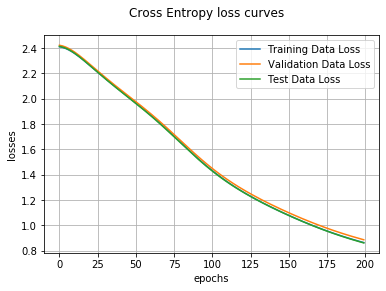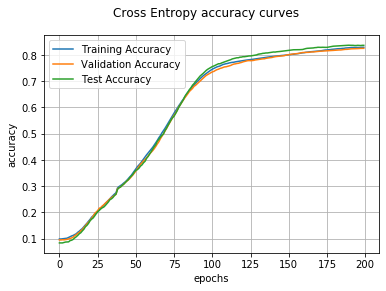

### 1.4 Hyperparameter Investigation

#### 1.4.1 Number of hidden units

For this part, we change the number of hidden units of the neural network and report on the final test accuracy in each case.

|Number of Hidden Units|Test Accuracy|
|:-:|:-:|
|100|77.1%|
|500|83.4%|
|2000|84.7%|

As the number of hidden units go up, test accuracy also increases.

#### 1.4.2 Early Stopping

In this part, we use the early stopping method to control overfitting. For every 10 epoch, we check if the validation accuracy has improvement or not. If yes, keep on training. If no, we stop at the max validation accuracy.

<br>

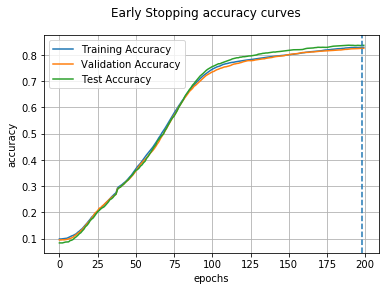

<br>

Early Stopping point at epoch number: 198
<br>
Training Accuracy: 82.87%
<br>
Validation Accuracy: 82.48%
<br>
Testing Accuracy: 83.63%


## 2. Neural Networks in Tensorflow

### 2.1 Model Implementations

The following python code implements the convolution neural network model.

In [0]:
def train_tensorflow(weights, biases, trainData, trainTarget, validData, validTarget, testData, testTarget, reg=0, keep_rate=1, num_epochs=50):
    data = tf.placeholder(tf.float32, shape = [32,28,28,1])
    target = tf.placeholder(tf.float32, shape = [32,10])
    prediction, d1, d2 = cnn(weights, biases, data, 1-keep_rate)
    loss = tf.losses.softmax_cross_entropy(target,prediction) + reg * (d1 + d2)
    actual_label = tf.math.argmax(target, axis=1)
    predict_label = tf.math.argmax(prediction, axis=1)
    accuracy = tf.count_nonzero(tf.math.equal(actual_label, predict_label)) / 32
    optimizer = tf.train.AdamOptimizer(1e-4)
    optimizer = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    session = tf.InteractiveSession()
    session.run(init)

    accuracy_train = []
    loss_train = []
    accuracy_valid = []
    loss_valid = []
    accuracy_test = []
    loss_test = []
    
    iteration1 = trainData.shape[0] / 32
    iteration2 = validData.shape[0] / 32
    iteration3 = testData.shape[0] / 32
    for iii in range(num_epochs):
        shuffle(trainData, trainTarget)
        print(iii, end = ' ')
        
        accuracy_record = []
        loss_record = []
        for i in range(int(iteration1)):
            batchData = trainData[i*32:(i+1)*32].reshape((32, 28, 28, 1))
            batchTarget = trainTarget[i*32:(i+1)*32]
            op = session.run([optimizer], feed_dict={data:batchData, target:batchTarget}) # training is only done with training data
            acc, los = session.run([accuracy, loss], feed_dict={data:batchData, target:batchTarget})
            accuracy_record.append(acc)
            loss_record.append(los)
        accuracy_train.append(sum(accuracy_record) / int(iteration1))
        loss_train.append(sum(loss_record) / int(iteration1))
        
        accuracy_record = []
        loss_record = []
        for i in range(int(iteration2)):
            batchData = validData[i*32:(i+1)*32].reshape((32, 28, 28, 1))
            batchTarget = validTarget[i*32:(i+1)*32]
            acc, los = session.run([accuracy, loss], feed_dict={data:batchData, target:batchTarget})
            accuracy_record.append(acc)
            loss_record.append(los)
        accuracy_valid.append(sum(accuracy_record) / int(iteration2))
        loss_valid.append(sum(loss_record) / int(iteration2))
        
        accuracy_record = []
        loss_record = []
        for i in range(int(iteration3)):
            batchData = testData[i*32:(i+1)*32].reshape((32, 28, 28, 1))
            batchTarget = testTarget[i*32:(i+1)*32]
            acc, los = session.run([accuracy, loss], feed_dict={data:batchData, target:batchTarget})
            accuracy_record.append(acc)
            loss_record.append(los)
        accuracy_test.append(sum(accuracy_record) / int(iteration3))
        loss_test.append(sum(loss_record) / int(iteration3))
        
        
    return loss_train, accuracy_train, loss_valid, accuracy_valid, loss_test, accuracy_test


def cnn(weights, biases, x, p):
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = batchNormalization(conv1)
    conv1 = maxpool2d(conv1)
    conv1 = tf.reshape(conv1, [32, 6272])
    fc1 = tf.nn.relu(tf.nn.dropout(tf.add(tf.linalg.matmul(conv1, weights['wf1']), biases['bf1']), rate = p))
    fc2 = tf.nn.softmax(tf.add(tf.linalg.matmul(fc1, weights['wf2']), biases['bf2']))
    d1 = tf.nn.l2_loss(weights['wf1'])
    d2 = tf.nn.l2_loss(weights['wf2'])
    return fc2, d1, d2

def conv2d(x, filt, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, filt, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def batchNormalization(x):
    mean,variance = tf.nn.moments(x,axes=[0])
    return tf.nn.batch_normalization(x,mean=mean,variance=variance,offset=0,scale=1,variance_epsilon=1e-5)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

### 2.2 Model Training
<br>

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEjCAYAAAAomJYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3gUVffA8e9N74EUQguE3kKRqqCA%0A2EAQCyhYQOy+vr6KYvnZFTtFRVEURakaBSyAKCASUVDpvZfQS0J6z2bP74/ZhBASWEKWADmf59nH%0A3Z07M2c2eM/MvXfuGBFBKaWUKs6togNQSil1ftIEoZRSqkSaIJRSSpVIE4RSSqkSaYJQSilVIk0Q%0ASimlSqQJQimlVIk0QSillCqRJgilzpIxxqOiYzgTF1q8quJoglAuZYyJNMZ8b4yJN8YcM8aMdXw/%0AxBjzlzFmlDEmyRiz2xjTq8h6scaY140xS4wxacaY+caYsFL2UdUYM8exjyTH+9pFlocYY74yxhx0%0ALP+xyLIbjTFrjDGpxpidxpieju/jjDFXFyn3qjFmquN9lDFGjDH3GWP2Ar87vp9ujDlsjEkxxiw2%0AxrQosr6vMWa0MWaPY/lfju9+Nsb8r9jxrDPG3FzKsV5ujFlqjEk2xuwzxgwp8nvdX6TcEGPMX0U+%0AizHmv8aY7cB2Y8w4Y8yoYtv+yRjzpON9TWPMTMdvutsY81iRch2NMSscv9kRY8x7JcWqLnyaIJTL%0AGGPcgTnAHiAKqAXEFCnSCdgKhAEjgAnGGFNk+R3APUA1wAt4qpRduQFfAXWBOkAWMLbI8imAH9DC%0Asa33HfF1BCYDTwNVgK5A3BkcYjegGXCd4/MvQCPHPlYB04qUHQW0AzoDIcAzgB2YBNxVUMgY0xrr%0Ad/q5+M6MMXUd+/gICAfaAGvOIN6bsH7z5sA3wICC39sYUxW4FogxxrgBs4G1jliuAoYaYwqOcwww%0ARkSCgAbAd2cQg7qQiIi+9OWSF3AZEA94lLBsCLCjyGc/QIDqjs+xwItFlj8C/OrkftsASY73NbAq%0A4qollPsMeL+UbcQBVxf5/Cow1fE+yhFr/VPEUMVRJhgrgWUBrUso5wMkAY0cn0cBn5SyzeeAH0pZ%0AFgvcX+z3/avIZwF6FPlsgL1AV8fnB4DfHe87AXtL2PdXjveLgdeAsIr+N6Yv1770CkK5UiSwR0Rs%0ApSw/XPBGRDIdbwNKWg5kFltWyBjjZ4z5zNF8k4pVgVVxXMFEAokiklRKfDudO5QS7SsSg7sx5h1H%0AM1Uqx69Ewhwvn5L2JSLZwLfAXY4z99uxrnhKUm7xilXTxzj2B9bVWsEVT12gpqMZK9kYkww8D0Q4%0Alt8HNAa2GGOWG2P6nEVM6jymCUK50j6gzjnoFB0GNAE6idXs0dXxvXHEEGKMqVJKfA1K2WYG1lVN%0AgeollCk6FfIdwI3A1VhXDVFFYkgAsk+xr0nAnVhNOZki8ncp5cozXrCamfo7mq46ATOL7Ge3iFQp%0A8goUkesBRGS7iNyO1ZT2LjDDGONfSlzqAqYJQrnSMuAQ8I4xxt8Y42OM6eKC/QRiNeEkG2NCgFcK%0AFojIIax2+08cndmexpiCBDIBuMcYc5Uxxs0YU8sY09SxbA0w0FG+PdDfiRhygGNYFfVbRWKwA18C%0A7zk6f92NMZcZY7wdy//GagYbTelXD2Cd4V9tjLnNGONhjAk1xrQpEu8tjquphlhn+ackIquxktcX%0AwDwRSXYsWgakGWOedXSkuxtjoo0xHQCMMXcZY8Idx1Wwjv10+1MXHk0QymVEJB+4AWiI1d69Hxjg%0Agl19APhiVXb/AL8WWz4IyAO2AEeBoY74lmF1gr8PpAB/YDWvALyEdbaehNXe/vVpYpiM1Rl/ANjk%0AiKOop4D1wHIgEevM263Y+i2BqaXtQET2AtdjXTElYiWF1o7F7wO5wBGsK5JpJW2jBF9jXfUUHp/j%0A79YHqy9nN8eTSLCjSE9gozEmHavDeqCIZDm5P3UBMVZTpFKqIhljBgMPisjlFR2LUgX0CkKpCmaM%0A8cMapTW+omNRqihNEEpVIMe9BfFYTUOna8ZS6pzSJiallFIl0isIpZRSJdIEoZRSqkSaIJRSSpVI%0AE4RSSqkSaYJQSilVIk0QSimlSqQJQimlVIk0QSillCqRJgillFIl0gShlFKqRJoglFJKlUgThFJK%0AqRJpglBKKVUiTRBKKaVK5OqHyZ8zYWFhEhUVVeb1MzIy8PevfM9d1+OuXPS4KxdnjnvlypUJIhJe%0A0rKLJkFERUWxYsWKMq8fGxtL9+7dyy+gC4Qed+Wix125OHPcxpg9pS3TJiallFIl0gShlFKqRJog%0AlFJKlUgThFJKqRJpglBKKVUiTRBKKaVKpAlCKaVUiVx6H4QxpicwBnAHvhCRd4otrwt8CYQDicBd%0AIrLfsWwE0BsriS0AHhcRcWW8SqmKl5dvJy3bRnq2jWxbPrk2Ozm2fHLy7OTk28nJswMnVwUiYLML%0AOY7y1npW+aRDeVySlUewr+e5P6ALmMsShDHGHfgYuAbYDyw3xswSkU1Fio0CJovIJGNMD+BtYJAx%0ApjPQBWjlKPcX0A2IdVW8SqnTS8rIZVdCOnuOZZKXbz9puQhk5eWTlm0jNSuPtGwbaTnWf62K/WR5%0AdishpGXnkZplIysv3yWxf7P1N3q3rMFtHSLpVC8EY8wZbyPfLhxJzeZgchYHkrPYn5RV+D47Lx9v%0AD3e8PNzw9nBz/NcdNwO5Nju5juSWm28lMFu+EOjjQaCPJ4E+HgQV/NfXkxB/L8ICvAkP8CYs0As/%0Ar4q5p9mVe+0I7BCRXQDGmBjgRqBogmgOPOl4vwj40fFeAB/ACzCAJ3DEhbEqVWnZ7UJCeg6p2Xmk%0AFqnYU7PzSMrIZXdCJrsT0tmVkEFyZp7T2/X1dC+s8AJ9PPD2cMNwcqXs5eFBjWAfAr09CfI9XmEG%0AeHvg6+V+QqVbUPG6lVK5e7qbYuWt91Nm/85OieDHNQf4fvUB6oX5c1v7SPq0qoG/98nVYF6+nb2J%0AmeyOz2BnQjq74zPYlZDB3mOZ5BZLjFX9PKlV1Rc/Tw+Ss/LIycs/IRnY7XJS0vB2HMPB5GzSctJI%0AzbISpL2UNhJ/L3fCAr2pXdWXemH+1A8LoF64Pw3CAqhV1Rd3tzNPds5wZYKoBewr8nk/0KlYmbXA%0ALVjNUDcDgcaYUBH52xizCDiElSDGishmF8aqVKVxOCWbNfuSWbc/mbX7k1m3L4W0HFup5SOCvKkf%0AFsD1LWtQP8yf+uH+1A31x9fTvcTyvp7uBPh44Ol+/nRxRgW7M6R7NM9f34xfNhwiZvk+3v11C+/+%0AuuW063q5u1E31I/6Yf5c1awadUL8qFnFl9pVfKlZxbfEBFMWIkJGbj6pWXkcS88lIT2H+PQcEtJz%0ASEjLJT49h32Jmcxac5DU7ON/Ly93Ny5vFMaXQzqUSxxFGVc16xtj+gM9ReR+x+dBQCcRebRImZrA%0AWKAesBjoB0QDYVhJY4Cj6ALgGRH5s9g+HgQeBIiIiGgXExNT5njT09MJCAgo8/oXKj3ui4uIcChD%0ASMiyk5IjpOYKqTlCSq71/kBaPim51tmmu4HIQDfqB7tRK9ANf0+Dnwf4eRh8C957GrzdXXN2ei6V%0A9Pc+lG5nc2J+iWftbgbCfA3V/d0I8zWlXrFUBBEhLRcOZ9o5lGHnSIbg6wE3NPA6qawz/86vvPLK%0AlSLSvqRlrryCOABEFvlc2/FdIRE5iHUFgTEmAOgnIsnGmAeAf0Qk3bHsF+Ay4M9i648HxgO0b99e%0AzmYyLp3Mq3KpiOPOtdnZcjiVjJz8wjbnIF+rKcWjjGfbtnw7mw6lsmx3Ist2J7I8LpGkYs1Afl7u%0AhAV4ExbgRXOvNK5t34TWkVVoXiMIn1KuAi42+u+8bFyZIJYDjYwx9bASw0DgjqIFjDFhQKKI2IHn%0AsEY0AewFHjDGvI3VxNQN+MCFsSpVSERIzMjlQHIWB5KsDsgjqdlWO3FOXmF7cWq2jazcfGpW8aF+%0AeAD1wvxpEO5PvbAA6ob6cSA5i7X7kq3X/hQ2HUw9qf26gJ+XO6EBXtQLCyhsxiloZ64W6M3RtBxH%0ALJmO/2az51gGa/clk5FrderWDfXj6mYRdKgXQoNwf0dS8D6hCSQ2NpbuXeqdk99RXfhcliBExGaM%0AeRSYhzXM9UsR2WiMGQ6sEJFZQHfgbWOMYDUx/dex+gygB7Aeq8P6VxGZ7apY1cUnJSvP0aF48ogY%0AEVgbb+Poin2F7bsJjrbeI6nZjhEpJ1bk3h5uBPt6Fna4Bvt5ERnih7eHOweSM1m8LZ4ZK/eXGIuf%0AlzvRtYIZ0iWK1rWrUNXPk1THqJ2CzuC0bBtH03LYnZDOyrjEwkq/NKH+XtSu6ku/drXpEBVCx3oh%0ARAT5lP0HU6oELh07JSJzgbnFvnu5yPsZWMmg+Hr5wEOujE1d+Ox2YX9SFlsOp7IrIcMx0iSd3QkZ%0AJKTnnn4DK9cBJzbBNI4I5Mom1ahZxZdaVX2pVcWX2lV9Cfb1PO2wyPQcW2EMe45lUj3Ih9aRVWhY%0ALeCMRpmICEfTctgZbx3L0dQcqgf7UMvRKVqrii++XpWjaUhVrIvmgUHq4pVrs5OQnsOB5Cy2HE5j%0A86FUthxKZevhtBPOtMMCvKgfFsBVTSMKR9r4lVKRbtu4jmu7XlauY8wDvD1oWTuYlrWDz2o7xhgi%0AgnyICPKhc4OwcolNqbLQBKFcLseWz77ETHbGZ7Dbcaa/OyGDnHx74dj2grHh3h5u5OTbSUhzDO9L%0AzyUl68RO1yAfD5rWCKJ/u9o0qxFEk+qB1A8POKO7ZO0H3akT6lfeh6rURUUThCpXIsKeY5nWqJq4%0ARFbuSWLPsYwThhKGBXgRFepPsK8nOY67bo/Zcq3pFGx2vNzdCAvwpkn1QLo4OlrDArypHuxNk+pB%0A1Az2KdNdsEqpM6MJQp2V9BwbWw+nseFACsvirKGW8Wk5gHWHabu6IfRpVYP6jtE99cL8dT4cpS4Q%0AmiCU0xLSc1gRl8imQ2lsOZTKlsNp7E3MLFxeI9iHzg1C6RAVQqd6ITQID8DNRVMAKKVcTxOEKpWI%0AsOVwGr9vOcpvm4+wZl8yItZdplFh/rSsHcxt7WvTtHoQzWpq049SFxtNEAq7XUjOyiO+sGM4h5V7%0Akli4+SgHkrMAaFU7mKFXNaZr4zCaVg/SYZZKVQKaICqhHFs+v6w/TMzyvWw5kEna/F/ILzYhjY+n%0AG5c3DOPRHg3p0bSa3oSlVCWkCaISOZSSxbR/9hKzfC8J6bnUC/OnZZg7rRrXLRwpFBbgTXigF7Wr%0A+lWaeXqUUiXTBHGRExH+2ZXI5L/jmL/pCHYRrmpajcGXRXF5wzAWL/6D7t2bVnSYSqnzkCaIi9jS%0AnQm8v2Aby+OSqOLnyf2X1+OuS+sSGaI3iCmlTk8TxEVoRVwio+dv4+9dx4gI8mb4jS24rX2kNhkp%0Apc6IJoiLhIiwdn8K7y3YxuJt8YQFePFSn+bc2amOJgalVJlogriAiAhLdx7j753HThiSmpBuPY4w%0A12anqp8nz/VqyqDL6lbYg86VUhcHrUEuALk2O3PWHeTzP3ez+VAq7m6GUH8va9RRoDcNqgUQHuBN%0A7RA/br6kFgHl9IxcpVTlpjXJeSwlK49vlu1l4pI4Dqdm06haACP6teLGS2ri7aHNRkop19IEcR7K%0Ay7fz4cLtfPnXbjJy8+nSMJR3+rWkW+NwncpCKXXOaII4zxxIzuLRr1exem8yN7SuycPd6tOi5tk9%0AgEYppcpCE8R5ZOHmIwybvhZbvjD2jkvo06pmRYeklKrENEGcB/Ly7Yyat5XPFu+ieY0gPrmzLVFh%0A/hUdllKqktMEUcEOOpqUVu1N5q5L6/Bi7+Z634JS6rygCaIC7UvM5KaPl5Cdl8+Ht19C39bapKSU%0AOn9ogqggWbn5PDRlJbn5dn78bxcaRQRWdEhKKXUCTRAVQER44Yf1bD6cyoS722tyUEqdl9wqOoDK%0AaNLSOL5ffYChVzWmR9OIig5HKaVKpAniHFu2O5E3ft7M1c0i+F+PhhUdjlJKlUoTxDl0OCWbR6at%0AJDLEj/cGtMbNTe+KVkqdvzRBnCM5tnz+M20lmbn5fDaoHUE+nhUdklJKnZJ2Up8jr83exOq9yXxy%0AZ1saa6e0UuoC4NIrCGNMT2PMVmPMDmPM/5WwvK4xZqExZp0xJtYYU7vIsjrGmPnGmM3GmE3GmChX%0AxupKX/y5i6//3cvD3RpwfcsaFR2OUko5xWUJwhjjDnwM9AKaA7cbY5oXKzYKmCwirYDhwNtFlk0G%0ARopIM6AjcNRVsbrSjJX7eePnzfSKrs7T1zWp6HCUUspprryC6AjsEJFdIpILxAA3FivTHPjd8X5R%0AwXJHIvEQkQUAIpIuIpkujNUl5m88zLMz13F5wzA+GNgGd+2UVkpdQIyIuGbDxvQHeorI/Y7Pg4BO%0AIvJokTJfA/+KyBhjzC3ATCAMuAK4H8gF6gG/Af8nIvnF9vEg8CBAREREu5iYmDLHm56eTkBAQJnX%0AL27zsXxGr8ymTqAbz3Twwcfj/EwO5X3cFwo97spFj7t0V1555UoRaV/SsorupH4KGGuMGQIsBg4A%0A+VhxXQFcAuwFvgWGABOKriwi44HxAO3bt5fu3buXOZDY2FjOZv2i1u9P4eNF/xAVFsD0hy6jqr9X%0AuWzXFcrzuC8ketyVix532biyiekAEFnkc23Hd4VE5KCI3CIilwAvOL5LBvYDaxzNUzbgR6CtC2Mt%0ANzvj07n7q2UE+3oy5b6O53VyUEqpU3FlglgONDLG1DPGeAEDgVlFCxhjwowxBTE8B3xZZN0qxphw%0Ax+cewCYXxlouDqdkM+iLfzHAlPs6UiPYt6JDUkqpMnNZgnCc+T8KzAM2A9+JyEZjzHBjTF9Hse7A%0AVmPMNiACeNOxbj5W89NCY8x6wACfuyrW8vL6nE0kZeYx6d6O1A+vfO2dSqmLi0v7IERkLjC32Hcv%0AF3k/A5hRyroLgFaujK88rd6bxM/rD/H4VY2IrqXPkFZKXfh0qo1yICK8/csWwgK8eaBr/YoORyml%0AyoUmiHKwcPNRlu1OZOjVjQjwruiBYUopVT40QZwlW76dd37dQv0wfwZ0iDz9CkopdYHQBHGWZqzc%0Az46j6TzTsyme7vpzKqUuHlqjnYXMXBvvLdhGu7pVua6FPhlOKXVx0QRxFib8uZujaTk8f31TjDk/%0Ap9JQSqmy0gRRRgnpOXy2eBfXtYigXd2Qig5HKaXKnSaIMvpo4Xay8vJ5pmfTig5FKaVcQhNEGexO%0AyGDav3sZ2CGSBnrHtFLqIqUJogzGxe7Ay8ONx69uVNGhKKWUy2iCKIMlO47RvUk41QJ9KjoUpZRy%0AGU0QZ+hgchYHkrNorx3TSqmLnCaIM7RiTxIAHaI0QSilLm6aIM7QirhE/LzcaVYjsKJDUUopl9IE%0AcYaWxyXRtk5VPHRaDaXURU5ruTOQmp3HlsOptI+qWtGhKKWUy2mCOAOr9iQhov0PSqnKQRPEGVgR%0Al4S7m6FNZJWKDkUppVxOE8QZWB6XSIuaQfjrQ4GUUpWAJggn5drsrNmXrPc/KKUqDU0QTtpwMIUc%0Am50O2kGtlKokNEE4aUVcIgDtNEEopSoJTRBOWh6XRFSon86/pJSqNDRBOEFEWBGXSHsd3qqUqkQ0%0AQThhZ3wGSZl52v+glKpUNEE4oaD/Qa8glFKViSYIJyyPSyLE34v6Yf4VHYpSSp0zmiCcsGJPIu3r%0AVsUYU9GhKKXUOePSBGGM6WmM2WqM2WGM+b8Sltc1xiw0xqwzxsQaY2oXWx5kjNlvjBnryjhP5Whq%0ANnuOZer8S0qpSsdlCcIY4w58DPQCmgO3G2OaFys2CpgsIq2A4cDbxZa/Dix2VYzOKHhAkM7gqpSq%0AbFx5BdER2CEiu0QkF4gBbixWpjnwu+P9oqLLjTHtgAhgvgtjPK3lcYn4eLrRomZwRYahlFLnnCtn%0AnasF7CvyeT/QqViZtcAtwBjgZiDQGBMKJAGjgbuAq0vbgTHmQeBBgIiICGJjY8scbHp6eonrL1qf%0ARVQgLP2rQi9kXKa0477Y6XFXLnrcZVPR05I+BYw1xgzBako6AOQDjwBzRWT/qTqGRWQ8MB6gffv2%0A0r179zIHEhsbS/H103Ns7J03j/9e2ZDu3ZuUedvns5KOuzLQ465c9LjLxqkEYYz5HpgA/CIidie3%0AfQCILPK5tuO7QiJyEOsKAmNMANBPRJKNMZcBVxhjHgECAC9jTLqInNTR7Upr9iZjF73/QSlVOTnb%0AB/EJcAew3RjzjjHGmdPp5UAjY0w9Y4wXMBCYVbSAMSbMGFMQw3PAlwAicqeI1BGRKKyrjMnnOjmA%0A1f/gZqBtHX1AkFKq8nEqQYjIbyJyJ9AWiAN+M8YsNcbcY4zxLGUdG/AoMA/YDHwnIhuNMcONMX0d%0AxboDW40x27A6pN88q6MpZyv2JNK0ehCBPiUeolJKXdSc7oNwdB7fBQwCVgPTgMuBu7Eq+pOIyFxg%0AbrHvXi7yfgYw41T7FZGJwERn4yxPO49mcHmjsIrYtVJKVThn+yB+AJoAU4AbROSQY9G3xpgVrgqu%0AoqXn2AjSqwelVCXl7BXEhyKyqKQFItK+HOM5b9jtQnqOjQCfih7opZRSFcPZTurmxpjCnlpjTFXH%0ACKOLVkauDYAAb/cKjkQppSqGswniARFJLvggIknAA64J6fyQkZMPQIC3NjEppSonZxOEuylyx5pj%0AniUv14R0fkjPyQPQJialVKXlbO33K1aH9GeOzw85vrtopWVbTUyB3poglFKVk7O137NYSeE/js8L%0AgC9cEtF5Ij3HShD+miCUUpWUU7WfY3qNcY5XpZCRU9BJrQlCKVU5OXsfRCOsZzU0B3wKvheR+i6K%0Aq8IVNjFpH4RSqpJytpP6K6yrBxtwJTAZmOqqoM4H6XoFoZSq5JxNEL4ishAwIrJHRF4FersurIqX%0Anq19EEqpys3Z2i/HMevqdmPMo1jTdge4LqyKl55rw8vDDS8Plz62WymlzlvO1n6PA37AY0A7rEn7%0A7nZVUOeD9GybDnFVSlVqp60BHTfFDRCRp4B04B6XR3Ue0HmYlFKV3WmvIEQkH2ta70olPduGv5cm%0ACKVU5eVsDbjaGDMLmA5kFHwpIt+7JKrzgF5BKKUqO2drQB/gGNCjyHcCXNQJonqQz+kLKqXURcrZ%0AO6krRb9DUXoFoZSq7Jy9k/orrCuGE4jIveUe0XkiI8em90AopSo1Z2vAOUXe+wA3AwfLP5zzR5oO%0Ac1VKVXLONjHNLPrZGPMN8JdLIjoP5Nrs5NjsOs2GUhcKETi0BgIiIKhmRUdz0ShrDdgIqFaegZxP%0ACmdy1T4Ipc5vWcmw7jtYORGOboTgSLj/NwisXtGRXRScupPaGJNmjEkteAGzsZ4RcVHSZ0EoVcHs%0AdkjeC6mHICfN+lxABPYthx//C6Obwi9Pg7sHXPUyZCbC17dBTnrFxX4RcbaJKdDVgZxPChKE9kGo%0Ai0a+DeY9R4td66GeF9S5DI4/Rbj8pB6C/FwIrg1u7s6vZ7dD/BaI+wvi/oQ9SyDz2IllvALAyx+M%0AO6QdBE9/aHUbtL8Hal5ilanWAmJuh5n3wcCvzywGdRJnRzHdDPwuIimOz1WA7iLyoyuDqyjp2sSk%0ALia2XKvC3DyLqu5+8FUvqNkWOv8PmvUFdw9EBHM2CePYTuyLR/Hp3rlEZ2fTNVcgpD6ENYTQhhDa%0ACHyrQm66dUWQmw65GdaZfspe2LP0eEIIjoRG10Ht9tbnomVz0yAvC+p2hpa3gnexc9cmPaHXCJj7%0AFPzyLFw/0jWJsJJwtgZ8RUR+KPggIsnGmFeAizNBZOuzINTp2cXOxoSNRIdFn13l6kp5WfDtINix%0AAK57m6WZDegatB/+/hhm3EN6lToMr9OQbSaf7/rOwMvd68y2n7gLFo+CtTF8WrUK46oEUcW9GnPC%0AriQ4cS8c3QJbfwG7reT1vQLAP8xKCFGXW6+qdc/umDs+AElx8PdYqBoFnR89u+25QEpOCjuSd9Au%0Aol1Fh3JKztaAJfVVXLS1pz4sSDlj7OqxfL7+c1657BX6N+5f0eGcLCcNvrndara5YQy0G4I9NhY6%0A3AfthrB99Vc8uf5j4tJ2ADB/xVj6dHrSuW0n7oLFo2HtN+DuybzWNzAuZRWda3bm74N/Mz40nKd7%0AjrDK5udB0h7ISbXO+L0CwDvAaiJyc9F0+te8bvVhzH8RqkQCwa7Zz6mkH4WDa8DDG+p3AyAuJY6p%0Am6cya+cssmxZTLh2Ah1rdDyr3eTl55Gdn02gV/n3BDhbA64wxrwHfOz4/F9gZblHc57QJiZ1OnN3%0AzeXz9Z/jYTyYtHEStzS6BTdzHj07JCsJpt0KB1bBLZ9Dq1tPWDwn7heGbxmPv18Vvmx6L6+tGMF3%0Aaz6lDwHWGXhpV0S2XPhztPUybtDxQTZH9+HFP56gVXgrPuzxIW/9+xZfb/ma25rcRt2guuDuaTU1%0AnUtubnDLeJh0A3z/IEEthwPdnV8/9RD4BIOX3+nLikDaITi8wRpqe3ANHFxt9ZNg3WG8LLoPU4KD%0AWHxwCR5uHlxf73oW71/MtM3TzipBpOWm8UTsE+Tl5/HldV/iXs59Ls7WgP8DXgK+xTreBVhJ4pSM%0AMT2BMYA78IWIvFNseV3gSyAcSATuEpH9xpg2WI84DQLygTdF5FsnYz1r2sSkTmVDwgZeXvoybau1%0ApV/jfrzw1wss3r+Y7pHdrQLZqdbZa2gD8PQ99wFmJMCUmyB+K9w2GZr1KVyUJ3m88c8bfLv1W9pW%0Aa8uobqMI9wvnVslk1JqxbP3teZocWgu9R4NnsbnIDqyEnx6Fo5us9v9rXifB05PHfr6dYO9gxlw5%0ABm93b/53yf/4dfevvLfiPcb0GHOOD74IT18Y+A1MuJrmm0ZAn3utZHU6+5bDhGsAgaDaJ/ajhNSH%0A7BQ4th2O7YCE7XBsJ+QVzGFqrLJRl0PNNvzr48PIzRPZmrGOkHTDQ436M6DtI4T5hvHhqg/5Yv0X%0A7E/bT+3A2md8eIczDvPIwkfYnbyb17q8Vu7JAZwfxZQB/N+ZbNjxHImPgWuA/cByY8wsEdlUpNgo%0AYLKITDLG9ADeBgYBmcBgESF9kVUAACAASURBVNlujKkJrDTGzBOR5DOJoazSCoa5nofTfU/bPI0/%0AD/zJqK6jCPC6qB/qd+79/iZs/B6qt4KabayRMTVaW2eSDkczj/L4748R6l2F95vdS1BWKmM9Api4%0A+EW65wZbFUf6EatwQAR0GWqNsjlVoshJg/UzrIr9kjvLfqOXCGydC/Oeh7QjcPs30PDqwsX7Uvcx%0A5vAY9uTuYUiLITzW9jE83awK86amA/lo/ed81+QKXlozFeI3w21TILgW5GZC7FtWv0VAdbj9W2jS%0Ak9z8XJ6Ydx/J2clM6jWJMN8wAMJ8w7i/5f18uPpDlh1adtZNKGclIBx6voPPNwNh8yyI7nf6df4e%0ACz5BcNmjVhI4tgPWTYeclCKFDFSpA2GNrA7z0IZQrZn178XRcf7Tjp94demr1AqsxfC6Pbl+yQS8%0AD3wKgc2g1a0MaDKALzd8yTdbvuHpDk+f0WFtT9rOf377D+l56Xx89cd0rtn5jNZ3lrOjmBYAtxZU%0A0MaYqkCMiFx3itU6AjtEZJdjnRjgRqBogmgOFDR6LsLR6S0i2woKiMhBY8xRrKuMc5IgMnJs+Hu5%0A4+Z2fnU8JmYnMmbVGLJsWQxdNJRPrv7kzDsVVcn2LYPFIyGiBexfYSWKAiH1IaQ+2RnxDHU/Rpo7%0ATDl4hJCNfQEYFBTIiNCqrLd70rLRNVZlEVgD1nwN856DJR+UnCgOroGVX1nJIdcxbv+Pd6Flf6ty%0Aqh7tfPz7V1rt7XuXQlhjGPwj1LmUQ+mHmL9nPgv2LGBt/Fp8jA/vd3+fq+tefcLqwd7B9Izqyew9%0A83mi/wQCZj0O47tD9/+zKszEXdBuCFwzHHyCERFe/+d11sSvYWS3kTQPbX7C9gY1H8T0bdMZuWIk%0AMb1jXHJ267RG15HlUx3ffz49fYJI2Q+bZ8Nl/4Vuzxz/XsRK4Ik7rROGqvVOvsIqLCqMXzeesWvG%0AcmmNS3m/+/vWyVzLe2DGffD9/RD3JxG93uWautfww/Yf+G+b/+Ln6URzFrDs0DKGLhqKr4cvk3pO%0AoklIE2d/iTPm7ClyWNGzdxFJMsac7k7qWsC+Ip/3A52KlVkL3ILVDHUzEGiMCRWRwgHQxpiOgBew%0A08lYz1p69vk5k+vEjRPJtmXzn9b/Ydzacfzfn//HyK4jz9n/fHn5eWTlZxHkFXRO9nfO2HI4OOsR%0APqlRmwORDehe9yqurdaBGikHrUr80BokeQ+v+uazXtz4ILQLTaLbW2fTgTW4JTCCcT/fxqSodozq%0ANur4dlsPhLgl8Mc7MO85ZMkHvNGwLX6evjy5fyfm0Frw8LUqrfb3gF8o/PsprJpidf7Wv9IagdPg%0AqtL7BJLiYOFw2DAT/MOh93scbtKTX/cuYP7PH7I+YT0ATUOa8tgljxF6NPSk5FBgYNOB/LTzJ+Z4%0A2Bh4/0KIuQN+ftIaCXT3bKjXtbDslE1T+HHHjzzU6iF6RvU8aVs+Hj480e4Jnln8DLN2zuLmRjeX%0A9a9z9tzc2F+7D412fGE1k9U6xcihZZ8DYvXDFGWMdTUSEH7KXdnsNt745w1mbp9J3wZ9efWyV/Es%0AaNYKqmn9jovehL/egwOruLPPO/wa9yuzds5iYNOBpz2Un3f9zItLXiQqKIpPrvqEGgE1TrvO2TAi%0AJ03SenIhY1YCN4vIXsfnKOB7EWl7inX6Az1F5H7H50FAJxF5tEiZmsBYoB6wGOgHRBe5UqkBxAJ3%0Ai8g/JezjQeBBgIiIiHYxMTGnP+JSpKenExBgNdl8vCab/Wl23r7CuYx+LqTlp/HqgVdp5duKu8Pv%0A5vfU3/kh6QeuCLyCW6veWuZhlkWPu0Bg6nZrn0GNAGs456rMVcxOmk2u5PJqrVfxdvM+uwOqYAXH%0AnWnPZNneMcyWA4ibB2Ge1TiUdwiAKK8o2vi1oY1/G1ZlrGJW8ix6B/emZ5WTK8RZSbP4LfU3Xq75%0AMmGeYSctD07ewD+HJvGJXzYAgzPgpqCeHInohs3zxN/fIy+dmgd/pdaBOXjnJpHlU50c71Dy3X2x%0AefiS72693POzqH74d8S4sS/yJvZF3swhSWfkoZFkSzaRXpG08WvDJX6XEO4ZfsJxl2bEoRHYxMZz%0ANZ7D05ZB6LFlxId3xu5+/Gx5W/Y2xh4ZS0vfltwXfl+pnfMiwvtH3ueY7Rgv1XwJH7eKe75KdspR%0Arl73GMdCO7K5eckjtdzyc7js73tJrtKSjdFn1KIOQI49hy8TvmRT1iauC76O3sG9S/3/MjRhOdEb%0A3uJAzWt5KDCdHHsOz9d8/pQDHRamLOTH5B9p5N2I+6vdj5/b6eun0/29Aa688sqVItK+xIUictoX%0A0BPYC0wBpgJ7gOtOs85lwLwin58DnjtF+QBgf5HPQcAqoL8zMbZr107OxqJFiwrfD5rwr/Qd+9dZ%0Aba+8jVo+SlpNaiW7kncVfjd6+WiJnhgtn675tMzbLXrcIiKSmyUyooHIG9VFDm+U5YeWy8DZAyV6%0AYrT0mtlLoidGyw/bfyjz/s5Gti273La14PcFMmXjFLl82mXS8qsW8tzU7nIw7aCIiOxJ2SOfr/tc%0Abp11q0RPjC58PRX7lNjt9hK3dyTjiLSZ3Ebe+uetEpevPrJaWk9qLUN/vltenf9fiZ4YLVM2Tjl1%0AkHk5IquniXw9UOTLXiLjLhcZ00ZkREORN2qIvBYq8uMjIikHREQkKy9L+s/qL12+6SLbE7eXuMmT%0A/t7FfL/te4meGC0rDq8ocXl8Zrx0i+kmfb7vI+m56aeOX0TWHl0r0ROjZczKMact60qLFi0Smfus%0A9ZulHiq50PIvRV4JEolbIqk5qZJjy3Fq23a7XQ6kHZABswdIq0mt5Lut3zkX1NxnRV4JllnLxkj0%0AxGj5a3/pdc6sHbMkemK0DIsd5nRcIqf/e4uIACuklHrV2U7qX40x7bHO1ldj9RVknWa15UAjY0w9%0A4AAwELijaAFjTBiQKCJ2RwL50vG9F/ADVgf2DGdiLE8ZOTYCvM+fW/QTshKI2RLD9fWup15wvcLv%0Ah7YbyrHsY4xdM5ZQ39DyGYu/YQZkxLPLN5D3Z99OrKedCL8I3rz8TXrX683Ns25m5raZ3NTwprPf%0A1xkYu3osX2/5mqnXT6V+cP2z2taSA0t48+CbJOxNoJPdk2GJWTR7eLp1wxZQJ6gO97e8n/tb3s++%0A1H0s2LuAg+kHGdZ+WKlnhNX8qtG7Xm9+2PEDj7R5hGDv4x3bSdlJPPXHU9Twr8Hwqz/Cz8OPpD+G%0A8e7ydwn1DaVXvV4lB+rhBW3usF4lETmh6end5e+yJXELH1/1MQ2rlm1Yac96PRm5YiTfbvn2pJu4%0A8u35PLv4WTLyMhh/7Xj8Pf1Pu71W4a24vt71TN40mVsb3+ryJpFT6vSg1YS3fAL0eOHEZSLw72dI%0A9ZZMTt/OezH/wS52QnxCiPCLIMI/ggi/CKr5VSPLlsXhjMMcyTzCkYwjHMk8Qk5+Dr4evnx45Yd0%0Ai+zmXDw9XoBNP3HdihhGh4QybfM0utTqclKxdfHreHXpq3So3oG3r3i7cGDBueBsJ/X9wONAbWAN%0AcCnwNyc+gvQEImIzxjwKzMMa5vqliGw0xgzHylizsAYmv22MEawmpoKhs7cBXYFQY8wQx3dDRGTN%0AmR1e2aRn2wgLODfNSza7DQ+3U/8ZvtrwFbn2XB5q9dAJ37sZN17t/CqJ2Ym8/s/rVPWpylV1rip7%0AMCLw9yd8Uqsh471s+NhtPO5Zm7tu+hEfR+dqv0b9GLViFDuSdpS5EjpTO5J2MGH9BGxiY1jsML7u%0A/TW+HmUbPhqfGc8TsU8QRBCf1OrN5X+Nw9zyeWFyKC4yKJJ7o517LtbdLe7mp50/8d3W73igldWG%0AbRc7z//1PInZiUy9fmrhzUzvdn2XhxY8xPN/PU+wd3CJo1DSc9P5YccPbEncwoOtHrTuKSiqSHKY%0As2sOM7bN4L7o++hauytl5evhy40NbiRmawwJWQmFI5MAxq0dx7LDyxjeeTiNqzZ2eptD2w5l4d6F%0AvLT0Jd7o8gbV/StoptWQ+tC4J6z4Eq4YdmIn865Y8uM3M7LDLUxbMYorI6+kRWgLDmce5kjGEQ6m%0AH2T10dWk5KTgYTyo5leNCP8Imoc2p0edHkT4RdC5ZmfqVzmDkxfvQLh+BF7f3sWA2jfxyYE/iUuJ%0AIyo4qrDIkYwjDF00lHC/cEZ3eRvP9PjjU44UTj+Sbm2rSSknGmejtEsLObH5Zz3Wg4LWOD43xeqD%0AcGr9c/Eqzyamzm8vlCe/XXNW23PG/Lj5ctm0y+T5P5+XXFtuiWXiM+Ol/ZT28vyfz5e6nYzcDLl9%0Azu3SdnLbU16mluSES9Adv8v0UTUkemK0PLv4WTm26E3rkvuf401Yx7KOSZvJbeSdf9857bbtdrv8%0Ase8PWXd0XanH58w27vn1Hun8dWeZs3OOtJzYUl7868UybUtE5PW/X5c2k9rIT7M+sZpppvQTKaXZ%0AqCweWvCQdIvpVtgM8Pm6zyV6YrTEbI45qWxKTorc8tMt0nFqR9kQv6Hw+/1p++XdZe9Kp2mdJHpi%0AtLSd3FYunXap/LbntxL3uTN5p3SY2kEGzx0sefl5p4zPmSaHXcm7JHpitIxfO77wuyX7l0jLiS3l%0AhT9fOO36Jfl2y7dyyeRLpP2U9jJm5RhJy0k7o/Uz8zIlLiVO/j34r8zeOVsW7V0km49tlsSsxFKb%0A/YoqPO6di6x/06umnrA8a2p/GfppM4meGC0jlo2QfHt+idvJyssqdVmZ2O0iXw+U+LdqSJtJJzZR%0AZuVlyYDZA6Tj1I6ybdP3IiMbWbGX9Pqse4mbPydNTEC2iGQbYzDGeIvIFmOM68ZWVbB0Fzcx5dnz%0A+GDlB0zeNJnaAbWZtXMWRzOPHh8OV8SE9RPIs+eddPVQlJ+nH59c9Qn3z7+fx35/jDE9xnB5rcvP%0AOK4VS0fyZmgIXWp05s0ub+KOgYNrYd4L1uRukR0I8QmhR2QPZu+azdB2Q/F2L72zetGO2Ty+1LqU%0A93bzonlYC1qFtaJVeCtah7cmwj/i5JWyksCeX3hGP3f3XJYfXs5Ll75E7/q92ZWyi/HrxtMuot0Z%0AN3PtTd3LzG0z6de4H5f/67jvss/75TqZ25AWQ3hg/gP8vOtnIgMj+Wj1R/SM6sltTW47qWyQVxDj%0Arh7H4F8G88jCR3ih0wv8GvcrC/cuxA03ro26lsHNB1PVpyrDYocxdNFQ7mlxD4+1fazwqjPLlsWw%0A2GH4evgyouuI016NOqNecD061ejE9G3TuTf6XhKyEnjur+doUKUBL1z6wuk3UILbmtxGl1pd+HDV%0Ah3y+/nNmbp/Jw60fpn/j/ic0maTmprI+fj1r49ey+dhmDmUc4kjmEZJzSh/h7uXmVdgEFB0WzTV1%0Ar6FlWMuSmwPrdYNqzeHfcVbTnTEkH1rN/9LXstbHm2c6PMOg5oNK3ZePRzl3tBsDvUYQ9nEneuHP%0Ajzt+5NFLHiXAM4CXl77MpmObGNNgII1mPmw946L3aPAOtqYqKZjd1jvwhHt1ypOz/5r2O2Zw/RFY%0AYIxJwuqovuiIiJUgXDTM9WjmUZ7+42lWHV3FwCYDebrD08zdPZfXlr7G3b/ezSdXfVJYccZnxjN9%0A23T61O9DnaA6p9xuFZ8qfHHtFzyw4AEe+/0xPrjygzNqajiw50+ezIujtndVRnQvMnT25k/hs64w%0AfQg8tBj8Q+nXuB/z98xn4Z6FXF//+hK3l5efx+h/Xqd+bh6PJCWzztePdW67+CZhA5M2TQLghvo3%0AMLzLcDzysq0J3TbMgB2/WQmiXlfSmt/AqF1TaRHagn6NrPHrj7R+hDVH1/DmP2/SIrQFjao2cvoY%0Ax64ei6e7Jw97VCckabU162eVSKfXd0an6p1oGtKUCRsmkJmXSWRgJK9c9sop+y4+vfpTBv8ymGF/%0ADCPIK4h7WtzDwKYDT2iKmdRrEiOWj+CrjV+xLmEdI7uOJNwvnLf+fYudyTv59JpPS064ZTSgyQCe%0AjH2S2H2xTN40mSxbFqO7jS5z0x5ArYBavNv1XQY3H8zolaOtKTk2f02/Rv3YlbKLtfFr2ZWyCwCD%0AoX5wfWoH1qZNtTYn9AOE+4WTkZvBkcwjJ/QFHMw4yNTNU5m4cSI1/GtwTd1ruKbuNbQKb3U8CGOg%0A00Mw+3HYs5T9oXX5z8L/cNDbi1GdXubapreWEr0LVYmEK5/nztjXmF2rOj/t+Ins/Gx+2f0Lj1dt%0Ay5W/vQuRl8LAaaU2hbqKU8NcT1jBmG5YM1/9KiK5LomqDNq3by8rVqwo8/qxsbF0796drNx8mr38%0AK8/2bMp/ujcoxwhh+eHlPP3H02TaMnnlslfoXb934bKlB5ZabePeQYy7ahwNqzbknWXvELMlhtk3%0AzSYyyLmKLCUnhQfmP8CO5B1OJYnY2Fg6dOnAoG+v4nBeGl/3mkpU9UtOLHRwNUy41po+4M4Z2I3h%0A+u+vp1ZALSZcN6HE7U768zVG7ZrBJyGdueLSYfDPx7DmG3Lzc9jasBvzatRn0v6F9HQP4e092/DI%0Ay4SgWtY9AR4+sGEG75LItKBAvvFqRIvWg6FuF0jeS8LhNfTf/BlBIsRkeOGXkw59P4T63Us9zk3H%0ANjFgzgAeqHcjj/01kRSfmgQP/dslzwuYs2sOz/35HN7u3ky7fppTNzLtTN7J+oT1XFv32lPeMDVn%0A1xyG/z0cf09/+tTvw8SNE3m49cP8t81pZ74Bjv87P508ex7XzbiOjLwMMm2ZvH3F2/Sp3+e06zlL%0ARPhj/x+8t/I9dqfspop3lcIry1bhrYgOjS7TTAEpOSn8sf8P5sfNZ+nBpeTZ84jwi6AWtahR3dFB%0Anp8PW2aDfzh/expsWcf4yL8lbW8r+zD5s5Zvg8+7M8gjiTj/qqTkptLLM4x3tq3EtLwV+o4t9ca8%0AU3Hm722MKXWY6xmfJovIH2e6zoUkLScPKN+J+vLt+Uxa/wUfrh1HZGAkX1z7xUkdvJ1rdWZSr0k8%0A8tsjDP5lMC9e+iLTt06nb4O+TicHsO6I/fzaz3lwwYM8vuhxPuj+wSlHVdjFznOxw9hpS2dcUJuT%0AkwNYU070GgFzhsLikbh1/z9uaXQLH63+iL2pe0+6uklKP8JnO2fQxQZXXPe+NeHZDWPgyhfxWv4F%0ALZd/TssdfxAaHMh7IWCv35x3Or2CZ9TlhbN7bm3Tn2/m3MatPpG02LsJtg0p3H4Y8K6vLw9GhDPc%0A35u3bR6Yb+6AQT9AneL3Ylo+XPUhwZ6B3LPsW/AJZlPzZ7jMRTcYXhd1Hb/v/Z1r617r9F2uDao0%0AoEGV05+Q9KnfhyZVm/Bk7JNM3DiRTtU78XCrh8825JN4unnSv3F/xq0dR//G/cs1OQAYY+ge2Z3L%0Aa11OQlYCEX4R5TJlerB3MH0b9KVvg76k5aYRuy+W+Xvms+HQBuLj448XDKgC2QlEuocz/OBh6g+Z%0Actb7PivuHtBnDHd+04enPd2IFi9e274K0/056PZsxT3TorTOiQvtVV6d1Lvi06Xus3Pk+1X7Si27%0A/NBymbhhoiRlJZ12u0v2/SX9pl0h0ROj5cmPG0j66KZWh9LXA0VmDxWJHSGSfHxfB9MOyo0/3CjR%0AE6OlzaQ2si+1WBzLvhD56VGRrORT7jc5O1kGzB4gbSa3kUWxr4pkJpZYbtj3w6wx+aNriRzZVPoG%0A7XaR7x+yOsRWTpYjGUek9aTW8t6K904q+sbMftL6qxayfc3kkreVmymyJkZkyy8ycd0XEj0xWp5Y%0A9ITk5lsd2fn2fBk0d5Bc8c0VkpydLJJvE9kZK7L0Y5Etc0Xit4nYcmXcmnESPTFapq+dYN0f8Fak%0AyIHVJ+3u34P/SvTEaJk4rqXIO3VFjm5xqvPufJaWkyaTNkySY1nHzmi9Mznu9Nx0+XbLt5KVl3WG%0A0Z1/Tjru5H0ir1a1/j1/cU2FxFQS25xhMn1UDYl/o5rI2m/PenvnqpO60jg+k2vJY43z7fm8uORF%0ADqQfYOzqsdzQ4Abuan7XSWPztyZu5f3lI1ly+F9q5dkY4deAno07YNKPQNpha378ff9aT9Fa/gXc%0ANROqR1MjoAaTek3i5SUv0zik8fFZHkXgjxHWpGkAe/62HqkYXvJww2DvYMa3e46HfrmbJ3ZPp9GO%0AGUTUaEdESEOq+1cnwi+CxOxE5qXO45asfO4M62BNNlYaY6yrgIx4mPU/qnlN4IraV/DTjp949JJH%0ACzsad8bFMj11C/09wmnYupTOPk9faD0AgLsB4+bJyBUjYbE1/PPnXT+z+uhqhncefvx+gvrdCufU%0AL/BAywdYdWQVb6/9GM/uj9F34WjM1FtgyFyo1tTxswkfrBhNhBgGJhyFu2dBeBPgUOnHegEI8Apg%0AcIvBLt2Hv6d/iZ3rF4Xg2tC8L2z8ATqV/xVYWblf9TL983OtDvQ6l1Z0OJogiitsYiplqu/F+xdz%0AIP0Aj7d9nP1p+/lpx09M3zady2tdzqDmg6gfXJ+P13zMTzt+IlCEp5JSuL3jU3h1/l/Jl4lHN8PU%0AftZjIAd+DfWusKZOLjpNsggseAmWfgSt74A2t8P0e+DzHtDv85LHP6+fQdDsxxnv4cW4pl2IO7ya%0Agwf+ZVXiJlLzj9/j2NSE8uLh1Zi7Pjr9j+Phbc3wOa0/fP8g/a99ntjsWP7Y94c1v48Io/54Bj+B%0AR6775PTbcxjcYjBuxo13l79LXmwe6+LX0Tq8NTc2vPGU67m7ufNO13d4YtETvLj6PX5t0o5XNi+l%0A+pSb4J5fIKQeC3f/yvrETQw/loT3bZMhsgJnFlXnlx4vWTOyNutb0ZEc5xNk9aedJzRBFFNwBRFY%0ASh/EtM3TiPCLYEiLIXi4efBY28f4but3xGyJ4aEFD2EweBg3BqVn82BGHsH9J5+y85RqzeC++TDl%0AFph6C/T7ApoXqRjtduv5uismQIf7oddIq53+oT8g5k74ZiB0fx66Pm19n5dtzSC64kuI7ERg/y95%0AJri29QCU7wbDjmVkdnmcox2GcCw7kagp9+EZ3gwalHrP44m8/OD2GJh8I10WvEu1hk2YsX0GV9e9%0AmiVL3uEvshhW/QpCwk9xNVKCu5rfhTGGd5a9g5tx47NrPnPqATwhPiF81fMrvtnyDWNWjeHm6lV5%0A+lgSN0/uS/7g2Xz418vUz83jhh7vQuNrzygmdZELbWDNTqtKpQmimIxcx7MgSriC2J60nX8P/8vj%0AbR8vHG8e4hPCw60f5t7oe5m7ay47N8YwYMMCaoc2gwemOfd83eDacO+v8PUA+O5u6D3KSgb5Npj1%0AqDWzZ5fH4erXjl+FFKwz5wmr2enQWmt64lmPwuH10PkxuOrl4w9ICaoBQ+bA3KfxWzKGqCObiGp3%0AN2TEQY8Pz6wTzCcI7pqJx8Te3JxwkPG5Kew7uoGRW6cS6e7BHVe/5/y2iriz2Z2E+ISQbcumaUhT%0Ap9dzM27c2exOutbqyit/v8IrtuXMy87jkmlXsTvIjw/q9MLjkjvLFJNSlZkmiGJO9TS5aZun4e3u%0ATf9GJ8955IXhpvW/wLpfrKGafcc697jCAn4hMPgnmHEP/DzMOuNP2GY95OTKF6HrUydX4p6+cNM4%0A6yEl816ArT+DT5XCB7qcxMPbunyt2QbmPgM7FpDrGYxXqzK0M/uFwKAfuWViT8ZLHv/75W52erjx%0AfuvH8DqLp6iVOi+REyKDrBFi3239jveWj2KpTw6tPKvS45rRZd6mUpWZJohiCp4mV7yJKTk7mZ93%0A/Uyf+n2o4lPlxJVy0q3mm50LS6/MneHlBwOmwZzH4U/HcwWue8t6eElpjIFL/wMR0bA2xnrAy+lu%0A/mp/r3U36fcPsDf0GhqWtUIPjKDmoFl0nt6LJV65tPcM5arWzs1b5Cpuxo2BTQdyRe0r+HztZ9ze%0A7E6M23n0rGilLiCaIIpJz7bh4Wbw9jixUpm5fSbZ+dnc0azYzJoZCdbD4Q+tgb4fQduzHFni7mFd%0AfUS0tB5O4swjEgHqXWG9nFXnUhi6nv2xsZzVlHtVIrnj8pdZufwtnukxulzGspeHWgG1eLWLti8r%0AdTY0QRSTkWPD39vjhIrOZrcRszWGjtU7njiLZVKc1bmcesA6829a8rQTZ8wYuPT8GXp3Ol2b3cbS%0AJjef02mIlVKup9fexaTl2E7qf/h97+8czjjMnc2KdHQeWmdNP5F5zOo7KK/kcIHS5KDUxUcTRDHp%0A2baT+h+mbZ5GrYBadKvtuFFrVyx8dT24ecC9886LG1qUUqq8aYIoJr3YFcTmY5tZdXQVtze9HXfj%0ABv+Ms5qVgmtZ9y9Uc344plJKXUi0D6KYjBwbVfy8Cj9P2zwNXw9fbo7qBT88DOtioElvaxpsn6AK%0AjFQppVxLE0QxaTk2aodY9y8cyzrG3N1zuaXOtQRNdYxUKnrXslJKXcQ0QRSTnm0j0NHENGPbDPLs%0AedyxYgbkZMPAbyp9Z7RSqvLQBFFMhqMPwi52pm+YSOesbOp7VYHBpc+cqpRSFyNtJyki3y5k5Obj%0A7+3B2s0zOWJLp69fFDywUJODUqrS0QRRRMFEfUHehnn/jMRLhO43TXTZA8GVUup8pgmiiIKJ+loe%0Amsl8SeOKKs3wD6pVwVEppVTF0ARRREaOjWokIXvGEe/hwXWt7qnokJRSqsJogigiLcfGy56T+c3X%0AHW83L7pFdq/okJRSqsJogijCc+dv9HL/l3nBoXSN7Iaf5xk8z0EppS4yOszVwS0/hwYrX2G2Vy2S%0AJJtro/TxlEqpyk2vIByi4mLwyzzAe37N8Xb3pmutrhUdklJKVShNEABHNlJ7/09srnkjxwIP/H97%0A9x4dVXU2fvz75AIJJAYCCkpEqLSFEHIDghBBAiRiXwtyiXKVi5SKoi0Uf/IqS5C2FletpSBiW18Q%0ArE6I5uXiT6JCJYo/y10Il8DiYqpchUQCIQQyyf79MSfjJEwgJJmkmXk+a7GYc997OJxn9j7nPJs+%0At/fV7iWllM/zaIAQWmZ0bwAAG9JJREFUkcEickhEjojIbDfL7xKRf4pItohkiUiEy7IJInLY+jPB%0AY4UsK4MPfo09oDm2toPwCyjkgY5uxnNWSikf47EAISL+wBLgASASGC0ikZVWewVYaYyJBuYDf7C2%0ADQfmAr2ABGCuiLT0SEG//xryj3L07knsvbwbUxZI//bavaSUUp5sQSQAR4wxx4wxV4E0YGildSKB%0AT63Pm1yW3w9sMMbkG2O+BzYAnvlZ3+pueGoXJ2/rxzdXtuJf3JXggGCPHEoppRoTTz7F1A741mX6%0AOI4Wgas9wHDgL8AwIFREWlWx7TWvNIvIVGAqQJs2bcjKyqpxYfcW7OOquUCTS1G12k9jU1hY6FP1%0ALaf19i1a75pp6MdcZwGvichE4HPgBFBa3Y2NMX8D/gbQo0cP079//xoXJC0jDT/TlDZNe1Cb/TQ2%0AWVlZPlXfclpv36L1rhlPBogTwJ0u0xHWPCdjzEkcLQhEJAQYYYw5LyIngP6Vts3yVEHtZXZ2F+0m%0ApDSaW5rq00tKKQWeDRDbgR+LSEccgWEUMMZ1BRFpDeQbY8qA/waWWYs+Bl5yuTGdYi33iG2nt3Gp%0A7BKtrsQR0jzQU4dRql6UlJRw/PhxiouLr1kWFhZGTk5OA5SqYWm9ISgoiIiICAIDq3+N81iAMMbY%0ARWQ6jou9P7DMGLNfROYDO4wx63C0Ev4gIgZHF9OT1rb5IvJbHEEGYL4xJt9TZf0k9xOaSlNKC39C%0ASLi/pw6jVL04fvw4oaGhdOjQARGpsOzixYuEhoY2UMkajq/X2xhDXl4ex48fp2PHjtXe3qP3IIwx%0A64H1lea94PL5feD9KrZdxg8tCo8pKSth4zcb6RbcjT1X/AgJaujbMkrVTnFxsdvgoHyXiNCqVSvO%0Anj17U9v5/JvU54rO0T60PXHN4yi8YiekqXYxqcZPg4OqrCbnhM8HiNtDbufd/3qXzk2juGovI1Rb%0AEErVSl5eHrGxscTGxtK2bVvatWvnnL569Wq19jFp0iQOHTp03XWWLFnCO++8UxdFBuDMmTMEBATw%0A5ptv1tk+Gzu9GlqulDqia/Mmeg9Cqdpo1aoVu3fvBmDevHmEhIQwa9asCusYYzDG4Ofn/jfq8uXL%0Ab3icJ598svaFdZGenk7v3r2x2WxMmTKlTvftym63ExDQOC69Pt+CKHfZbgAICdIuJqU84ciRI0RG%0ARjJ27Fi6du3KqVOnmDp1Kj169KBr167Mnz/fue69997L7t27sdvttGjRgtmzZxMTE0Pv3r357rvv%0AAJgzZw4LFy50rj979mwSEhL46U9/ypdffgnApUuXGDFiBD179mTkyJH06NHDGbwqs9lsLFy4kGPH%0AjnHq1Cnn/A8//JD4+HhiYmJISXEMA3Dx4kUmTJhAdHQ00dHRrFmzxlnWcmlpac5AM27cOKZNm0ZC%0AQgLPPfccW7ZsoXfv3sTFxZGYmMjhw4cBR/CYMWMGUVFRREdH8/rrr/PJJ58wcuRI534zMzNJTU2t%0A9b9HdTSOMFYPissDRFP9SpT3ePGD/Rw4ecE5XVpair9/7VrJkXfcwtyfd63RtgcPHmTlypX06NED%0AgAULFhAeHo7dbicpKYmRI0cSGVkxZVtBQQH33XcfCxYsYObMmSxbtozZs6/J/Ykxhm3btrFu3Trm%0Az5/PRx99xOLFi2nbti1vvfUWx44dIz4+3m25cnNzyc/Pp3v37qSmppKens6vfvUrTp8+zbRp09i8%0AeTN33XUX+fmOhynnzZvHrbfeSnZ2NsYYzp8/f8O6nzp1ii1btuDn50dBQQGbN28mICCAjz76iDlz%0A5rBq1SqWLl3KyZMn2bNnD/7+/uTn59OiRQumT59OXl4erVq1Yvny5UyePPlmv/oa0RaE5bLd8bcG%0ACKU85+6773YGB3D8ao+Pjyc+Pp6cnBwOHDhwzTbBwcE88MADAHTv3p3c3Fy3+x4+fPg163zxxReM%0AGjUKgJiYGLp2dR/Y0tLSeOSRRwAYNWoUNpsNgH/9618kJSVx1113ARAeHg7Axo0bnV1cIkLLljfO%0AJZqamursUjt//jwjRowgKiqKWbNmsX//fud+H3/8cWcQDw8Px8/Pj7Fjx/Luu++Sn5/Pzp07nS0Z%0AT9OroeWHLib9SpT3qPxLv6HfB2jevLnz8+HDh/nLX/7Ctm3baNGiBePGjXP7cl+TJk2cn/39/bHb%0A7W733bRp0xuuUxWbzca5c+dYsWIFACdPnuTYsWM3tQ8/Pz+MMc7pynVxrfvzzz/P/fffzxNPPMGR%0AI0cYPPj6uUgnT57MiBEjAHjkkUdq3QqsLm1BWIq1BaFUvbpw4QKhoaHccsstnDp1io8//rjOj5GY%0AmEh6ejoAe/fuddtCOXDgAHa7nRMnTpCbm0tubi7PPPMMaWlp9OnTh02bNvHvf/8bwNnFlJyczJIl%0ASwBH19b333+Pn58fLVu25PDhw5SVlbF69eoqy1VQUEC7do78o2+99ZZzfnJyMm+88QalpaUVjnfn%0AnXfSunVrFixYwMSJE2v3pdwEDRCW4lJH5NfHXJWqH/Hx8URGRtK5c2ceffRREhMT6/wYTz31FCdO%0AnKBnz568+OKLREZGEhYWVmEdm83GsGHDKswbMWIENpuNNm3asHTpUoYOHUpMTAxjx44FYO7cuZw5%0Ac4aoqChiY2PZvHkzAC+//DL3338/ffr0ISIigqo8++yzPPPMM8THx1dodfzyl7+kbdu2REdHExMT%0A4wxuAGPGjKFjx4785Cc/qfX3Ul3iWrjGrEePHmbHjh013v7Z5RtYdegq+16836daEZrl0vvk5OTQ%0ApUsXt8sauoupvtntdux2OyUlJZw+fZqUlBQOHz7caB4zdfX444/Tu3dvJkyo/gCblf+93Z0bIrLT%0AGNOj8rag9yCcLtsNItAsUN+DUMpbFBYWMnDgQK5evYqI8Ne//rVRBofY2FhatmzJokWL6vW4je+b%0A8pDLdkNIkwD8/DRFgVLeokWLFuzcubPRt5yqenfD0/QehKXYrk8wKaWUKw0Qlst2Q3MfuveglFI3%0AogHCUmzXR1yVUsqVBghLcanRR1yVUsqFBgjLZbvRFoRSdSApKemal94WLlzItGnTrrtdSEgI4HiL%0A2TU5nav+/ftzo8fZFy5cSFFRkXP6Zz/7WbVyJVVXbGysM32Ht9MAYblsR+9BKFUHRo8eTVpaWoV5%0AaWlpjB49ulrb33HHHbz/vtuBJqulcoBYv359hSyrtZGTk0NpaSmbN2/m0qVLdbJPd242VYinaICw%0AaAtCqboxcuRIPvzwQ+fgQLm5uZw8eZK+ffs630uIj4+nW7durF279prtc3NziYqKAuDy5cuMGjWK%0ALl26MGzYMC5fvuxcb9q0ac5U4XPnzgVg0aJFnDx5kqSkJJKSkgDo0KEDeXl5ALz66qtERUURFRXl%0ATBWem5tLly5d+MUvfkHXrl1JSUmpcBxXNpuN8ePHk5KSUqHsR44cYdCgQcTExBAfH8/Ro0cBx5vV%0A3bp1IyYmxpmB1rUVdO7cOTp06AA4Um4MGTKEAQMGMHDgwOt+VytXrnS+bT1+/HguXrxIx44dKSkp%0AARxpTFyna0qviDhyqRTbNc2G8kKZs+H0XudkcKkd/Gt5nrftBg8sqHJxeHg4CQkJZGZmMnToUNLS%0A0nj44YcREYKCgli9ejW33HIL586d45577mHIkCFVDoe5dOlSmjVrRk5ODtnZ2RXSdf/+978nPDyc%0A0tJSBg4cSHZ2Nk8//TSvvvoqmzZtonXr1hX2tXPnTpYvX87WrVsxxtCrVy/uu+8+Z/4km83G3//+%0Adx5++GEyMjIYN27cNeVZtWoVGzZs4ODBgyxevJgxY8YAMHbsWGbPns2wYcMoLi6mrKyMzMxM1q5d%0Ay9atW2nWrJkzr9L17Nq1i+zsbGcKdHff1YEDB/jd737Hl19+SevWrcnPzyc0NJT+/fvz4Ycf8tBD%0AD5GWlsbw4cMJDKzd+DbaggAul5Ri0KeYlKorrt1Mrt1Lxhiee+45oqOjGTRoECdOnODMmTNV7ufz%0Azz93XqjLB+cpl56eTnx8PHFxcezfv99tIj5XX3zxBcOGDaN58+aEhIQwfPhwZw6ljh07EhsbC1Sd%0AUnzHjh20bt2a9u3bM3DgQL766ivy8/O5ePEiJ06ccOZzCgoKolmzZmzcuJFJkybRrFkz4IdU4deT%0AnJzsXK+q7+rTTz8lNTXVGQDL158yZYpzJL7ly5czadKkGx7vRvSKCBRaqVz1HoTyOpV+6V+upzeK%0Ahw4dyowZM9i1axdFRUV0794dgHfeeYezZ8+yc+dOAgMD6dChg9sU3zfy9ddf88orr7B9+3ZatmzJ%0AxIkTa7SfcuWpwsGRLtxdF5PNZuPgwYPOLqELFy6QkZFx0zesAwICKCsrA66fEvxmv6vExERyc3PJ%0AysqitLSUqKgoLl68eFNlq0xbEMDFK44AoV1MStWNkJAQkpKSmDx5coWb0wUFBdx2220EBgZWSKNd%0AlX79+vHuu+8CsG/fPrKzswHHxbl58+aEhYVx5swZMjMznduEhoa6vTD27duXNWvWUFRUxKVLl1i9%0AejV9+/atVn3KyspIT09n7969zpTga9euxWazERoaSkREBGvWrAHgypUrFBUVkZyczPLly503zMu7%0AmDp06MDOnTsBrnszvqrvasCAAbz33nvO+yquXVePPvooY8aMqZPWA2iAAOCSFSC0i0mpujN69Gj2%0A7NlTIUCMHTuWHTt20K1bN1auXEnnzp2vu49p06ZRWFhIly5deOGFF5wtkZiYGOLi4ujcuTNjxoyp%0AkCp86tSpDB482HmTulx8fDwTJ04kISGBXr16MWXKFOLi4qpVl82bN9OuXTvuuOMO57x+/fpx4MAB%0ATp06xdtvv82iRYuIjo6mT58+nD59msGDBzNkyBB69OhBbGwsr7zyCgCzZs1i6dKlxMXFce7cuSqP%0AWdV31bVrV55//nnuu+8+YmJimDlzZoVtvv/++2o/MXYjmu4b+PLIOca8uZVVU++h149a1XHJ/rN5%0Ac9rr6/Hmemu672v5Sr3ff/991q5dy9tvvw1ouu86Ud7FpPcglFKN1VNPPUVmZibr16+vs33qFZEf%0AblLrPQilVGO1ePHiOt+n3oMALl3VexBKKVWZRwOEiAwWkUMickREZrtZ3l5ENonIVyKSLSI/s+YH%0AisgKEdkrIjki8t+eLOdFqwWh40EopdQPPBYgRMQfWAI8AEQCo0UkstJqc4B0Y0wcMAp43ZqfCjQ1%0AxnQDugO/FJEOnipr4RU7/gJNA3S4UaWUKufJFkQCcMQYc8wYcxVIA4ZWWscAt1ifw4CTLvObi0gA%0AEAxcBS54qqCFxXaCtfGglFIVePKy2A741mX6ONCr0jrzgE9E5CmgOTDImv8+jmByCmgGzDDGXJPI%0ARESmAlMB2rRpQ1ZWVo0KevSbKzT1MzXevjErLCzUenuZsLCwKt+gLS0trfXbtTeSl5fHkCFDADhz%0A5gz+/v7OtBCbNm2iSZMm1drP22+/TUpKCm3atHG7/OrVq3Tq1IkpU6bwwgsvXHdf9VHv/0SV611c%0AXHxz570xxiN/gJHAmy7T44HXKq0zE/iN9bk3cABHqyYReAcIBG4DDgE/ut7xunfvbmpqyort5t7f%0Ara/x9o3Zpk2bGroIDcKb633gwIEql124cKEeS2LM3LlzzR//+McabZuYmGi++uqrKpevW7fOJCYm%0Amk6dOt1wX7Wpd0lJSY23bWiV6+3u3AB2mCquq57sYjoB3OkyHWHNc/UYkA5gjPkXEAS0BsYAHxlj%0ASowx3wH/D3D7Ikdd0C4mperHihUrSEhIIDY2lieeeIKysjLsdjvjx4+nW7duREVFsWjRIlatWsXu%0A3bt55JFHiI2NdaYOd2Wz2Zg5cyZt27Zl27Ztzvlbt26ld+/exMTE0KtXL4qKirDb7cyYMYOoqCii%0Ao6N5/XXH7c6IiAjnYEJbtmxh0CBHJ8acOXN49NFHSUxMZOLEiRw9epS+ffsSFxdH9+7d2bp1q/N4%0AL730kjOl9/PPP8+hQ4fo2bOnc3lOTg4JCQke+T49zZOXxe3Aj0WkI47AMArHhd/VN8BA4C0R6YIj%0AQJy15g8A3haR5sA9wEJPFfTSVTtBAe7TDSvVmL287WUO5h90TpeWluLvX7uHMTqHd+bZhGdvert9%0A+/axevVqvvzySwICApg6dSppaWncfffdnDt3jr17HWnJz58/T4sWLVi8eDGvvfaaM8uqq6KiIrKy%0Asli2bBmnT5/GZrORkJBAcXExo0aNIiMjg/j4eAoKCmjatClLlizh5MmT7NmzB39//2ql3j548CCf%0Af/45QUFBFBUVsWHDBoKCgjh48CATJkxg69atfPDBB2RmZrJt2zaCg4PJz88nPDyc4OBg9u3bR1RU%0AVJ1lVm0IHmtBGGPswHTgYyAHx9NK+0VkvogMsVb7DfALEdkD2ICJVpNnCRAiIvtxBJrlxphsT5W1%0AsNhOsD7ApJRHbdy4ke3btztzE3322WccPXqUTp06cejQIZ5++mk+/vhjwsLCbrivdevWkZycTFBQ%0AEKmpqWRkZFBWVkZOTg7t27d3jhsRFhaGv78/WVlZPP74487gWJ3U20OHDiUoKAhwJOB77LHHiIqK%0AYtSoUc7U4hs3bmTy5MkEBwdX2O9jjz3G8uXLsdvtvPfee3WWG6m+ebRjxRizHlhfad4LLp8P4Ljf%0AUHm7QhyPutaLi1fstA/SFoTyPpV/6TdkTiJjDJMnT+a3v/3tNcuys7PJzMxkyZIlZGRk8Le//e26%0A+7LZbGzZssWZevvs2bN89tlnNz20aHVTb//pT3/izjvv5B//+AclJSXO8bOrkpqayksvvURiYiK9%0Ae/eusyFP65u+SY2jBaHvyCnlWYMGDSI9Pd2ZwTQvL49vvvmGs2fPYowhNTWV+fPns2vXLqDqtN3n%0Az59ny5YtHD9+3Jl6e9GiRdhsNiIjI/nmm2+c+7hw4QKlpaUkJSXxxhtvUFpaCrhPvZ2RkVFl2QsK%0ACrj99tsREVasWFH+kA3JycksW7bMOX5E+X6bNWvGgAEDmD59eqPtXgINEJSWGS6XlBKs9yCU8qhu%0A3boxd+5cBg0aRHR0NCkpKZw5c4Zvv/2Wfv36ERsby6RJk3jppZcAmDRpElOmTLnmJnVGRgbJyckV%0AhtN86KGHWLNmDX5+fthsNqZNm0ZMTAwpKSlcuXKFyZMn07ZtW+c4zunp6QDMmzePJ554gp49e173%0A8dvp06fz5ptvEhMTw9dff+0cYOjBBx9k8ODBzm6zP//5z85txo4dS2BgIAMHDqzT77E++Xy674LL%0AJcS8+AmjOzfhDxOTPVCy/2zenPb6ery53pru+1oNUe8FCxZw5coV5s6dW6/HdaXpvmvLwIPRt9Ou%0AyY2falBKqer4+c9/zrfffsunn37a0EWpFZ8PEGHNAnltTLzXvlWrlKp/H3zwQUMXoU74/D0IpZRS%0A7mmAUMoLecu9RVV3anJOaIBQyssEBQWRl5enQUI5GWPIy8tzvvhXXT5/D0IpbxMREcHx48c5e/bs%0ANcuKi4tv+iLhDbTejh8OERERN7W9BgilvExgYCAdO3Z0uywrK4u4uLh6LlHD03rXjHYxKaWUcksD%0AhFJKKbc0QCillHLLa1JtiMhZ4N+12EVr4FwdFacx0Xr7Fq23b6lOve8yxtzqboHXBIjaEpEdVeUj%0A8WZab9+i9fYtta23djEppZRySwOEUkoptzRA/OD6Q1h5L623b9F6+5Za1VvvQSillHJLWxBKKaXc%0A8vkAISKDReSQiBwRkdkNXR5PEpFlIvKdiOxzmRcuIhtE5LD1d8uGLGNdE5E7RWSTiBwQkf0i8itr%0AvrfXO0hEtonIHqveL1rzO4rIVut8XyUiVY+z2YiJiL+IfCUi/9ea9pV654rIXhHZLSI7rHk1Ptd9%0AOkCIiD+wBHgAiARGi0hkw5bKo94CBleaNxv4pzHmx8A/rWlvYgd+Y4yJBO4BnrT+jb293leAAcaY%0AGCAWGCwi9wAvA382xnQCvgcea8AyetKvgByXaV+pN0CSMSbW5fHWGp/rPh0ggATgiDHmmDHmKpAG%0ADG3gMnmMMeZzoPLYqkOBFdbnFcBD9VooDzPGnDLG7LI+X8Rx0WiH99fbGGMKrclA648BBgDvW/O9%0Art4AIhIB/BfwpjUt+EC9r6PG57qvB4h2wLcu08eteb6kjTHmlPX5NNCmIQvjSSLSAYgDtuID9ba6%0AWXYD3wEbgKPAeWOM3VrFW8/3hcD/Acqs6Vb4Rr3B8SPgExHZKSJTrXk1Ptc13bdyMsYYEfHKx9pE%0AJATIAH5tjLng+FHp4K31NsaUArEi0gJYDXRu4CJ5nIg8CHxnjNkpIv0bujwN4F5jzAkRuQ3YICIH%0AXRfe7Lnu6y2IE8CdLtMR1jxfckZEbgew/v6ugctT50QkEEdweMcY87/WbK+vdzljzHlgE9AbaCEi%0A5T8MvfF8TwSGiEguji7jAcBf8P56A2CMOWH9/R2OHwUJ1OJc9/UAsR34sfWEQxNgFLCugctU39YB%0AE6zPE4C1DViWOmf1P/8PkGOMedVlkbfX+1ar5YCIBAPJOO6/bAJGWqt5Xb2NMf9tjIkwxnTA8f/5%0AU2PMWLy83gAi0lxEQss/AynAPmpxrvv8i3Ii8jMcfZb+wDJjzO8buEgeIyI2oD+ODI9ngLnAGiAd%0AaI8jG+7DxpjKN7IbLRG5F9gM7OWHPunncNyH8OZ6R+O4IemP44dgujFmvoj8CMcv63DgK2CcMeZK%0Aw5XUc6wuplnGmAd9od5WHVdbkwHAu8aY34tIK2p4rvt8gFBKKeWer3cxKaWUqoIGCKWUUm5pgFBK%0AKeWWBgillFJuaYBQSinllgYIpRqQiPQvzziq1H8aDRBKKaXc0gChVDWIyDhrfIXdIvJXKxFeoYj8%0A2Rpv4Z8icqu1bqyIbBGRbBFZXZ5/X0Q6ichGa4yGXSJyt7X7EBF5X0QOisg71tvfiMgCaxyLbBF5%0ApYGqrnyYBgilbkBEugCPAInGmFigFBgLNAd2GGO6Ap/heDMdYCXwrDEmGscb3OXz3wGWWGM09AHK%0AM2zGAb/GMSbJj4BE6+3XYUBXaz+/82wtlbqWBgilbmwg0B3YbqXPHojjQl4GrLLW+Qdwr4iEAS2M%0AMZ9Z81cA/awcOe2MMasBjDHFxpgia51txpjjxpgyYDfQASgAioH/EZHhQPm6StUbDRBK3ZgAK6xR%0AumKNMT81xsxzs15N89a45gQqBQKssQsScAxy8yDwUQ33rVSNaYBQ6sb+CYy0cuyXj/F7F47/P+UZ%0AQscAXxhjCoDvRaSvNX888Jk1mt1xEXnI2kdTEWlW1QGt8SvCjDHrgRlAjCcqptT16IBBSt2AMeaA%0AiMzBMVKXH1ACPAlcAhKsZd/huE8BjpTKb1gB4BgwyZo/HviriMy39pF6ncOGAmtFJAhHC2ZmHVdL%0AqRvSbK5K1ZCIFBpjQhq6HEp5inYxKaWUcktbEEoppdzSFoRSSim3NEAopZRySwOEUkoptzRAKKWU%0AcksDhFJKKbc0QCillHLr/wOkzWAOM5yy0AAAAABJRU5ErkJggg==)![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEjCAYAAAAomJYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3gUVffA8e9N74EUQguE3kKRqqCA%0A2EAQCyhYQOy+vr6KYvnZFTtFRVEURakaBSyAKCASUVDpvZfQS0J6z2bP74/ZhBASWEKWADmf59nH%0A3Z07M2c2eM/MvXfuGBFBKaWUKs6togNQSil1ftIEoZRSqkSaIJRSSpVIE4RSSqkSaYJQSilVIk0Q%0ASimlSqQJQimlVIk0QSillCqRJgilzpIxxqOiYzgTF1q8quJoglAuZYyJNMZ8b4yJN8YcM8aMdXw/%0AxBjzlzFmlDEmyRiz2xjTq8h6scaY140xS4wxacaY+caYsFL2UdUYM8exjyTH+9pFlocYY74yxhx0%0ALP+xyLIbjTFrjDGpxpidxpieju/jjDFXFyn3qjFmquN9lDFGjDH3GWP2Ar87vp9ujDlsjEkxxiw2%0AxrQosr6vMWa0MWaPY/lfju9+Nsb8r9jxrDPG3FzKsV5ujFlqjEk2xuwzxgwp8nvdX6TcEGPMX0U+%0AizHmv8aY7cB2Y8w4Y8yoYtv+yRjzpON9TWPMTMdvutsY81iRch2NMSscv9kRY8x7JcWqLnyaIJTL%0AGGPcgTnAHiAKqAXEFCnSCdgKhAEjgAnGGFNk+R3APUA1wAt4qpRduQFfAXWBOkAWMLbI8imAH9DC%0Asa33HfF1BCYDTwNVgK5A3BkcYjegGXCd4/MvQCPHPlYB04qUHQW0AzoDIcAzgB2YBNxVUMgY0xrr%0Ad/q5+M6MMXUd+/gICAfaAGvOIN6bsH7z5sA3wICC39sYUxW4FogxxrgBs4G1jliuAoYaYwqOcwww%0ARkSCgAbAd2cQg7qQiIi+9OWSF3AZEA94lLBsCLCjyGc/QIDqjs+xwItFlj8C/OrkftsASY73NbAq%0A4qollPsMeL+UbcQBVxf5/Cow1fE+yhFr/VPEUMVRJhgrgWUBrUso5wMkAY0cn0cBn5SyzeeAH0pZ%0AFgvcX+z3/avIZwF6FPlsgL1AV8fnB4DfHe87AXtL2PdXjveLgdeAsIr+N6Yv1770CkK5UiSwR0Rs%0ApSw/XPBGRDIdbwNKWg5kFltWyBjjZ4z5zNF8k4pVgVVxXMFEAokiklRKfDudO5QS7SsSg7sx5h1H%0AM1Uqx69Ewhwvn5L2JSLZwLfAXY4z99uxrnhKUm7xilXTxzj2B9bVWsEVT12gpqMZK9kYkww8D0Q4%0Alt8HNAa2GGOWG2P6nEVM6jymCUK50j6gzjnoFB0GNAE6idXs0dXxvXHEEGKMqVJKfA1K2WYG1lVN%0AgeollCk6FfIdwI3A1VhXDVFFYkgAsk+xr0nAnVhNOZki8ncp5cozXrCamfo7mq46ATOL7Ge3iFQp%0A8goUkesBRGS7iNyO1ZT2LjDDGONfSlzqAqYJQrnSMuAQ8I4xxt8Y42OM6eKC/QRiNeEkG2NCgFcK%0AFojIIax2+08cndmexpiCBDIBuMcYc5Uxxs0YU8sY09SxbA0w0FG+PdDfiRhygGNYFfVbRWKwA18C%0A7zk6f92NMZcZY7wdy//GagYbTelXD2Cd4V9tjLnNGONhjAk1xrQpEu8tjquphlhn+ackIquxktcX%0AwDwRSXYsWgakGWOedXSkuxtjoo0xHQCMMXcZY8Idx1Wwjv10+1MXHk0QymVEJB+4AWiI1d69Hxjg%0Agl19APhiVXb/AL8WWz4IyAO2AEeBoY74lmF1gr8PpAB/YDWvALyEdbaehNXe/vVpYpiM1Rl/ANjk%0AiKOop4D1wHIgEevM263Y+i2BqaXtQET2AtdjXTElYiWF1o7F7wO5wBGsK5JpJW2jBF9jXfUUHp/j%0A79YHqy9nN8eTSLCjSE9gozEmHavDeqCIZDm5P3UBMVZTpFKqIhljBgMPisjlFR2LUgX0CkKpCmaM%0A8cMapTW+omNRqihNEEpVIMe9BfFYTUOna8ZS6pzSJiallFIl0isIpZRSJdIEoZRSqkSaIJRSSpVI%0AE4RSSqkSaYJQSilVIk0QSimlSqQJQimlVIk0QSillCqRJgillFIl0gShlFKqRJoglFJKlUgThFJK%0AqRJpglBKKVUiTRBKKaVK5OqHyZ8zYWFhEhUVVeb1MzIy8PevfM9d1+OuXPS4KxdnjnvlypUJIhJe%0A0rKLJkFERUWxYsWKMq8fGxtL9+7dyy+gC4Qed+Wix125OHPcxpg9pS3TJiallFIl0gShlFKqRJog%0AlFJKlUgThFJKqRJpglBKKVUiTRBKKaVKpAlCKaVUiVx6H4QxpicwBnAHvhCRd4otrwt8CYQDicBd%0AIrLfsWwE0BsriS0AHhcRcWW8SqmKl5dvJy3bRnq2jWxbPrk2Ozm2fHLy7OTk28nJswMnVwUiYLML%0AOY7y1npW+aRDeVySlUewr+e5P6ALmMsShDHGHfgYuAbYDyw3xswSkU1Fio0CJovIJGNMD+BtYJAx%0ApjPQBWjlKPcX0A2IdVW8SqnTS8rIZVdCOnuOZZKXbz9puQhk5eWTlm0jNSuPtGwbaTnWf62K/WR5%0AdishpGXnkZplIysv3yWxf7P1N3q3rMFtHSLpVC8EY8wZbyPfLhxJzeZgchYHkrPYn5RV+D47Lx9v%0AD3e8PNzw9nBz/NcdNwO5Nju5juSWm28lMFu+EOjjQaCPJ4E+HgQV/NfXkxB/L8ICvAkP8CYs0As/%0Ar4q5p9mVe+0I7BCRXQDGmBjgRqBogmgOPOl4vwj40fFeAB/ACzCAJ3DEhbEqVWnZ7UJCeg6p2Xmk%0AFqnYU7PzSMrIZXdCJrsT0tmVkEFyZp7T2/X1dC+s8AJ9PPD2cMNwcqXs5eFBjWAfAr09CfI9XmEG%0AeHvg6+V+QqVbUPG6lVK5e7qbYuWt91Nm/85OieDHNQf4fvUB6oX5c1v7SPq0qoG/98nVYF6+nb2J%0AmeyOz2BnQjq74zPYlZDB3mOZ5BZLjFX9PKlV1Rc/Tw+Ss/LIycs/IRnY7XJS0vB2HMPB5GzSctJI%0AzbISpL2UNhJ/L3fCAr2pXdWXemH+1A8LoF64Pw3CAqhV1Rd3tzNPds5wZYKoBewr8nk/0KlYmbXA%0ALVjNUDcDgcaYUBH52xizCDiElSDGishmF8aqVKVxOCWbNfuSWbc/mbX7k1m3L4W0HFup5SOCvKkf%0AFsD1LWtQP8yf+uH+1A31x9fTvcTyvp7uBPh44Ol+/nRxRgW7M6R7NM9f34xfNhwiZvk+3v11C+/+%0AuuW063q5u1E31I/6Yf5c1awadUL8qFnFl9pVfKlZxbfEBFMWIkJGbj6pWXkcS88lIT2H+PQcEtJz%0ASEjLJT49h32Jmcxac5DU7ON/Ly93Ny5vFMaXQzqUSxxFGVc16xtj+gM9ReR+x+dBQCcRebRImZrA%0AWKAesBjoB0QDYVhJY4Cj6ALgGRH5s9g+HgQeBIiIiGgXExNT5njT09MJCAgo8/oXKj3ui4uIcChD%0ASMiyk5IjpOYKqTlCSq71/kBaPim51tmmu4HIQDfqB7tRK9ANf0+Dnwf4eRh8C957GrzdXXN2ei6V%0A9Pc+lG5nc2J+iWftbgbCfA3V/d0I8zWlXrFUBBEhLRcOZ9o5lGHnSIbg6wE3NPA6qawz/86vvPLK%0AlSLSvqRlrryCOABEFvlc2/FdIRE5iHUFgTEmAOgnIsnGmAeAf0Qk3bHsF+Ay4M9i648HxgO0b99e%0AzmYyLp3Mq3KpiOPOtdnZcjiVjJz8wjbnIF+rKcWjjGfbtnw7mw6lsmx3Ist2J7I8LpGkYs1Afl7u%0AhAV4ExbgRXOvNK5t34TWkVVoXiMIn1KuAi42+u+8bFyZIJYDjYwx9bASw0DgjqIFjDFhQKKI2IHn%0AsEY0AewFHjDGvI3VxNQN+MCFsSpVSERIzMjlQHIWB5KsDsgjqdlWO3FOXmF7cWq2jazcfGpW8aF+%0AeAD1wvxpEO5PvbAA6ob6cSA5i7X7kq3X/hQ2HUw9qf26gJ+XO6EBXtQLCyhsxiloZ64W6M3RtBxH%0ALJmO/2az51gGa/clk5FrderWDfXj6mYRdKgXQoNwf0dS8D6hCSQ2NpbuXeqdk99RXfhcliBExGaM%0AeRSYhzXM9UsR2WiMGQ6sEJFZQHfgbWOMYDUx/dex+gygB7Aeq8P6VxGZ7apY1cUnJSvP0aF48ogY%0AEVgbb+Poin2F7bsJjrbeI6nZjhEpJ1bk3h5uBPt6Fna4Bvt5ERnih7eHOweSM1m8LZ4ZK/eXGIuf%0AlzvRtYIZ0iWK1rWrUNXPk1THqJ2CzuC0bBtH03LYnZDOyrjEwkq/NKH+XtSu6ku/drXpEBVCx3oh%0ARAT5lP0HU6oELh07JSJzgbnFvnu5yPsZWMmg+Hr5wEOujE1d+Ox2YX9SFlsOp7IrIcMx0iSd3QkZ%0AJKTnnn4DK9cBJzbBNI4I5Mom1ahZxZdaVX2pVcWX2lV9Cfb1PO2wyPQcW2EMe45lUj3Ih9aRVWhY%0ALeCMRpmICEfTctgZbx3L0dQcqgf7UMvRKVqrii++XpWjaUhVrIvmgUHq4pVrs5OQnsOB5Cy2HE5j%0A86FUthxKZevhtBPOtMMCvKgfFsBVTSMKR9r4lVKRbtu4jmu7XlauY8wDvD1oWTuYlrWDz2o7xhgi%0AgnyICPKhc4OwcolNqbLQBKFcLseWz77ETHbGZ7Dbcaa/OyGDnHx74dj2grHh3h5u5OTbSUhzDO9L%0AzyUl68RO1yAfD5rWCKJ/u9o0qxFEk+qB1A8POKO7ZO0H3akT6lfeh6rURUUThCpXIsKeY5nWqJq4%0ARFbuSWLPsYwThhKGBXgRFepPsK8nOY67bo/Zcq3pFGx2vNzdCAvwpkn1QLo4OlrDArypHuxNk+pB%0A1Az2KdNdsEqpM6MJQp2V9BwbWw+nseFACsvirKGW8Wk5gHWHabu6IfRpVYP6jtE99cL8dT4cpS4Q%0AmiCU0xLSc1gRl8imQ2lsOZTKlsNp7E3MLFxeI9iHzg1C6RAVQqd6ITQID8DNRVMAKKVcTxOEKpWI%0AsOVwGr9vOcpvm4+wZl8yItZdplFh/rSsHcxt7WvTtHoQzWpq049SFxtNEAq7XUjOyiO+sGM4h5V7%0Akli4+SgHkrMAaFU7mKFXNaZr4zCaVg/SYZZKVQKaICqhHFs+v6w/TMzyvWw5kEna/F/ILzYhjY+n%0AG5c3DOPRHg3p0bSa3oSlVCWkCaISOZSSxbR/9hKzfC8J6bnUC/OnZZg7rRrXLRwpFBbgTXigF7Wr%0A+lWaeXqUUiXTBHGRExH+2ZXI5L/jmL/pCHYRrmpajcGXRXF5wzAWL/6D7t2bVnSYSqnzkCaIi9jS%0AnQm8v2Aby+OSqOLnyf2X1+OuS+sSGaI3iCmlTk8TxEVoRVwio+dv4+9dx4gI8mb4jS24rX2kNhkp%0Apc6IJoiLhIiwdn8K7y3YxuJt8YQFePFSn+bc2amOJgalVJlogriAiAhLdx7j753HThiSmpBuPY4w%0A12anqp8nz/VqyqDL6lbYg86VUhcHrUEuALk2O3PWHeTzP3ez+VAq7m6GUH8va9RRoDcNqgUQHuBN%0A7RA/br6kFgHl9IxcpVTlpjXJeSwlK49vlu1l4pI4Dqdm06haACP6teLGS2ri7aHNRkop19IEcR7K%0Ay7fz4cLtfPnXbjJy8+nSMJR3+rWkW+NwncpCKXXOaII4zxxIzuLRr1exem8yN7SuycPd6tOi5tk9%0AgEYppcpCE8R5ZOHmIwybvhZbvjD2jkvo06pmRYeklKrENEGcB/Ly7Yyat5XPFu+ieY0gPrmzLVFh%0A/hUdllKqktMEUcEOOpqUVu1N5q5L6/Bi7+Z634JS6rygCaIC7UvM5KaPl5Cdl8+Ht19C39bapKSU%0AOn9ogqggWbn5PDRlJbn5dn78bxcaRQRWdEhKKXUCTRAVQER44Yf1bD6cyoS722tyUEqdl9wqOoDK%0AaNLSOL5ffYChVzWmR9OIig5HKaVKpAniHFu2O5E3ft7M1c0i+F+PhhUdjlJKlUoTxDl0OCWbR6at%0AJDLEj/cGtMbNTe+KVkqdvzRBnCM5tnz+M20lmbn5fDaoHUE+nhUdklJKnZJ2Up8jr83exOq9yXxy%0AZ1saa6e0UuoC4NIrCGNMT2PMVmPMDmPM/5WwvK4xZqExZp0xJtYYU7vIsjrGmPnGmM3GmE3GmChX%0AxupKX/y5i6//3cvD3RpwfcsaFR2OUko5xWUJwhjjDnwM9AKaA7cbY5oXKzYKmCwirYDhwNtFlk0G%0ARopIM6AjcNRVsbrSjJX7eePnzfSKrs7T1zWp6HCUUspprryC6AjsEJFdIpILxAA3FivTHPjd8X5R%0AwXJHIvEQkQUAIpIuIpkujNUl5m88zLMz13F5wzA+GNgGd+2UVkpdQIyIuGbDxvQHeorI/Y7Pg4BO%0AIvJokTJfA/+KyBhjzC3ATCAMuAK4H8gF6gG/Af8nIvnF9vEg8CBAREREu5iYmDLHm56eTkBAQJnX%0AL27zsXxGr8ymTqAbz3Twwcfj/EwO5X3cFwo97spFj7t0V1555UoRaV/SsorupH4KGGuMGQIsBg4A%0A+VhxXQFcAuwFvgWGABOKriwi44HxAO3bt5fu3buXOZDY2FjOZv2i1u9P4eNF/xAVFsD0hy6jqr9X%0AuWzXFcrzuC8ketyVix532biyiekAEFnkc23Hd4VE5KCI3CIilwAvOL5LBvYDaxzNUzbgR6CtC2Mt%0ANzvj07n7q2UE+3oy5b6O53VyUEqpU3FlglgONDLG1DPGeAEDgVlFCxhjwowxBTE8B3xZZN0qxphw%0Ax+cewCYXxlouDqdkM+iLfzHAlPs6UiPYt6JDUkqpMnNZgnCc+T8KzAM2A9+JyEZjzHBjTF9Hse7A%0AVmPMNiACeNOxbj5W89NCY8x6wACfuyrW8vL6nE0kZeYx6d6O1A+vfO2dSqmLi0v7IERkLjC32Hcv%0AF3k/A5hRyroLgFaujK88rd6bxM/rD/H4VY2IrqXPkFZKXfh0qo1yICK8/csWwgK8eaBr/YoORyml%0AyoUmiHKwcPNRlu1OZOjVjQjwruiBYUopVT40QZwlW76dd37dQv0wfwZ0iDz9CkopdYHQBHGWZqzc%0Az46j6TzTsyme7vpzKqUuHlqjnYXMXBvvLdhGu7pVua6FPhlOKXVx0QRxFib8uZujaTk8f31TjDk/%0Ap9JQSqmy0gRRRgnpOXy2eBfXtYigXd2Qig5HKaXKnSaIMvpo4Xay8vJ5pmfTig5FKaVcQhNEGexO%0AyGDav3sZ2CGSBnrHtFLqIqUJogzGxe7Ay8ONx69uVNGhKKWUy2iCKIMlO47RvUk41QJ9KjoUpZRy%0AGU0QZ+hgchYHkrNorx3TSqmLnCaIM7RiTxIAHaI0QSilLm6aIM7QirhE/LzcaVYjsKJDUUopl9IE%0AcYaWxyXRtk5VPHRaDaXURU5ruTOQmp3HlsOptI+qWtGhKKWUy2mCOAOr9iQhov0PSqnKQRPEGVgR%0Al4S7m6FNZJWKDkUppVxOE8QZWB6XSIuaQfjrQ4GUUpWAJggn5drsrNmXrPc/KKUqDU0QTtpwMIUc%0Am50O2kGtlKokNEE4aUVcIgDtNEEopSoJTRBOWh6XRFSon86/pJSqNDRBOEFEWBGXSHsd3qqUqkQ0%0AQThhZ3wGSZl52v+glKpUNEE4oaD/Qa8glFKViSYIJyyPSyLE34v6Yf4VHYpSSp0zmiCcsGJPIu3r%0AVsUYU9GhKKXUOePSBGGM6WmM2WqM2WGM+b8Sltc1xiw0xqwzxsQaY2oXWx5kjNlvjBnryjhP5Whq%0ANnuOZer8S0qpSsdlCcIY4w58DPQCmgO3G2OaFys2CpgsIq2A4cDbxZa/Dix2VYzOKHhAkM7gqpSq%0AbFx5BdER2CEiu0QkF4gBbixWpjnwu+P9oqLLjTHtgAhgvgtjPK3lcYn4eLrRomZwRYahlFLnnCtn%0AnasF7CvyeT/QqViZtcAtwBjgZiDQGBMKJAGjgbuAq0vbgTHmQeBBgIiICGJjY8scbHp6eonrL1qf%0ARVQgLP2rQi9kXKa0477Y6XFXLnrcZVPR05I+BYw1xgzBako6AOQDjwBzRWT/qTqGRWQ8MB6gffv2%0A0r179zIHEhsbS/H103Ns7J03j/9e2ZDu3ZuUedvns5KOuzLQ465c9LjLxqkEYYz5HpgA/CIidie3%0AfQCILPK5tuO7QiJyEOsKAmNMANBPRJKNMZcBVxhjHgECAC9jTLqInNTR7Upr9iZjF73/QSlVOTnb%0AB/EJcAew3RjzjjHGmdPp5UAjY0w9Y4wXMBCYVbSAMSbMGFMQw3PAlwAicqeI1BGRKKyrjMnnOjmA%0A1f/gZqBtHX1AkFKq8nEqQYjIbyJyJ9AWiAN+M8YsNcbcY4zxLGUdG/AoMA/YDHwnIhuNMcONMX0d%0AxboDW40x27A6pN88q6MpZyv2JNK0ehCBPiUeolJKXdSc7oNwdB7fBQwCVgPTgMuBu7Eq+pOIyFxg%0AbrHvXi7yfgYw41T7FZGJwERn4yxPO49mcHmjsIrYtVJKVThn+yB+AJoAU4AbROSQY9G3xpgVrgqu%0AoqXn2AjSqwelVCXl7BXEhyKyqKQFItK+HOM5b9jtQnqOjQCfih7opZRSFcPZTurmxpjCnlpjTFXH%0ACKOLVkauDYAAb/cKjkQppSqGswniARFJLvggIknAA64J6fyQkZMPQIC3NjEppSonZxOEuylyx5pj%0AniUv14R0fkjPyQPQJialVKXlbO33K1aH9GeOzw85vrtopWVbTUyB3poglFKVk7O137NYSeE/js8L%0AgC9cEtF5Ij3HShD+miCUUpWUU7WfY3qNcY5XpZCRU9BJrQlCKVU5OXsfRCOsZzU0B3wKvheR+i6K%0Aq8IVNjFpH4RSqpJytpP6K6yrBxtwJTAZmOqqoM4H6XoFoZSq5JxNEL4ishAwIrJHRF4FersurIqX%0Anq19EEqpys3Z2i/HMevqdmPMo1jTdge4LqyKl55rw8vDDS8Plz62WymlzlvO1n6PA37AY0A7rEn7%0A7nZVUOeD9GybDnFVSlVqp60BHTfFDRCRp4B04B6XR3Ue0HmYlFKV3WmvIEQkH2ta70olPduGv5cm%0ACKVU5eVsDbjaGDMLmA5kFHwpIt+7JKrzgF5BKKUqO2drQB/gGNCjyHcCXNQJonqQz+kLKqXURcrZ%0AO6krRb9DUXoFoZSq7Jy9k/orrCuGE4jIveUe0XkiI8em90AopSo1Z2vAOUXe+wA3AwfLP5zzR5oO%0Ac1VKVXLONjHNLPrZGPMN8JdLIjoP5Nrs5NjsOs2GUhcKETi0BgIiIKhmRUdz0ShrDdgIqFaegZxP%0ACmdy1T4Ipc5vWcmw7jtYORGOboTgSLj/NwisXtGRXRScupPaGJNmjEkteAGzsZ4RcVHSZ0EoVcHs%0AdkjeC6mHICfN+lxABPYthx//C6Obwi9Pg7sHXPUyZCbC17dBTnrFxX4RcbaJKdDVgZxPChKE9kGo%0Ai0a+DeY9R4td66GeF9S5DI4/Rbj8pB6C/FwIrg1u7s6vZ7dD/BaI+wvi/oQ9SyDz2IllvALAyx+M%0AO6QdBE9/aHUbtL8Hal5ilanWAmJuh5n3wcCvzywGdRJnRzHdDPwuIimOz1WA7iLyoyuDqyjp2sSk%0ALia2XKvC3DyLqu5+8FUvqNkWOv8PmvUFdw9EBHM2CePYTuyLR/Hp3rlEZ2fTNVcgpD6ENYTQhhDa%0ACHyrQm66dUWQmw65GdaZfspe2LP0eEIIjoRG10Ht9tbnomVz0yAvC+p2hpa3gnexc9cmPaHXCJj7%0AFPzyLFw/0jWJsJJwtgZ8RUR+KPggIsnGmFeAizNBZOuzINTp2cXOxoSNRIdFn13l6kp5WfDtINix%0AAK57m6WZDegatB/+/hhm3EN6lToMr9OQbSaf7/rOwMvd68y2n7gLFo+CtTF8WrUK46oEUcW9GnPC%0AriQ4cS8c3QJbfwG7reT1vQLAP8xKCFGXW6+qdc/umDs+AElx8PdYqBoFnR89u+25QEpOCjuSd9Au%0Aol1Fh3JKztaAJfVVXLS1pz4sSDlj7OqxfL7+c1657BX6N+5f0eGcLCcNvrndara5YQy0G4I9NhY6%0A3AfthrB99Vc8uf5j4tJ2ADB/xVj6dHrSuW0n7oLFo2HtN+DuybzWNzAuZRWda3bm74N/Mz40nKd7%0AjrDK5udB0h7ISbXO+L0CwDvAaiJyc9F0+te8bvVhzH8RqkQCwa7Zz6mkH4WDa8DDG+p3AyAuJY6p%0Am6cya+cssmxZTLh2Ah1rdDyr3eTl55Gdn02gV/n3BDhbA64wxrwHfOz4/F9gZblHc57QJiZ1OnN3%0AzeXz9Z/jYTyYtHEStzS6BTdzHj07JCsJpt0KB1bBLZ9Dq1tPWDwn7heGbxmPv18Vvmx6L6+tGMF3%0Aaz6lDwHWGXhpV0S2XPhztPUybtDxQTZH9+HFP56gVXgrPuzxIW/9+xZfb/ma25rcRt2guuDuaTU1%0AnUtubnDLeJh0A3z/IEEthwPdnV8/9RD4BIOX3+nLikDaITi8wRpqe3ANHFxt9ZNg3WG8LLoPU4KD%0AWHxwCR5uHlxf73oW71/MtM3TzipBpOWm8UTsE+Tl5/HldV/iXs59Ls7WgP8DXgK+xTreBVhJ4pSM%0AMT2BMYA78IWIvFNseV3gSyAcSATuEpH9xpg2WI84DQLygTdF5FsnYz1r2sSkTmVDwgZeXvoybau1%0ApV/jfrzw1wss3r+Y7pHdrQLZqdbZa2gD8PQ99wFmJMCUmyB+K9w2GZr1KVyUJ3m88c8bfLv1W9pW%0Aa8uobqMI9wvnVslk1JqxbP3teZocWgu9R4NnsbnIDqyEnx6Fo5us9v9rXifB05PHfr6dYO9gxlw5%0ABm93b/53yf/4dfevvLfiPcb0GHOOD74IT18Y+A1MuJrmm0ZAn3utZHU6+5bDhGsAgaDaJ/ajhNSH%0A7BQ4th2O7YCE7XBsJ+QVzGFqrLJRl0PNNvzr48PIzRPZmrGOkHTDQ436M6DtI4T5hvHhqg/5Yv0X%0A7E/bT+3A2md8eIczDvPIwkfYnbyb17q8Vu7JAZwfxZQB/N+ZbNjxHImPgWuA/cByY8wsEdlUpNgo%0AYLKITDLG9ADeBgYBmcBgESF9kVUAACAASURBVNlujKkJrDTGzBOR5DOJoazSCoa5nofTfU/bPI0/%0AD/zJqK6jCPC6qB/qd+79/iZs/B6qt4KabayRMTVaW2eSDkczj/L4748R6l2F95vdS1BWKmM9Api4%0A+EW65wZbFUf6EatwQAR0GWqNsjlVoshJg/UzrIr9kjvLfqOXCGydC/Oeh7QjcPs30PDqwsX7Uvcx%0A5vAY9uTuYUiLITzW9jE83awK86amA/lo/ed81+QKXlozFeI3w21TILgW5GZC7FtWv0VAdbj9W2jS%0Ak9z8XJ6Ydx/J2clM6jWJMN8wAMJ8w7i/5f18uPpDlh1adtZNKGclIBx6voPPNwNh8yyI7nf6df4e%0ACz5BcNmjVhI4tgPWTYeclCKFDFSpA2GNrA7z0IZQrZn178XRcf7Tjp94demr1AqsxfC6Pbl+yQS8%0AD3wKgc2g1a0MaDKALzd8yTdbvuHpDk+f0WFtT9rOf377D+l56Xx89cd0rtn5jNZ3lrOjmBYAtxZU%0A0MaYqkCMiFx3itU6AjtEZJdjnRjgRqBogmgOFDR6LsLR6S0i2woKiMhBY8xRrKuMc5IgMnJs+Hu5%0A4+Z2fnU8JmYnMmbVGLJsWQxdNJRPrv7kzDsVVcn2LYPFIyGiBexfYSWKAiH1IaQ+2RnxDHU/Rpo7%0ATDl4hJCNfQEYFBTIiNCqrLd70rLRNVZlEVgD1nwN856DJR+UnCgOroGVX1nJIdcxbv+Pd6Flf6ty%0Aqh7tfPz7V1rt7XuXQlhjGPwj1LmUQ+mHmL9nPgv2LGBt/Fp8jA/vd3+fq+tefcLqwd7B9Izqyew9%0A83mi/wQCZj0O47tD9/+zKszEXdBuCFwzHHyCERFe/+d11sSvYWS3kTQPbX7C9gY1H8T0bdMZuWIk%0AMb1jXHJ267RG15HlUx3ffz49fYJI2Q+bZ8Nl/4Vuzxz/XsRK4Ik7rROGqvVOvsIqLCqMXzeesWvG%0AcmmNS3m/+/vWyVzLe2DGffD9/RD3JxG93uWautfww/Yf+G+b/+Ln6URzFrDs0DKGLhqKr4cvk3pO%0AoklIE2d/iTPm7ClyWNGzdxFJMsac7k7qWsC+Ip/3A52KlVkL3ILVDHUzEGiMCRWRwgHQxpiOgBew%0A08lYz1p69vk5k+vEjRPJtmXzn9b/Ydzacfzfn//HyK4jz9n/fHn5eWTlZxHkFXRO9nfO2HI4OOsR%0APqlRmwORDehe9yqurdaBGikHrUr80BokeQ+v+uazXtz4ILQLTaLbW2fTgTW4JTCCcT/fxqSodozq%0ANur4dlsPhLgl8Mc7MO85ZMkHvNGwLX6evjy5fyfm0Frw8LUqrfb3gF8o/PsprJpidf7Wv9IagdPg%0AqtL7BJLiYOFw2DAT/MOh93scbtKTX/cuYP7PH7I+YT0ATUOa8tgljxF6NPSk5FBgYNOB/LTzJ+Z4%0A2Bh4/0KIuQN+ftIaCXT3bKjXtbDslE1T+HHHjzzU6iF6RvU8aVs+Hj480e4Jnln8DLN2zuLmRjeX%0A9a9z9tzc2F+7D412fGE1k9U6xcihZZ8DYvXDFGWMdTUSEH7KXdnsNt745w1mbp9J3wZ9efWyV/Es%0AaNYKqmn9jovehL/egwOruLPPO/wa9yuzds5iYNOBpz2Un3f9zItLXiQqKIpPrvqEGgE1TrvO2TAi%0AJ03SenIhY1YCN4vIXsfnKOB7EWl7inX6Az1F5H7H50FAJxF5tEiZmsBYoB6wGOgHRBe5UqkBxAJ3%0Ai8g/JezjQeBBgIiIiHYxMTGnP+JSpKenExBgNdl8vCab/Wl23r7CuYx+LqTlp/HqgVdp5duKu8Pv%0A5vfU3/kh6QeuCLyCW6veWuZhlkWPu0Bg6nZrn0GNAGs456rMVcxOmk2u5PJqrVfxdvM+uwOqYAXH%0AnWnPZNneMcyWA4ibB2Ge1TiUdwiAKK8o2vi1oY1/G1ZlrGJW8ix6B/emZ5WTK8RZSbP4LfU3Xq75%0AMmGeYSctD07ewD+HJvGJXzYAgzPgpqCeHInohs3zxN/fIy+dmgd/pdaBOXjnJpHlU50c71Dy3X2x%0AefiS72693POzqH74d8S4sS/yJvZF3swhSWfkoZFkSzaRXpG08WvDJX6XEO4ZfsJxl2bEoRHYxMZz%0ANZ7D05ZB6LFlxId3xu5+/Gx5W/Y2xh4ZS0vfltwXfl+pnfMiwvtH3ueY7Rgv1XwJH7eKe75KdspR%0Arl73GMdCO7K5eckjtdzyc7js73tJrtKSjdFn1KIOQI49hy8TvmRT1iauC76O3sG9S/3/MjRhOdEb%0A3uJAzWt5KDCdHHsOz9d8/pQDHRamLOTH5B9p5N2I+6vdj5/b6eun0/29Aa688sqVItK+xIUictoX%0A0BPYC0wBpgJ7gOtOs85lwLwin58DnjtF+QBgf5HPQcAqoL8zMbZr107OxqJFiwrfD5rwr/Qd+9dZ%0Aba+8jVo+SlpNaiW7kncVfjd6+WiJnhgtn675tMzbLXrcIiKSmyUyooHIG9VFDm+U5YeWy8DZAyV6%0AYrT0mtlLoidGyw/bfyjz/s5Gti273La14PcFMmXjFLl82mXS8qsW8tzU7nIw7aCIiOxJ2SOfr/tc%0Abp11q0RPjC58PRX7lNjt9hK3dyTjiLSZ3Ebe+uetEpevPrJaWk9qLUN/vltenf9fiZ4YLVM2Tjl1%0AkHk5IquniXw9UOTLXiLjLhcZ00ZkREORN2qIvBYq8uMjIikHREQkKy9L+s/qL12+6SLbE7eXuMmT%0A/t7FfL/te4meGC0rDq8ocXl8Zrx0i+kmfb7vI+m56aeOX0TWHl0r0ROjZczKMact60qLFi0Smfus%0A9ZulHiq50PIvRV4JEolbIqk5qZJjy3Fq23a7XQ6kHZABswdIq0mt5Lut3zkX1NxnRV4JllnLxkj0%0AxGj5a3/pdc6sHbMkemK0DIsd5nRcIqf/e4uIACuklHrV2U7qX40x7bHO1ldj9RVknWa15UAjY0w9%0A4AAwELijaAFjTBiQKCJ2RwL50vG9F/ADVgf2DGdiLE8ZOTYCvM+fW/QTshKI2RLD9fWup15wvcLv%0Ah7YbyrHsY4xdM5ZQ39DyGYu/YQZkxLPLN5D3Z99OrKedCL8I3rz8TXrX683Ns25m5raZ3NTwprPf%0A1xkYu3osX2/5mqnXT6V+cP2z2taSA0t48+CbJOxNoJPdk2GJWTR7eLp1wxZQJ6gO97e8n/tb3s++%0A1H0s2LuAg+kHGdZ+WKlnhNX8qtG7Xm9+2PEDj7R5hGDv4x3bSdlJPPXHU9Twr8Hwqz/Cz8OPpD+G%0A8e7ydwn1DaVXvV4lB+rhBW3usF4lETmh6end5e+yJXELH1/1MQ2rlm1Yac96PRm5YiTfbvn2pJu4%0A8u35PLv4WTLyMhh/7Xj8Pf1Pu71W4a24vt71TN40mVsb3+ryJpFT6vSg1YS3fAL0eOHEZSLw72dI%0A9ZZMTt/OezH/wS52QnxCiPCLIMI/ggi/CKr5VSPLlsXhjMMcyTzCkYwjHMk8Qk5+Dr4evnx45Yd0%0Ai+zmXDw9XoBNP3HdihhGh4QybfM0utTqclKxdfHreHXpq3So3oG3r3i7cGDBueBsJ/X9wONAbWAN%0AcCnwNyc+gvQEImIzxjwKzMMa5vqliGw0xgzHylizsAYmv22MEawmpoKhs7cBXYFQY8wQx3dDRGTN%0AmR1e2aRn2wgLODfNSza7DQ+3U/8ZvtrwFbn2XB5q9dAJ37sZN17t/CqJ2Ym8/s/rVPWpylV1rip7%0AMCLw9yd8Uqsh471s+NhtPO5Zm7tu+hEfR+dqv0b9GLViFDuSdpS5EjpTO5J2MGH9BGxiY1jsML7u%0A/TW+HmUbPhqfGc8TsU8QRBCf1OrN5X+Nw9zyeWFyKC4yKJJ7o517LtbdLe7mp50/8d3W73igldWG%0AbRc7z//1PInZiUy9fmrhzUzvdn2XhxY8xPN/PU+wd3CJo1DSc9P5YccPbEncwoOtHrTuKSiqSHKY%0As2sOM7bN4L7o++hauytl5evhy40NbiRmawwJWQmFI5MAxq0dx7LDyxjeeTiNqzZ2eptD2w5l4d6F%0AvLT0Jd7o8gbV/StoptWQ+tC4J6z4Eq4YdmIn865Y8uM3M7LDLUxbMYorI6+kRWgLDmce5kjGEQ6m%0AH2T10dWk5KTgYTyo5leNCP8Imoc2p0edHkT4RdC5ZmfqVzmDkxfvQLh+BF7f3sWA2jfxyYE/iUuJ%0AIyo4qrDIkYwjDF00lHC/cEZ3eRvP9PjjU44UTj+Sbm2rSSknGmejtEsLObH5Zz3Wg4LWOD43xeqD%0AcGr9c/Eqzyamzm8vlCe/XXNW23PG/Lj5ctm0y+T5P5+XXFtuiWXiM+Ol/ZT28vyfz5e6nYzcDLl9%0Azu3SdnLbU16mluSES9Adv8v0UTUkemK0PLv4WTm26E3rkvuf401Yx7KOSZvJbeSdf9857bbtdrv8%0Ase8PWXd0XanH58w27vn1Hun8dWeZs3OOtJzYUl7868UybUtE5PW/X5c2k9rIT7M+sZpppvQTKaXZ%0AqCweWvCQdIvpVtgM8Pm6zyV6YrTEbI45qWxKTorc8tMt0nFqR9kQv6Hw+/1p++XdZe9Kp2mdJHpi%0AtLSd3FYunXap/LbntxL3uTN5p3SY2kEGzx0sefl5p4zPmSaHXcm7JHpitIxfO77wuyX7l0jLiS3l%0AhT9fOO36Jfl2y7dyyeRLpP2U9jJm5RhJy0k7o/Uz8zIlLiVO/j34r8zeOVsW7V0km49tlsSsxFKb%0A/YoqPO6di6x/06umnrA8a2p/GfppM4meGC0jlo2QfHt+idvJyssqdVmZ2O0iXw+U+LdqSJtJJzZR%0AZuVlyYDZA6Tj1I6ybdP3IiMbWbGX9Pqse4mbPydNTEC2iGQbYzDGeIvIFmOM68ZWVbB0Fzcx5dnz%0A+GDlB0zeNJnaAbWZtXMWRzOPHh8OV8SE9RPIs+eddPVQlJ+nH59c9Qn3z7+fx35/jDE9xnB5rcvP%0AOK4VS0fyZmgIXWp05s0ub+KOgYNrYd4L1uRukR0I8QmhR2QPZu+azdB2Q/F2L72zetGO2Ty+1LqU%0A93bzonlYC1qFtaJVeCtah7cmwj/i5JWyksCeX3hGP3f3XJYfXs5Ll75E7/q92ZWyi/HrxtMuot0Z%0AN3PtTd3LzG0z6de4H5f/67jvss/75TqZ25AWQ3hg/gP8vOtnIgMj+Wj1R/SM6sltTW47qWyQVxDj%0Arh7H4F8G88jCR3ih0wv8GvcrC/cuxA03ro26lsHNB1PVpyrDYocxdNFQ7mlxD4+1fazwqjPLlsWw%0A2GH4evgyouuI016NOqNecD061ejE9G3TuTf6XhKyEnjur+doUKUBL1z6wuk3UILbmtxGl1pd+HDV%0Ah3y+/nNmbp/Jw60fpn/j/ic0maTmprI+fj1r49ey+dhmDmUc4kjmEZJzSh/h7uXmVdgEFB0WzTV1%0Ar6FlWMuSmwPrdYNqzeHfcVbTnTEkH1rN/9LXstbHm2c6PMOg5oNK3ZePRzl3tBsDvUYQ9nEneuHP%0Ajzt+5NFLHiXAM4CXl77MpmObGNNgII1mPmw946L3aPAOtqYqKZjd1jvwhHt1ypOz/5r2O2Zw/RFY%0AYIxJwuqovuiIiJUgXDTM9WjmUZ7+42lWHV3FwCYDebrD08zdPZfXlr7G3b/ezSdXfVJYccZnxjN9%0A23T61O9DnaA6p9xuFZ8qfHHtFzyw4AEe+/0xPrjygzNqajiw50+ezIujtndVRnQvMnT25k/hs64w%0AfQg8tBj8Q+nXuB/z98xn4Z6FXF//+hK3l5efx+h/Xqd+bh6PJCWzztePdW67+CZhA5M2TQLghvo3%0AMLzLcDzysq0J3TbMgB2/WQmiXlfSmt/AqF1TaRHagn6NrPHrj7R+hDVH1/DmP2/SIrQFjao2cvoY%0Ax64ei6e7Jw97VCckabU162eVSKfXd0an6p1oGtKUCRsmkJmXSWRgJK9c9sop+y4+vfpTBv8ymGF/%0ADCPIK4h7WtzDwKYDT2iKmdRrEiOWj+CrjV+xLmEdI7uOJNwvnLf+fYudyTv59JpPS064ZTSgyQCe%0AjH2S2H2xTN40mSxbFqO7jS5z0x5ArYBavNv1XQY3H8zolaOtKTk2f02/Rv3YlbKLtfFr2ZWyCwCD%0AoX5wfWoH1qZNtTYn9AOE+4WTkZvBkcwjJ/QFHMw4yNTNU5m4cSI1/GtwTd1ruKbuNbQKb3U8CGOg%0A00Mw+3HYs5T9oXX5z8L/cNDbi1GdXubapreWEr0LVYmEK5/nztjXmF2rOj/t+Ins/Gx+2f0Lj1dt%0Ay5W/vQuRl8LAaaU2hbqKU8NcT1jBmG5YM1/9KiK5LomqDNq3by8rVqwo8/qxsbF0796drNx8mr38%0AK8/2bMp/ujcoxwhh+eHlPP3H02TaMnnlslfoXb934bKlB5ZabePeQYy7ahwNqzbknWXvELMlhtk3%0AzSYyyLmKLCUnhQfmP8CO5B1OJYnY2Fg6dOnAoG+v4nBeGl/3mkpU9UtOLHRwNUy41po+4M4Z2I3h%0A+u+vp1ZALSZcN6HE7U768zVG7ZrBJyGdueLSYfDPx7DmG3Lzc9jasBvzatRn0v6F9HQP4e092/DI%0Ay4SgWtY9AR4+sGEG75LItKBAvvFqRIvWg6FuF0jeS8LhNfTf/BlBIsRkeOGXkw59P4T63Us9zk3H%0ANjFgzgAeqHcjj/01kRSfmgQP/dslzwuYs2sOz/35HN7u3ky7fppTNzLtTN7J+oT1XFv32lPeMDVn%0A1xyG/z0cf09/+tTvw8SNE3m49cP8t81pZ74Bjv87P508ex7XzbiOjLwMMm2ZvH3F2/Sp3+e06zlL%0ARPhj/x+8t/I9dqfspop3lcIry1bhrYgOjS7TTAEpOSn8sf8P5sfNZ+nBpeTZ84jwi6AWtahR3dFB%0Anp8PW2aDfzh/expsWcf4yL8lbW8r+zD5s5Zvg8+7M8gjiTj/qqTkptLLM4x3tq3EtLwV+o4t9ca8%0AU3Hm722MKXWY6xmfJovIH2e6zoUkLScPKN+J+vLt+Uxa/wUfrh1HZGAkX1z7xUkdvJ1rdWZSr0k8%0A8tsjDP5lMC9e+iLTt06nb4O+TicHsO6I/fzaz3lwwYM8vuhxPuj+wSlHVdjFznOxw9hpS2dcUJuT%0AkwNYU070GgFzhsLikbh1/z9uaXQLH63+iL2pe0+6uklKP8JnO2fQxQZXXPe+NeHZDWPgyhfxWv4F%0ALZd/TssdfxAaHMh7IWCv35x3Or2CZ9TlhbN7bm3Tn2/m3MatPpG02LsJtg0p3H4Y8K6vLw9GhDPc%0A35u3bR6Yb+6AQT9AneL3Ylo+XPUhwZ6B3LPsW/AJZlPzZ7jMRTcYXhd1Hb/v/Z1r617r9F2uDao0%0AoEGV05+Q9KnfhyZVm/Bk7JNM3DiRTtU78XCrh8825JN4unnSv3F/xq0dR//G/cs1OQAYY+ge2Z3L%0Aa11OQlYCEX4R5TJlerB3MH0b9KVvg76k5aYRuy+W+Xvms+HQBuLj448XDKgC2QlEuocz/OBh6g+Z%0Actb7PivuHtBnDHd+04enPd2IFi9e274K0/056PZsxT3TorTOiQvtVV6d1Lvi06Xus3Pk+1X7Si27%0A/NBymbhhoiRlJZ12u0v2/SX9pl0h0ROj5cmPG0j66KZWh9LXA0VmDxWJHSGSfHxfB9MOyo0/3CjR%0AE6OlzaQ2si+1WBzLvhD56VGRrORT7jc5O1kGzB4gbSa3kUWxr4pkJpZYbtj3w6wx+aNriRzZVPoG%0A7XaR7x+yOsRWTpYjGUek9aTW8t6K904q+sbMftL6qxayfc3kkreVmymyJkZkyy8ycd0XEj0xWp5Y%0A9ITk5lsd2fn2fBk0d5Bc8c0VkpydLJJvE9kZK7L0Y5Etc0Xit4nYcmXcmnESPTFapq+dYN0f8Fak%0AyIHVJ+3u34P/SvTEaJk4rqXIO3VFjm5xqvPufJaWkyaTNkySY1nHzmi9Mznu9Nx0+XbLt5KVl3WG%0A0Z1/Tjru5H0ir1a1/j1/cU2FxFQS25xhMn1UDYl/o5rI2m/PenvnqpO60jg+k2vJY43z7fm8uORF%0ADqQfYOzqsdzQ4Abuan7XSWPztyZu5f3lI1ly+F9q5dkY4deAno07YNKPQNpha378ff9aT9Fa/gXc%0ANROqR1MjoAaTek3i5SUv0zik8fFZHkXgjxHWpGkAe/62HqkYXvJww2DvYMa3e46HfrmbJ3ZPp9GO%0AGUTUaEdESEOq+1cnwi+CxOxE5qXO45asfO4M62BNNlYaY6yrgIx4mPU/qnlN4IraV/DTjp949JJH%0ACzsad8bFMj11C/09wmnYupTOPk9faD0AgLsB4+bJyBUjYbE1/PPnXT+z+uhqhncefvx+gvrdCufU%0AL/BAywdYdWQVb6/9GM/uj9F34WjM1FtgyFyo1tTxswkfrBhNhBgGJhyFu2dBeBPgUOnHegEI8Apg%0AcIvBLt2Hv6d/iZ3rF4Xg2tC8L2z8ATqV/xVYWblf9TL983OtDvQ6l1Z0OJogiitsYiplqu/F+xdz%0AIP0Aj7d9nP1p+/lpx09M3zady2tdzqDmg6gfXJ+P13zMTzt+IlCEp5JSuL3jU3h1/l/Jl4lHN8PU%0AftZjIAd+DfWusKZOLjpNsggseAmWfgSt74A2t8P0e+DzHtDv85LHP6+fQdDsxxnv4cW4pl2IO7ya%0Agwf+ZVXiJlLzj9/j2NSE8uLh1Zi7Pjr9j+Phbc3wOa0/fP8g/a99ntjsWP7Y94c1v48Io/54Bj+B%0AR6775PTbcxjcYjBuxo13l79LXmwe6+LX0Tq8NTc2vPGU67m7ufNO13d4YtETvLj6PX5t0o5XNi+l%0A+pSb4J5fIKQeC3f/yvrETQw/loT3bZMhsgJnFlXnlx4vWTOyNutb0ZEc5xNk9aedJzRBFFNwBRFY%0ASh/EtM3TiPCLYEiLIXi4efBY28f4but3xGyJ4aEFD2EweBg3BqVn82BGHsH9J5+y85RqzeC++TDl%0AFph6C/T7ApoXqRjtduv5uismQIf7oddIq53+oT8g5k74ZiB0fx66Pm19n5dtzSC64kuI7ERg/y95%0AJri29QCU7wbDjmVkdnmcox2GcCw7kagp9+EZ3gwalHrP44m8/OD2GJh8I10WvEu1hk2YsX0GV9e9%0AmiVL3uEvshhW/QpCwk9xNVKCu5rfhTGGd5a9g5tx47NrPnPqATwhPiF81fMrvtnyDWNWjeHm6lV5%0A+lgSN0/uS/7g2Xz418vUz83jhh7vQuNrzygmdZELbWDNTqtKpQmimIxcx7MgSriC2J60nX8P/8vj%0AbR8vHG8e4hPCw60f5t7oe5m7ay47N8YwYMMCaoc2gwemOfd83eDacO+v8PUA+O5u6D3KSgb5Npj1%0AqDWzZ5fH4erXjl+FFKwz5wmr2enQWmt64lmPwuH10PkxuOrl4w9ICaoBQ+bA3KfxWzKGqCObiGp3%0AN2TEQY8Pz6wTzCcI7pqJx8Te3JxwkPG5Kew7uoGRW6cS6e7BHVe/5/y2iriz2Z2E+ISQbcumaUhT%0Ap9dzM27c2exOutbqyit/v8IrtuXMy87jkmlXsTvIjw/q9MLjkjvLFJNSlZkmiGJO9TS5aZun4e3u%0ATf9GJ8955IXhpvW/wLpfrKGafcc697jCAn4hMPgnmHEP/DzMOuNP2GY95OTKF6HrUydX4p6+cNM4%0A6yEl816ArT+DT5XCB7qcxMPbunyt2QbmPgM7FpDrGYxXqzK0M/uFwKAfuWViT8ZLHv/75W52erjx%0AfuvH8DqLp6iVOi+REyKDrBFi3239jveWj2KpTw6tPKvS45rRZd6mUpWZJohiCp4mV7yJKTk7mZ93%0A/Uyf+n2o4lPlxJVy0q3mm50LS6/MneHlBwOmwZzH4U/HcwWue8t6eElpjIFL/wMR0bA2xnrAy+lu%0A/mp/r3U36fcPsDf0GhqWtUIPjKDmoFl0nt6LJV65tPcM5arWzs1b5Cpuxo2BTQdyRe0r+HztZ9ze%0A7E6M23n0rGilLiCaIIpJz7bh4Wbw9jixUpm5fSbZ+dnc0azYzJoZCdbD4Q+tgb4fQduzHFni7mFd%0AfUS0tB5O4swjEgHqXWG9nFXnUhi6nv2xsZzVlHtVIrnj8pdZufwtnukxulzGspeHWgG1eLWLti8r%0AdTY0QRSTkWPD39vjhIrOZrcRszWGjtU7njiLZVKc1bmcesA6829a8rQTZ8wYuPT8GXp3Ol2b3cbS%0AJjef02mIlVKup9fexaTl2E7qf/h97+8czjjMnc2KdHQeWmdNP5F5zOo7KK/kcIHS5KDUxUcTRDHp%0A2baT+h+mbZ5GrYBadKvtuFFrVyx8dT24ecC9886LG1qUUqq8aYIoJr3YFcTmY5tZdXQVtze9HXfj%0ABv+Ms5qVgmtZ9y9Uc344plJKXUi0D6KYjBwbVfy8Cj9P2zwNXw9fbo7qBT88DOtioElvaxpsn6AK%0AjFQppVxLE0QxaTk2aodY9y8cyzrG3N1zuaXOtQRNdYxUKnrXslJKXcQ0QRSTnm0j0NHENGPbDPLs%0AedyxYgbkZMPAbyp9Z7RSqvLQBFFMhqMPwi52pm+YSOesbOp7VYHBpc+cqpRSFyNtJyki3y5k5Obj%0A7+3B2s0zOWJLp69fFDywUJODUqrS0QRRRMFEfUHehnn/jMRLhO43TXTZA8GVUup8pgmiiIKJ+loe%0Amsl8SeOKKs3wD6pVwVEppVTF0ARRREaOjWokIXvGEe/hwXWt7qnokJRSqsJogigiLcfGy56T+c3X%0AHW83L7pFdq/okJRSqsJogijCc+dv9HL/l3nBoXSN7Iaf5xk8z0EppS4yOszVwS0/hwYrX2G2Vy2S%0AJJtro/TxlEqpyk2vIByi4mLwyzzAe37N8Xb3pmutrhUdklJKVShNEABHNlJ7/09srnkjxwIP/H97%0A9x4dVXU2fvz75AIJJAYCCkpEqLSFEHIDghBBAiRiXwtyiXKVi5SKoi0Uf/IqS5C2FletpSBiW18Q%0ArE6I5uXiT6JCJYo/y10Il8DiYqpchUQCIQQyyf79MSfjJEwgJJmkmXk+a7GYc997OJxn9j7nPJs+%0At/fV7iWllM/zaIAQWmZ0bwAAG9JJREFUkcEickhEjojIbDfL7xKRf4pItohkiUiEy7IJInLY+jPB%0AY4UsK4MPfo09oDm2toPwCyjkgY5uxnNWSikf47EAISL+wBLgASASGC0ikZVWewVYaYyJBuYDf7C2%0ADQfmAr2ABGCuiLT0SEG//xryj3L07knsvbwbUxZI//bavaSUUp5sQSQAR4wxx4wxV4E0YGildSKB%0AT63Pm1yW3w9sMMbkG2O+BzYAnvlZ3+pueGoXJ2/rxzdXtuJf3JXggGCPHEoppRoTTz7F1A741mX6%0AOI4Wgas9wHDgL8AwIFREWlWx7TWvNIvIVGAqQJs2bcjKyqpxYfcW7OOquUCTS1G12k9jU1hY6FP1%0ALaf19i1a75pp6MdcZwGvichE4HPgBFBa3Y2NMX8D/gbQo0cP079//xoXJC0jDT/TlDZNe1Cb/TQ2%0AWVlZPlXfclpv36L1rhlPBogTwJ0u0xHWPCdjzEkcLQhEJAQYYYw5LyIngP6Vts3yVEHtZXZ2F+0m%0ApDSaW5rq00tKKQWeDRDbgR+LSEccgWEUMMZ1BRFpDeQbY8qA/waWWYs+Bl5yuTGdYi33iG2nt3Gp%0A7BKtrsQR0jzQU4dRql6UlJRw/PhxiouLr1kWFhZGTk5OA5SqYWm9ISgoiIiICAIDq3+N81iAMMbY%0ARWQ6jou9P7DMGLNfROYDO4wx63C0Ev4gIgZHF9OT1rb5IvJbHEEGYL4xJt9TZf0k9xOaSlNKC39C%0ASLi/pw6jVL04fvw4oaGhdOjQARGpsOzixYuEhoY2UMkajq/X2xhDXl4ex48fp2PHjtXe3qP3IIwx%0A64H1lea94PL5feD9KrZdxg8tCo8pKSth4zcb6RbcjT1X/AgJaujbMkrVTnFxsdvgoHyXiNCqVSvO%0Anj17U9v5/JvU54rO0T60PXHN4yi8YiekqXYxqcZPg4OqrCbnhM8HiNtDbufd/3qXzk2juGovI1Rb%0AEErVSl5eHrGxscTGxtK2bVvatWvnnL569Wq19jFp0iQOHTp03XWWLFnCO++8UxdFBuDMmTMEBATw%0A5ptv1tk+Gzu9GlqulDqia/Mmeg9Cqdpo1aoVu3fvBmDevHmEhIQwa9asCusYYzDG4Ofn/jfq8uXL%0Ab3icJ598svaFdZGenk7v3r2x2WxMmTKlTvftym63ExDQOC69Pt+CKHfZbgAICdIuJqU84ciRI0RG%0ARjJ27Fi6du3KqVOnmDp1Kj169KBr167Mnz/fue69997L7t27sdvttGjRgtmzZxMTE0Pv3r357rvv%0AAJgzZw4LFy50rj979mwSEhL46U9/ypdffgnApUuXGDFiBD179mTkyJH06NHDGbwqs9lsLFy4kGPH%0AjnHq1Cnn/A8//JD4+HhiYmJISXEMA3Dx4kUmTJhAdHQ00dHRrFmzxlnWcmlpac5AM27cOKZNm0ZC%0AQgLPPfccW7ZsoXfv3sTFxZGYmMjhw4cBR/CYMWMGUVFRREdH8/rrr/PJJ58wcuRI534zMzNJTU2t%0A9b9HdTSOMFYPissDRFP9SpT3ePGD/Rw4ecE5XVpair9/7VrJkXfcwtyfd63RtgcPHmTlypX06NED%0AgAULFhAeHo7dbicpKYmRI0cSGVkxZVtBQQH33XcfCxYsYObMmSxbtozZs6/J/Ykxhm3btrFu3Trm%0Az5/PRx99xOLFi2nbti1vvfUWx44dIz4+3m25cnNzyc/Pp3v37qSmppKens6vfvUrTp8+zbRp09i8%0AeTN33XUX+fmOhynnzZvHrbfeSnZ2NsYYzp8/f8O6nzp1ii1btuDn50dBQQGbN28mICCAjz76iDlz%0A5rBq1SqWLl3KyZMn2bNnD/7+/uTn59OiRQumT59OXl4erVq1Yvny5UyePPlmv/oa0RaE5bLd8bcG%0ACKU85+6773YGB3D8ao+Pjyc+Pp6cnBwOHDhwzTbBwcE88MADAHTv3p3c3Fy3+x4+fPg163zxxReM%0AGjUKgJiYGLp2dR/Y0tLSeOSRRwAYNWoUNpsNgH/9618kJSVx1113ARAeHg7Axo0bnV1cIkLLljfO%0AJZqamursUjt//jwjRowgKiqKWbNmsX//fud+H3/8cWcQDw8Px8/Pj7Fjx/Luu++Sn5/Pzp07nS0Z%0AT9OroeWHLib9SpT3qPxLv6HfB2jevLnz8+HDh/nLX/7Ctm3baNGiBePGjXP7cl+TJk2cn/39/bHb%0A7W733bRp0xuuUxWbzca5c+dYsWIFACdPnuTYsWM3tQ8/Pz+MMc7pynVxrfvzzz/P/fffzxNPPMGR%0AI0cYPPj6uUgnT57MiBEjAHjkkUdq3QqsLm1BWIq1BaFUvbpw4QKhoaHccsstnDp1io8//rjOj5GY%0AmEh6ejoAe/fuddtCOXDgAHa7nRMnTpCbm0tubi7PPPMMaWlp9OnTh02bNvHvf/8bwNnFlJyczJIl%0ASwBH19b333+Pn58fLVu25PDhw5SVlbF69eoqy1VQUEC7do78o2+99ZZzfnJyMm+88QalpaUVjnfn%0AnXfSunVrFixYwMSJE2v3pdwEDRCW4lJH5NfHXJWqH/Hx8URGRtK5c2ceffRREhMT6/wYTz31FCdO%0AnKBnz568+OKLREZGEhYWVmEdm83GsGHDKswbMWIENpuNNm3asHTpUoYOHUpMTAxjx44FYO7cuZw5%0Ac4aoqChiY2PZvHkzAC+//DL3338/ffr0ISIigqo8++yzPPPMM8THx1dodfzyl7+kbdu2REdHExMT%0A4wxuAGPGjKFjx4785Cc/qfX3Ul3iWrjGrEePHmbHjh013v7Z5RtYdegq+16836daEZrl0vvk5OTQ%0ApUsXt8sauoupvtntdux2OyUlJZw+fZqUlBQOHz7caB4zdfX444/Tu3dvJkyo/gCblf+93Z0bIrLT%0AGNOj8rag9yCcLtsNItAsUN+DUMpbFBYWMnDgQK5evYqI8Ne//rVRBofY2FhatmzJokWL6vW4je+b%0A8pDLdkNIkwD8/DRFgVLeokWLFuzcubPRt5yqenfD0/QehKXYrk8wKaWUKw0Qlst2Q3MfuveglFI3%0AogHCUmzXR1yVUsqVBghLcanRR1yVUsqFBgjLZbvRFoRSdSApKemal94WLlzItGnTrrtdSEgI4HiL%0A2TU5nav+/ftzo8fZFy5cSFFRkXP6Zz/7WbVyJVVXbGysM32Ht9MAYblsR+9BKFUHRo8eTVpaWoV5%0AaWlpjB49ulrb33HHHbz/vtuBJqulcoBYv359hSyrtZGTk0NpaSmbN2/m0qVLdbJPd242VYinaICw%0AaAtCqboxcuRIPvzwQ+fgQLm5uZw8eZK+ffs630uIj4+nW7durF279prtc3NziYqKAuDy5cuMGjWK%0ALl26MGzYMC5fvuxcb9q0ac5U4XPnzgVg0aJFnDx5kqSkJJKSkgDo0KEDeXl5ALz66qtERUURFRXl%0ATBWem5tLly5d+MUvfkHXrl1JSUmpcBxXNpuN8ePHk5KSUqHsR44cYdCgQcTExBAfH8/Ro0cBx5vV%0A3bp1IyYmxpmB1rUVdO7cOTp06AA4Um4MGTKEAQMGMHDgwOt+VytXrnS+bT1+/HguXrxIx44dKSkp%0AARxpTFyna0qviDhyqRTbNc2G8kKZs+H0XudkcKkd/Gt5nrftBg8sqHJxeHg4CQkJZGZmMnToUNLS%0A0nj44YcREYKCgli9ejW33HIL586d45577mHIkCFVDoe5dOlSmjVrRk5ODtnZ2RXSdf/+978nPDyc%0A0tJSBg4cSHZ2Nk8//TSvvvoqmzZtonXr1hX2tXPnTpYvX87WrVsxxtCrVy/uu+8+Z/4km83G3//+%0Adx5++GEyMjIYN27cNeVZtWoVGzZs4ODBgyxevJgxY8YAMHbsWGbPns2wYcMoLi6mrKyMzMxM1q5d%0Ay9atW2nWrJkzr9L17Nq1i+zsbGcKdHff1YEDB/jd737Hl19+SevWrcnPzyc0NJT+/fvz4Ycf8tBD%0AD5GWlsbw4cMJDKzd+DbaggAul5Ri0KeYlKorrt1Mrt1Lxhiee+45oqOjGTRoECdOnODMmTNV7ufz%0Azz93XqjLB+cpl56eTnx8PHFxcezfv99tIj5XX3zxBcOGDaN58+aEhIQwfPhwZw6ljh07EhsbC1Sd%0AUnzHjh20bt2a9u3bM3DgQL766ivy8/O5ePEiJ06ccOZzCgoKolmzZmzcuJFJkybRrFkz4IdU4deT%0AnJzsXK+q7+rTTz8lNTXVGQDL158yZYpzJL7ly5czadKkGx7vRvSKCBRaqVz1HoTyOpV+6V+upzeK%0Ahw4dyowZM9i1axdFRUV0794dgHfeeYezZ8+yc+dOAgMD6dChg9sU3zfy9ddf88orr7B9+3ZatmzJ%0AxIkTa7SfcuWpwsGRLtxdF5PNZuPgwYPOLqELFy6QkZFx0zesAwICKCsrA66fEvxmv6vExERyc3PJ%0AysqitLSUqKgoLl68eFNlq0xbEMDFK44AoV1MStWNkJAQkpKSmDx5coWb0wUFBdx2220EBgZWSKNd%0AlX79+vHuu+8CsG/fPrKzswHHxbl58+aEhYVx5swZMjMznduEhoa6vTD27duXNWvWUFRUxKVLl1i9%0AejV9+/atVn3KyspIT09n7969zpTga9euxWazERoaSkREBGvWrAHgypUrFBUVkZyczPLly503zMu7%0AmDp06MDOnTsBrnszvqrvasCAAbz33nvO+yquXVePPvooY8aMqZPWA2iAAOCSFSC0i0mpujN69Gj2%0A7NlTIUCMHTuWHTt20K1bN1auXEnnzp2vu49p06ZRWFhIly5deOGFF5wtkZiYGOLi4ujcuTNjxoyp%0AkCp86tSpDB482HmTulx8fDwTJ04kISGBXr16MWXKFOLi4qpVl82bN9OuXTvuuOMO57x+/fpx4MAB%0ATp06xdtvv82iRYuIjo6mT58+nD59msGDBzNkyBB69OhBbGwsr7zyCgCzZs1i6dKlxMXFce7cuSqP%0AWdV31bVrV55//nnuu+8+YmJimDlzZoVtvv/++2o/MXYjmu4b+PLIOca8uZVVU++h149a1XHJ/rN5%0Ac9rr6/Hmemu672v5Sr3ff/991q5dy9tvvw1ouu86Ud7FpPcglFKN1VNPPUVmZibr16+vs33qFZEf%0AblLrPQilVGO1ePHiOt+n3oMALl3VexBKKVWZRwOEiAwWkUMickREZrtZ3l5ENonIVyKSLSI/s+YH%0AisgKEdkrIjki8t+eLOdFqwWh40EopdQPPBYgRMQfWAI8AEQCo0UkstJqc4B0Y0wcMAp43ZqfCjQ1%0AxnQDugO/FJEOnipr4RU7/gJNA3S4UaWUKufJFkQCcMQYc8wYcxVIA4ZWWscAt1ifw4CTLvObi0gA%0AEAxcBS54qqCFxXaCtfGglFIVePKy2A741mX6ONCr0jrzgE9E5CmgOTDImv8+jmByCmgGzDDGXJPI%0ARESmAlMB2rRpQ1ZWVo0KevSbKzT1MzXevjErLCzUenuZsLCwKt+gLS0trfXbtTeSl5fHkCFDADhz%0A5gz+/v7OtBCbNm2iSZMm1drP22+/TUpKCm3atHG7/OrVq3Tq1IkpU6bwwgsvXHdf9VHv/0SV611c%0AXHxz570xxiN/gJHAmy7T44HXKq0zE/iN9bk3cABHqyYReAcIBG4DDgE/ut7xunfvbmpqyort5t7f%0Ara/x9o3Zpk2bGroIDcKb633gwIEql124cKEeS2LM3LlzzR//+McabZuYmGi++uqrKpevW7fOJCYm%0Amk6dOt1wX7Wpd0lJSY23bWiV6+3u3AB2mCquq57sYjoB3OkyHWHNc/UYkA5gjPkXEAS0BsYAHxlj%0ASowx3wH/D3D7Ikdd0C4mperHihUrSEhIIDY2lieeeIKysjLsdjvjx4+nW7duREVFsWjRIlatWsXu%0A3bt55JFHiI2NdaYOd2Wz2Zg5cyZt27Zl27Ztzvlbt26ld+/exMTE0KtXL4qKirDb7cyYMYOoqCii%0Ao6N5/XXH7c6IiAjnYEJbtmxh0CBHJ8acOXN49NFHSUxMZOLEiRw9epS+ffsSFxdH9+7d2bp1q/N4%0AL730kjOl9/PPP8+hQ4fo2bOnc3lOTg4JCQke+T49zZOXxe3Aj0WkI47AMArHhd/VN8BA4C0R6YIj%0AQJy15g8A3haR5sA9wEJPFfTSVTtBAe7TDSvVmL287WUO5h90TpeWluLvX7uHMTqHd+bZhGdvert9%0A+/axevVqvvzySwICApg6dSppaWncfffdnDt3jr17HWnJz58/T4sWLVi8eDGvvfaaM8uqq6KiIrKy%0Asli2bBmnT5/GZrORkJBAcXExo0aNIiMjg/j4eAoKCmjatClLlizh5MmT7NmzB39//2ql3j548CCf%0Af/45QUFBFBUVsWHDBoKCgjh48CATJkxg69atfPDBB2RmZrJt2zaCg4PJz88nPDyc4OBg9u3bR1RU%0AVJ1lVm0IHmtBGGPswHTgYyAHx9NK+0VkvogMsVb7DfALEdkD2ICJVpNnCRAiIvtxBJrlxphsT5W1%0AsNhOsD7ApJRHbdy4ke3btztzE3322WccPXqUTp06cejQIZ5++mk+/vhjwsLCbrivdevWkZycTFBQ%0AEKmpqWRkZFBWVkZOTg7t27d3jhsRFhaGv78/WVlZPP74487gWJ3U20OHDiUoKAhwJOB77LHHiIqK%0AYtSoUc7U4hs3bmTy5MkEBwdX2O9jjz3G8uXLsdvtvPfee3WWG6m+ebRjxRizHlhfad4LLp8P4Ljf%0AUHm7QhyPutaLi1fstA/SFoTyPpV/6TdkTiJjDJMnT+a3v/3tNcuys7PJzMxkyZIlZGRk8Le//e26%0A+7LZbGzZssWZevvs2bN89tlnNz20aHVTb//pT3/izjvv5B//+AclJSXO8bOrkpqayksvvURiYiK9%0Ae/eusyFP65u+SY2jBaHvyCnlWYMGDSI9Pd2ZwTQvL49vvvmGs2fPYowhNTWV+fPns2vXLqDqtN3n%0Az59ny5YtHD9+3Jl6e9GiRdhsNiIjI/nmm2+c+7hw4QKlpaUkJSXxxhtvUFpaCrhPvZ2RkVFl2QsK%0ACrj99tsREVasWFH+kA3JycksW7bMOX5E+X6bNWvGgAEDmD59eqPtXgINEJSWGS6XlBKs9yCU8qhu%0A3boxd+5cBg0aRHR0NCkpKZw5c4Zvv/2Wfv36ERsby6RJk3jppZcAmDRpElOmTLnmJnVGRgbJyckV%0AhtN86KGHWLNmDX5+fthsNqZNm0ZMTAwpKSlcuXKFyZMn07ZtW+c4zunp6QDMmzePJ554gp49e173%0A8dvp06fz5ptvEhMTw9dff+0cYOjBBx9k8ODBzm6zP//5z85txo4dS2BgIAMHDqzT77E++Xy674LL%0AJcS8+AmjOzfhDxOTPVCy/2zenPb6ery53pru+1oNUe8FCxZw5coV5s6dW6/HdaXpvmvLwIPRt9Ou%0AyY2falBKqer4+c9/zrfffsunn37a0EWpFZ8PEGHNAnltTLzXvlWrlKp/H3zwQUMXoU74/D0IpZRS%0A7mmAUMoLecu9RVV3anJOaIBQyssEBQWRl5enQUI5GWPIy8tzvvhXXT5/D0IpbxMREcHx48c5e/bs%0ANcuKi4tv+iLhDbTejh8OERERN7W9BgilvExgYCAdO3Z0uywrK4u4uLh6LlHD03rXjHYxKaWUcksD%0AhFJKKbc0QCillHLLa1JtiMhZ4N+12EVr4FwdFacx0Xr7Fq23b6lOve8yxtzqboHXBIjaEpEdVeUj%0A8WZab9+i9fYtta23djEppZRySwOEUkoptzRA/OD6Q1h5L623b9F6+5Za1VvvQSillHJLWxBKKaXc%0A8vkAISKDReSQiBwRkdkNXR5PEpFlIvKdiOxzmRcuIhtE5LD1d8uGLGNdE5E7RWSTiBwQkf0i8itr%0AvrfXO0hEtonIHqveL1rzO4rIVut8XyUiVY+z2YiJiL+IfCUi/9ea9pV654rIXhHZLSI7rHk1Ptd9%0AOkCIiD+wBHgAiARGi0hkw5bKo94CBleaNxv4pzHmx8A/rWlvYgd+Y4yJBO4BnrT+jb293leAAcaY%0AGCAWGCwi9wAvA382xnQCvgcea8AyetKvgByXaV+pN0CSMSbW5fHWGp/rPh0ggATgiDHmmDHmKpAG%0ADG3gMnmMMeZzoPLYqkOBFdbnFcBD9VooDzPGnDLG7LI+X8Rx0WiH99fbGGMKrclA648BBgDvW/O9%0Art4AIhIB/BfwpjUt+EC9r6PG57qvB4h2wLcu08eteb6kjTHmlPX5NNCmIQvjSSLSAYgDtuID9ba6%0AWXYD3wEbgKPAeWOM3VrFW8/3hcD/Acqs6Vb4Rr3B8SPgExHZKSJTrXk1Ptc13bdyMsYYEfHKx9pE%0AJATIAH5tjLng+FHp4K31NsaUArEi0gJYDXRu4CJ5nIg8CHxnjNkpIv0bujwN4F5jzAkRuQ3YICIH%0AXRfe7Lnu6y2IE8CdLtMR1jxfckZEbgew/v6ugctT50QkEEdweMcY87/WbK+vdzljzHlgE9AbaCEi%0A5T8MvfF8TwSGiEguji7jAcBf8P56A2CMOWH9/R2OHwUJ1OJc9/UAsR34sfWEQxNgFLCugctU39YB%0AE6zPE4C1DViWOmf1P/8PkGOMedVlkbfX+1ar5YCIBAPJOO6/bAJGWqt5Xb2NMf9tjIkwxnTA8f/5%0AU2PMWLy83gAi0lxEQss/AynAPmpxrvv8i3Ii8jMcfZb+wDJjzO8buEgeIyI2oD+ODI9ngLnAGiAd%0AaI8jG+7DxpjKN7IbLRG5F9gM7OWHPunncNyH8OZ6R+O4IemP44dgujFmvoj8CMcv63DgK2CcMeZK%0Aw5XUc6wuplnGmAd9od5WHVdbkwHAu8aY34tIK2p4rvt8gFBKKeWer3cxKaWUqoIGCKWUUm5pgFBK%0AKeWWBgillFJuaYBQSinllgYIpRqQiPQvzziq1H8aDRBKKaXc0gChVDWIyDhrfIXdIvJXKxFeoYj8%0A2Rpv4Z8icqu1bqyIbBGRbBFZXZ5/X0Q6ichGa4yGXSJyt7X7EBF5X0QOisg71tvfiMgCaxyLbBF5%0ApYGqrnyYBgilbkBEugCPAInGmFigFBgLNAd2GGO6Ap/heDMdYCXwrDEmGscb3OXz3wGWWGM09AHK%0AM2zGAb/GMSbJj4BE6+3XYUBXaz+/82wtlbqWBgilbmwg0B3YbqXPHojjQl4GrLLW+Qdwr4iEAS2M%0AMZ9Z81cA/awcOe2MMasBjDHFxpgia51txpjjxpgyYDfQASgAioH/EZHhQPm6StUbDRBK3ZgAK6xR%0AumKNMT81xsxzs15N89a45gQqBQKssQsScAxy8yDwUQ33rVSNaYBQ6sb+CYy0cuyXj/F7F47/P+UZ%0AQscAXxhjCoDvRaSvNX888Jk1mt1xEXnI2kdTEWlW1QGt8SvCjDHrgRlAjCcqptT16IBBSt2AMeaA%0AiMzBMVKXH1ACPAlcAhKsZd/huE8BjpTKb1gB4BgwyZo/HviriMy39pF6ncOGAmtFJAhHC2ZmHVdL%0AqRvSbK5K1ZCIFBpjQhq6HEp5inYxKaWUcktbEEoppdzSFoRSSim3NEAopZRySwOEUkoptzRAKKWU%0AcksDhFJKKbc0QCillHLr/wOkzWAOM5yy0AAAAABJRU5ErkJggg==)

### 2.1 Hyperparameter Investigation

#### 2.1.1 L2 Regularization

| $\lambda$ = |Training Accuracy|Validation Accuracy|Testing Accuracy|
|:-:|:-:|:-:|:-:|
|0.01|97.2%|92.3%|92.9%|
|0.1|89.9%|88.9%|89.6%|
|0.5|78.1%|76.8%|78.2%|

As weight decay coefficients go up, accuracies go down, because weight is penalized for overfitting the training data.

#### 2.1.2 Dropout

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEjCAYAAAAomJYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3gU1frA8e+7m957aCGht9CRaqQ3%0AQRTF3rjKD7GhXvWKXsWCinqxoKCIgIiCiKiIgkgNvZdQpYWSUFIJ6W33/P6YDYSQQBKyJMD5PM88%0A7O6cmXlnN8w7c86ZM6KUQtM0TdOKMlV2AJqmaVrVpBOEpmmaViydIDRN07Ri6QShaZqmFUsnCE3T%0ANK1YOkFomqZpxdIJ4gYgItNF5N3KjkPTtGuLThBapRGRt0Tkh8qOQ6s6ROQFETktIqkiMk1EnC9R%0AdpiIHBKRdBFZJCI1rmasNwKdIG5wIuJQ2TFUVWK4pv6PiIi5smMoLxHpC4wCegKhQF3g7RLKdgPe%0AB24H/IAjwI9XJdAbyDX1x6+Vjoi0FpFtIpImIj8BLoXmdRORWBF5RUROA9/aPv8/29lYsojML3w2%0AJiJKREaKSLSIJIrI/woOnCJiEpHXReSYiMSLyAwR8S68rSKxHRWRXiLSD3gNuNd2BhhVwr6MEpHD%0Atn3ZKyKDi8z/PxHZV2h+G9vnISLyq4gkiEiSiEywfX7BVYuIhNn2z8H2PlJE3hORtUAmUFdE/lVo%0AG9Ei8kSRGG4XkR22s97DItJPRO4Wka1Fyv1bRH4vYT/9RORbETkpImdEZJ7t86EisqZIWSUi9W2v%0Ap4vIVyKyUEQygJdsZ+DmQuUHi8jOQr9XwXeaJCJzRMTPNs9FRH6wfZ4iIptFJLi4eIvEU/AdDrfF%0Af0pEXrrccsV4FJiqlNqjlDoDjAGGllB2IPCzrWyurewtIlKvHNvVSqATxHVGRJyAecD3GGdWPwN3%0AFSlWzTYvFBguIj2AscA9QHXgGDC7yDKDgXZAG4yztsdsnw+1Td0xzvg8gAmXi1MptQjjDPAnpZSH%0AUqplCUUPAxGAN8bZ5A8iUt22r3cDbwGPAF7AICDJdnD807YfYUDNYvbnUh4GhgOetnXEYxyQvIB/%0AAZ8WSkTtgRnAy4APcAtwFJgP1BGRJkXWO6OEbX4PuAHNgCDg0zLE+wDwni3e8UAG0KPI/Fm2188C%0AdwBdgRrAGWCibd6jGN9zCOAPjACyyhBHd6AB0Ad4RUR6AYjIA7aEU9JU27Z8M6DwiUIUECwi/iVs%0AT4p5HV6GeLXLUUrp6TqaMA5QJwEp9Nk64F3b625ALuBSaP5U4KNC7z2APCDM9l4B/QrNfwpYZnu9%0ADHiq0LxGtmUdbNuKLRLfUaCX7fVbwA9l3L8dwO22138DzxVTphOQADgUM++CbWIkEFVQFogE3rlM%0ADPMKtgt8DXxaQrmvgPdsr5thHIydiylXHbACvsXMGwqsKfKZAurbXk8HZhSZ/y4wzfbaEyNhhNre%0A7wN6Ftl2we/1mO1vpUUZf5OC77Bxoc8+wrgaKMt6Dhf5O3O0rTesmLK9gESgBeBq+x2swP32/j92%0AI036CuL6UwM4oWz/i2yOFSmToJTKLrLMuTJKqXQgCePMu0BMkfUVVEFdsKzttQNw2aqJ0hCRR2zV%0ANykikoJxhhhgmx2CcVApKgQ4ppTKL+dmC+8rItJfRDbYqt9SgFtLEQPAd8ADIiIYVw9zlFI5JcSb%0ArIxqlSuOF+Nq4U4xGnjvBLYppQp+o1Dgt0Lf5z7AgvF7fY+RdGfbqoo+EhHHcsZR+G+ktNIxrtIK%0AFLxOK1pQKbUUeBP4BeOk46itXGzRslr56QRx/TkF1LQdlArULlKm6BC+JzEOHACIiDtGFcOJQmVC%0AiqzvZHHL2ublA3EYZ65uhdZrBgIvEccFRCQU+AZ4BvBXSvkAuzlfnRADFFfnHAPUluIb4C+ICaO6%0ArahzcdkOsr8A44BgWwwLSxEDSqkNGFdrERjVPN8XV862Dj8R8blcvCJyyXht292LcYDuz4XVSwXb%0A6q+U8ik0uSilTiil8pRSbyulmgKdMarVHikh5uIU+zciIg/a2plKmgr+PvcAhasaWwJxSqmk4jam%0AlJqolGqglArG+I0cMP4+tAqiE8T1Zz3GAXqkiDiKyJ1A+8ss8yPwLxFpZTsgvg9sVEodLVTmZRHx%0AFZEQ4Dngp0LLviAidUTEg/PtCvnAAcBFRAbYzkRfBwp3W4wDwqTknkLuGAe/BAAR+RcX1jFPwWiU%0AbSuG+raksgkjUX4gIu62xtcutmV2YDRm1hajMf3Vy3w3TraYE4B8EemPUcdeYKrtu+tpawCuKSKN%0AC82fgdEmk6eUuqCxuYBS6hTwF/Cl7Tt2FJFbbLOjgGa238YFo4qsNGZh/E63YLRDFZgEvGf7nhCR%0AQBG53fa6u4g0tyXyVIyqJ6tt3lsiEnmZbb4hIm4i0gyjreYn2/7NVEY7U0nT8ULf1eMi0tSWLF/H%0AqEK7iO03Dbf97rWBycD4K7gK04qhE8R1Rhk9Ou7EqLtOBu4Ffr3MMkuBNzDOwk5hnBHfV6TY78BW%0AjAPsAowDI8A0jDPjVRhdDbMxGkJRSp3FaK+YgnE1ksGFVQAFB64kEdlWTFx7gY8xkl4c0BxYW2j+%0AzxiNs7MwqhfmAX5KKQtwG1AfOG7b5r22ZZZgHLh22vbnz8t8N2nASGAORhvCAxgN0AXzN2FruAbO%0AAiu58Irqe4ykdrn7PR7GOCD/g9Eo/rxt/QeAd4ClwEGg2CRTjB8xGqKXK6USC30+3hb/YhFJAzYA%0AHWzzqgFzMZLDPtu+FFz1hFDouy/BSuAQRrvUOKXU4lLGCpzruPARsALjdzuGUY0EgIjsEZEHbW9d%0AMH73dIwTgvUYf8NaBZILq6o17WIiooAGSqlDlR3LtUZEXDEO+G2UUgcrO57yEpEdGI3bF1X3iEgY%0AxsmB4xW0+2hVkL5JStPs60lg87WcHACUUq0qOwbt6tMJQtPsRESOYjRm31HJoWhauegqJk3TNK1Y%0AupFa0zRNK5ZOEJqmaVqxdILQNE3TiqUThKZpmlYsnSA0TdO0YukEoWmaphVLJwhN0zStWDpBaJqm%0AacXSCULTNE0rlk4QmqZpWrF0gtA0TdOKpROEpmmaViydIDRN07Ri6QShaZqmFeu6eR5EQECACgsL%0AK/fyGRkZuLu7V1xA1wi93zcWvd83ltLs99atWxOVUoHFzbtuEkRYWBhbtmwp9/KRkZF069at4gK6%0ARuj9vrHo/b6xlGa/ReRYSfN0FZOmaZpWLJ0gNE3TtGLpBKFpmqYVSycITdM0rVg6QWiapmnF0glC%0A0zRNK5ZOEJqmaVqx7HofhIj0A8YDZmCKUuqDIvNDgWlAIJAMPKSUirXN+wgYgJHElgDPKaWUPePV%0ANE0rC6UUcak5HIxPIyk9l9x8KzkWK7n55yeL1VrssiaT4OvmhJ+7E/7uTvh5OOHv7oyvmyMO5qpx%0A7m63BCEiZmAi0BuIBTaLyHyl1N5CxcYBM5RS34lID2As8LCIdAa6AC1s5dYAXYFIe8WraZpWEqUU%0AJ89mczAujUPx6RyMS+dgfBoH49NJy86/7PIixa2z5PI+bo7nE4e7E37uzgR4ONGlfgAd6vghxa3Q%0ADux5BdEeOKSUigYQkdnA7UDhBNEU+Lft9Qpgnu21AlwAJ0AARyDOjrFqmqaRk28hJjmLY0kZRiKw%0ATYfi0sjItZwrF+DhRP0gD+5oVZOGwR7UD/IkyMsZJ7MJZ0cTzmYzTg4mnBxMmE3FH8wtVsWZzFyS%0AM3JJSrf9m5Fz7nXB+yOJGWw9dobkjFy+WH6I1rV9GNG1Hr2bBGMqYd0VRexVayMiQ4B+SqlhtvcP%0AAx2UUs8UKjML2KiUGi8idwK/AAFKqSQRGQcMw0gQE5RS/y1mG8OB4QDBwcFtZ8+eXe5409PT8fDw%0AKPfy1yq93zeWa2G/862KpCxFUrYiI0+Rna/Iyocs27/ZFoWLGTyd5ILJy8k4WGblK7ILlc/KV2Rk%0A5eDk7HzRtvIsivgsRXymlfhMxZlsReEjoo+zUMNDqOlhooa7iRoexuTpdHXO4AvLtSjWnMjnryN5%0AJGQpqrsLt9ZxpFMNBxxKSBSl+b27d+++VSnVrrh5lT0W00vABBEZCqwCTgAWEakPNAFq2cotEZEI%0ApdTqwgsrpSYDkwHatWunrmSsFT1Wy41F73f55ORb2BidzNrDiaDAw9kBDxcHPJwd8HRxwMPZkWY1%0AvPB1dyrV+g7Fp7Pin3iOJmVwPDmTY0mZnEjJwmIt/sTV1dGMm5OZjNx8svOKr9svngC5xc7xd3ci%0A1N+DrqHu1PZzI9TfmOoHeuLt5liGbdhfH2C0xcrC3af5KvIwU3ensuC4iWERdXj85joXVT1d6e9t%0AzwRxAggp9L6W7bNzlFIngTsBRMQDuEsplSIi/wdsUEql2+b9BXQCLkgQmqaVztHEDJb/E09MTB4d%0A8yy4OJpLvWxyRi4r/oln2T9xrNyfQEauBSezCZOJYg/Sjmahd9Ng7mkXQkSDwIuqWPIsVhbvieOH%0ADcdYH50EGHXuoX5utAzxYVDLGoT6uxHi54aPm6ORfJwdcXc2X9B4m5mbX6Q6xkgA55OVkbw8nR3Y%0AvHE9N998c7GxujlV9nly2TiYTQxqWYPbWlRn5YEEJq08zLrDSQyLqFvx26rwNZ63GWggInUwEsN9%0AwAOFC4hIAJCslLICr2L0aAI4DvyfiIzFSP1dgc/sGKumXVcsVsW242dYui+OpXvjOJyQcW7eHx8u%0AZ2jnMB7uGFbiGfLJlCwW7jrF33tOs/XYGawKgr2cGdSqJr2bBtG5XgAujmbyLFYycvJJyzamlKxc%0Alu6N57ftsSzcdZrq3i4MaVuLu9uG4Ogg/LjxOLM3xxCflkMtX1f+068RQ9rUIsjLpcz76ObkgJuf%0AAyF+bpct6+4oeLtWrauBKyUidGsURLdGQWTnWS6/QDnYLUEopfJF5Bngb4xurtOUUntE5B1gi1Jq%0APtANGCsiCqOK6Wnb4nOBHsAujAbrRUqpP+wVq6ZVdVm5Fg4npHMoPp0DcUbvmaOJGSjAyWw0hjoX%0AahSNiknhTGYeDiahQ10/HuoYSs/GwSxcuZ4NZz0Zt/gAX0Ue5sGOoTzWpQ7VvF2ISc7kr92nWLjr%0ANDtiUgBoUt2LZ3o0oHeTYJrV8LqoUdTRbMLHzQkft/NVSp3rBTCqf2OW7Yvjpy0xTFxxiC+WH8Ik%0Axn/m7o2CeKhjbbo2DCqxAVcrm7JcEZaFXa+tlFILgYVFPhtd6PVcjGRQdDkL8IQ9Y9O0ypSdZzlX%0A537MVv+ekJZj9J23WMkp1I8+NTuPEylZ57pFOpiEsAB36ga4YzbJBcukZeeTZ7HStWEgvZoGc0vD%0AQLxczp85N/YzM+LO9uw9mcrXqw4zZXU03649Qt0AD/bHpQHQvKY3/+nXiFvDqxMWUL6H7Dg5mOjf%0AvDr9m1fn1Nksft12gpx8K3e3rVWqM36tari2Kt807RqklOJQfDqrDiay+mAC+06lEpeac0EZTxcH%0Aqnm54OxoOndF4OXqiJPZRANnD+5uG0KDYA8aBHkQ6u+Ok8OV3UjVtIYX4+9rzUt9GvHN6mgOxKXx%0Aav/G9A+vTm3/ij2AV/d25enu9St0ndrVoROEphWhlCI+LeeCs/u07Hya1fCidW1f6ga4X7L/uVKK%0AxPRcNkQnsepAAqsPJnI6NRuAuoHudKkfQJi/u623jDuhtsbYq3XzU2Ehfm68c3v4Vd+udm3QCUK7%0AIaTn5NvugE3jUEI6+w7n8HvcDnLyLcbwCLbqnDOZuRxPzrygd45JjDreTNuNUt6ujrQK8aF1bR+a%0AVPciOSOXY0mZHE/OMP5NyiQtx7i71svFgZsbBBDRIJCIBgHU8tXVK9q1QycI7bqSmp3Hwbh0DsWn%0A2YZDMBp2T6RknSvjZDbh7qDwzDxj3O1qq9JxcjBR28+diAaBhPq72frEu1PTxxUHk3A4IZ3tx1PY%0AHnOGbcdSGL/s4Ll2AUezEOLrRm1/N9qF+lLb3502tX1oUctHN8Rq1yydILRr0tnMPA7Gp3HANiZO%0Awfg4BVU5AM4OJuoFenBTmC8PBNemfpBRh1/bz401q1eV+QaiBsGeNAj25J6bjNt70rLzOBSfTqCn%0AM9W9XXUi0K47OkFoVYZSioS0HE6dzSbd1rc+PSef9Ow80nPySUjL4VBCOgfi0klIO9/I6+popn6Q%0AB53r+RsH8SAPGgR7UMvXza4HbU8XR1rX9rXb+jWtsukEoV11uflW4lKziU7MOD86pq19IPUSI2N6%0AODtQL8iDrg0DaRjsQYMgT+oHeVDTx9Xug5Zp2o1IJwjNLqxWxd5Tqaw/nETsmUxOnc0+NyWmX9jF%0A09/dGBnz9lY1aRBsHPA9XRwvGDLB3dnhirt2appWNjpBaBUmLjWb1QcTWXUggTWHEkm2jY3j5eJA%0AdW9Xqnm7EF7Ti2perlTzdibM3536QR74e1w8yqamaZVPJwjtiqRl5zFnSyw/b4nhn9PGnbgBHk50%0AbWh067y5fkC5xtnRNK3y6QShlcvxpEymrzvKnC0xpOfk07q2D6P6NyaiQQBNql08Zo+madcenSC0%0AUlNKselIMtPWHmHJ3jhMIgxsUZ1/dalDyxCfyg5P07QKphOEdlkWq2LxntNMWnmYqNiz+Lg58mS3%0AejzcMYxq3rr6SNOuVzpBaCXKybfw27YTTF4VTXRiBqH+brx7Rzh3tamFq5N9hhfWNK3q0AlCu0hy%0ARi4/b4lh6pojxKflEF7Ti4kPtKFfeDV9t7Cm3UB0griBnc3K459kCzEbjnEw7vzYRQX3KXSp788n%0A97SiS33/ShlpVNO0yqUTxA0oOSOXryIPMWP9MXLyrcBuPJ0dqB/sQY/GgTQI8qRTPX/Ca3pXdqia%0AplUinSBuIKnZeUxZfYSpq6PJyrMwuHUt6pgSGNL7ZoK9nPVVgqZpF9AJ4gaQlWvhu/VHmbTyMCmZ%0AedzavBr/7t2Q+kGeREZG6p5ImqYVSyeI69SZjFzWHjaGvVj+TzyJ6bl0axTIS30a6aojTdNKRSeI%0A64TVqthy7IztEZcJ7DxxFqXOP9FsaOc6tK/jV9lhapp2DdEJ4hqXk29h3vYTfL0qmuiEDMwmoXWI%0AD8/3bEhEwwBa1PTGwaxHQdU0rex0grhGpefkM2vjMaauOUJcag5Nq3vx2b2t6N44CG9Xx8oOT9O0%0A64BOENeY5Ixcpq05woz1R0nNzqdTXX/+N6QlEQ0CdC8kTdMqlE4Q14jcfCsz1h9l/LKDpOfk07dp%0ANUZ0q0crPUiepml2YtcEISL9gPGAGZiilPqgyPxQYBoQCCQDDymlYm3zagNTgBBAAbcqpY7aM96q%0AasX+eMb8uZfohAxuaRjI6wOa0DDYs7LD0jTtOme3BCEiZmAi0BuIBTaLyHyl1N5CxcYBM5RS34lI%0AD2As8LBt3gzgPaXUEhHxAKz2irWqOhSfzrsL9hK5P4E6Ae5MG9qO7o2CdFWSpmlXhT2vINoDh5RS%0A0QAiMhu4HSicIJoC/7a9XgHMs5VtCjgopZYAKKXS7RhnlRN7JpNvVkUzc+NxXB3NvD6gCY90CtPP%0AZNY07aoSpZR9ViwyBOinlBpme/8w0EEp9UyhMrOAjUqp8SJyJ/ALEABEAMOAXKAOsBQYpZSyFNnG%0AcGA4QHBwcNvZs2eXO9709HQ8PDzKvXxFiE2zsvBIHhtP5QMQUdOBOxs44eVsvyuGqrDflUHv941F%0A73fJunfvvlUp1a64eZXdSP0SMEFEhgKrgBOABSOuCKA1cBz4CRgKTC28sFJqMjAZoF27dqpbt27l%0ADiQyMpIrWf5KbDmazFeRh1n2TzxuTmYe7VyHxyPqUNPH1e7brsz9rkx6v28ser/Lx54J4gRGA3OB%0AWrbPzlFKnQTuBLC1M9yllEoRkVhgR6HqqXlAR4okiGtdWnYeI37YytpDSfi6OfJCr4Y80ikUX3en%0Ayg5N0zTNrgliM9BAROpgJIb7gAcKFxCRACBZKWUFXsXo0VSwrI+IBCqlEoAewBY7xnrV5VusjPxx%0AOxuik3l9QBMe6FAbN6fKvqDTNE07z26tnkqpfOAZ4G9gHzBHKbVHRN4RkUG2Yt2A/SJyAAgG3rMt%0Aa8GoflomIrsAAb6xV6yV4d0F+1ixP4F3bm/GsIi6Ojlomlbl2PWopJRaCCws8tnoQq/nAnNLWHYJ%0A0MKe8VWW79cfZfq6ozx+cx0e7BBa2eFomqYVS/ebvMpWHkjgrT/20rNxEK/d2qSyw9E0TSuRThBX%0A0YG4NJ6ZuY0GQR6Mv781ZpO+4U3TtKpLJ4irJDE9h8emb8bFycy0oTfh4azbHDRNq9p0grgKcvIt%0APPH9VhLTc5jySDtqXIX7GzRN066UPo29Cv63aD9bj53hywfb0FKPvqpp2jVCX0HY2dpDiUxZc4SH%0AO4Zya/PqlR2OpmlaqekEYUdnM/N4cU4UdQPddY8lTdOuObqKyY5e/303iek5/PpIZ1ydzJUdjqZp%0AWpnoKwg7+X3HCf6IOslzPRvQopZud9A07dqjE4QdnEjJ4vV5u2kb6suT3epVdjiapmnlohNEBbNa%0AFS/O2YHVqvj0nlY4mPVXrGnatUkfvSrYlDXRbIhO5s3bmlHb362yw9E0TSs3nSAq0D+nU/nf3/vp%0A2yyYu9vVquxwNE3TrohOEBXoyxWHcXE0M/bOFojocZY0Tbu26QRRQRLTc/hr9ynualMLP/1EOE3T%0ArgM6QVSQn7fEkmdRPNSxdmWHommaViF0gqgAVqti1qZjdKzrR/0gz8oOR9M0rULoBFEBVh5MICY5%0Ai4c66qfDaZp2/dAJogLM3HCMAA9n+jStVtmhaJqmVRidIK7QiZQslv8Tz7031cLJQX+dmqZdP/QR%0A7QrN3nQcBdzfXjdOa5p2fdEJ4grkWazM3hxD90ZB1PLVd01rmnZ90QniCizeE0dCWo7u2qpp2nVJ%0AJ4grMHPjMWr6uNK1YVBlh6JpmlbhdIIop8MJ6aw7nMQDHWpjNulhNTRNu/7YNUGISD8R2S8ih0Rk%0AVDHzQ0VkmYjsFJFIEalVZL6XiMSKyAR7xlkeMzccx9Es3NMupLJD0TRNswu7JQgRMQMTgf5AU+B+%0AEWlapNg4YIZSqgXwDjC2yPwxwCp7xVheWbkW5m6NoW+zagR6Old2OJqmaXZhzyuI9sAhpVS0UioX%0AmA3cXqRMU2C57fWKwvNFpC0QDCy2Y4zl8ufOk6Rm5+s7pzVNu6452HHdNYGYQu9jgQ5FykQBdwLj%0AgcGAp4j4A2eAj4GHgF4lbUBEhgPDAYKDg4mMjCx3sOnp6aVe/vst2QS7CVnHdhJ5/NpufyjLfl9P%0A9H7fWPR+l489E0RpvARMEJGhGFVJJwAL8BSwUCkVe6nnKiilJgOTAdq1a6e6detW7kAiIyMpzfJK%0AKV5YtYTeTavTvXvLcm+vqijtfl9v9H7fWPR+l489E8QJoHALbi3bZ+copU5iXEEgIh7AXUqpFBHp%0ABESIyFOAB+AkIulKqYsauq+2mOQszmTm0TLEp7JD0TRNsyt7JojNQAMRqYORGO4DHihcQEQCgGSl%0AlBV4FZgGoJR6sFCZoUC7qpAcAHbEpgDQspZOEJqmXd/s1kitlMoHngH+BvYBc5RSe0TkHREZZCvW%0ADdgvIgcwGqTfs1c8FSUqJgVnBxONqunnPmiadn2zaxuEUmohsLDIZ6MLvZ4LzL3MOqYD0+0QXrlE%0AxaQQXtMbR7O+x1DTtOubPsqVQZ7Fyu6TZ2lRy7uyQ9E0TbM7nSDK4EBcGtl5VlrpBmpN024AOkGU%0AQVTMWUA3UGuadmMoVYIQkV9FZICI3NAJZWdsCt6ujoT662c/aJp2/SvtAf9LjC6qB0XkAxFpZMeY%0AqqwdMSm0DPHhUjfvaZqmXS9KlSCUUktt9ya0AY4CS0VknYj8S0Qc7RlgVZGZm8+BuDRa6QZqTdNu%0AEKWuMrKNkTQUGAZsxxg/qQ2wxC6RVTG7T6RiVeg7qDVNu2GU6j4IEfkNaAR8D9ymlDplm/WTiGyx%0AV3BVSVSMcQd1C91ArWnaDaK0N8p9rpRaUdwMpVS7CoynytoRm0JNH1f9/AdN024Ypa1iaioi506d%0ARcTXNpDeDSMqJkXf/6Bp2g2ltAni/5RSKQVvlFJngP+zT0hVT2J6DrFnsmgZohuoNU27cZQ2QZil%0AUN9O2+NEnewTUtWzM1a3P2iaVnZKKfKt+ZUdRrmVNkEswmiQ7ikiPYEfbZ/dEKJizmISaF5TX0Fo%0AmlZ6n237jAG/DiAhM6GyQymX0iaIVzCeGf2kbVoG/MdeQVU1UbEpNAjyxN25sh/Ap2nateJE+glm%0A7J3ByYyTvLzq5WvySqK0N8pZlVJfKaWG2KavlVIWewdXFSiliIpJ0e0PmqaVyVc7vsKEiRfavsDW%0AuK18sf2Lyg6pzEp7H0QDYCzQFHAp+FwpVddOcVUZ+hGjmqaVVXRKNH9E/8FDTR7isfDHiEmLYdru%0AabQOak23kG6VHV6plbaK6VvgKyAf6A7MAH6wV1BViX7EqKZpZTVhxwRczC483vxxAEa1H0UTvya8%0AtuY1YtNiKzm60ittgnBVSi0DRCl1TCn1FjDAfmFVHfoRo5qmlcXepL0sObaER5o9gp+LHwDOZmc+%0A7vYxKHhx5YvkZibDqShQqpKjvbTStrrm2Ib6PigizwAnAA/7hVV16EeMappWIDErEW9nbxxNRcYo%0Ajd0KZ2MgpANfbP8CLycvHmn6yAVFQtxrMKb+PTy/byoffdue1xMSoGY76PMulpD27ErcRWRMJFvi%0AthDsFkxT/6Y0C2hGE78meDtXThtoaRPEc4AbMBIYg1HN9Ki9gqoqCh4x+kD70MoORdOuPqsVjq8D%0AJ3fwCAb3QDBX3cGbFx1ZhIuDi93q+Ofsn8PYTWNp5NuIz7p/RjX3amDJg+XvwtrPANjm7MyaGsG8%0A4FQbzx2zoXZHEBPs/Al2zqFn2imGBgYz3cOVpvUewfvgUlb88QCrPb1JxoKDOBAeEM6epD0sPrb4%0A3LZDPENo5t+MES1HUM+nnl32rziXTRC2m+LuVUq9BKQD/7J7VFVEwSNGdQ8m7YpZ8mHXz7D6Ywho%0ACPfMAHMV7za99VtY8O8LP1+dS2EAACAASURBVHP1xeIRRJSnP+G9P8KpevPKia2Izac3859V/0Gh%0AGFRvEK+2fxUPp3JWcuSkwV+joE4EhN9FHjB201h+PvAzbYLa8E/yP9z757182vY/tIn8FGI3Q9uh%0AqJYPMH7DGwRkJXD/iUOw/6Xz6zQ5QIM+0OIDRtbvxc7lT/NmXCR4OeBp8iMiPY1uGRl0aXgnXre8%0AAR5BpGSnsDd5L3uT9rIncQ+rT6wmJSeFb/p8UxFfWalc9i9UKWURkZuvRjBVzc5Y/YhR7QpZLbBr%0ALqz8EJIPg28d2L8A/n4Nbv2osqMrmdUC6ydA9ZbQ9RVIj8eaFsfiM7uYlL6fwyqWOxY9zpihG6GS%0AH6B1Nucsr615jRDPEPqG9WXq7qlsjdvK2IixtA5qDWmnccmKK/0K9y+CHT/Ajh9IXP4O/65Rg+3Z%0AcTwe/jjPtn6Wo6lHeW7R4zy+5hVezcjmnrunQ7PBrDuxlm1Zp3itw2u4NroPUo5BzCbIzYAmt4F7%0AAACOwMfdPmbugbm0DW5Lq6BWOGamwMoPYMu3sPtX6PgkPp2epnONznSu0RmAL7Z/wZRdU0jITCDQ%0ALbDiv8hilLZifbuIzBeRh0XkzoLJrpFVAVEx+hGjWjlZLbDzZ5jYAX4bDo6ucO8PMHI7dHwaNn0N%0Am6dUdpQl278QkqPh5hewNurP4oCa3JW6kZfTdqK8atLXqxHzTFksXvNepYaplOLdDe+SmJnIh7d8%0AyMg2I/mu33cIwtC/hvLFz3eQ91lzWm9/xagyK43oSHDxZvegcdzr68Q/maf4X3ImzyefwZxyjHqr%0AxjPrwA46KmfG+LjydupOci25fL79c2p61GRIgyFG0vQNgxb3QLt/nUsOBQJcAxjRcgQ3VbvJaM/w%0ACIQBH8PTG6F+T1j1P/isBawYC1lGT8oBdQdgVVYWHb16g1iU9hrXBUgCehT6TAG/VnhEVUhU7Fla%0A1PLWjxi9xmTkZbAgegGLji7Cx9mHpv5NjQY//2b2b+xTCg4sgqVvQcI/ENTUqE5qfBuYbOdjfcZA%0A0iFY+B/wqwv1epS8vlNR8M8CaP8EuPvbN/bC1n6O8qnNMnd3vvrjbg6cOUCYVxgfRnxI37C+WK15%0AnJzRgbcP/USLlo9Qzat2uTazLW4b3+/9nlc7vEqQW1CZl/8z+k8WHV3Es62fJTwgHIBWrtWY69KU%0AD04fZDKHWVcrhA9OHCP0dBTUaH3pFSoFR1Yyv3Y4b++ZRIBHMN+Hj6DRznmw7vNzbQ1eN7/AhK6j%0A+GLnJKbunsqGkxuITY9lTJcxOF5JO01AA+Pv5fRu44pi5Qew4Svo9DR1O46giV8TFkQv4OGmD5d/%0AG2VQqgShlLph2h0Ki0/Npk1tXb10rdiXtI85B+awMHohmfmZ1POux+mM0yw5dv6hhzU9atLMvxnV%0AM6oTYY3AbDKfX0FOGigruJQziZzYCotHw7E14F8fhnwLTe84nxgKmMxw1xSY1hfmDIVhSyGw4YVl%0A8rIg8gNY9wUoi1H1MOgLaNSvfLGVxfGNZJ7YzJvNe7Bo5YuEeYUxNmIs/cP6n/u+zCYzY9u/yt2b%0Ax/D6ov9j8t1/YZKy9/SbtnsaK2NXsjdpL5N6T6KOd51SLxubFst7G9+jTVAbHg9/HNLjYc1nsGUq%0A7pY8xrS6n4h6nXh755c8UCOY7/fOpe7lEkRyND9Zz/BuntC+WnvGdR2Hr4svNB5sXFHtnGM0PNft%0Ahhl4vu3zNPZvzOi1o6njXYeBdQeW+TsoVrVw44rz1E6jejLyfdgwkQEdHmTc8T85evYoYd5hFbOt%0ASyjtndTfYlwxXEAp9dhlluuH8WhSMzBFKfVBkfmhwDQgEEgGHlJKxYpIK4wb87wAC/CeUuqn0sRa%0AUZRSpGbn4e1adXttaGCxWph/eD5z9s9hd9JuXMwu9A3ry92N7qZFQAtEhLM5Z9mXvI89iXvYm7SX%0AnYk7WZyxmFW/r2JE7b70TU/HfDgSYjeBRzV4aj24eJU+iDNHYdk7sPsXcAuAW8dB26GX7vHj4gX3%0Az4ZvesCP98KwZeBm9JnnyCr44zlIjiax5b3E1o2g1bpJRrk2j0Df98G5+PtysvKzeHrZ0/QO7c39%0Aje8v/T4UcmLtOJ6rWYMDaYd4rs1zDG02FAfTxYeK0PD7GLVtCm9mnWTGjkkMbV22R8Sk5aax7uQ6%0Autbqyq7EXTyy8GG+bPU8zS0mOHPESNgdngTP4IuWzbfm8+rqVxGEsRFjMSfshxm3Q2YStLwPbnkJ%0A/OrSB2gS2pWHf76VJ2IX8H3Gs0bvoxIs2fEN7/n70jWoHZ/2nnRhd1a/utBt1EXL9AvrR6vAVjiY%0AHIr9nq5I9RZw30zjSvLX4fTb+Scf+wgLjyzkqVb2fyRPaffmz0KvXYDBwMlLLWDr/TQR6A3EAptF%0AZL5Sam+hYuOAGUqp70SkB8ZwHg8DmcAjSqmDIlID2Coifxd+JoW9ZedZybMovHSCqLIsVgv/Xftf%0AFkQvoJ53PUa1H8Vt9W7Dy8l2cD97AlJP4p2XQcfcDDoqT/BohtWhNr/snsesvEO8knqEybm5jMCX%0APm2GYtoyFVa8B/0/vHwA+bmw7G3YNBnEDBEvQZfnSp9cfEPhvlnw3UCY8wgM+Ra17G0O7J7NSv8a%0ArGxxCztT18OO9XzU+z36H90Ga8cbdeR3TIKwLhet8vNtn7P59Gai4qPoXKMzoV5l66K98Z9feSlr%0ADxYnFyb2GE9ErYhLlh/c93NW/TKI8Tsn0TG0B439Gpd6W5ExkeRZ8xh2dCd+Z2J5wseJxze8yafx%0AiXTJyja6h+76BR6aC4GNLlh2yq4p7EjYwQcRH1AjNR6+vwMcXGHEGghuekHZEM8QRtOM19Qunlw8%0AnOm3fl9sVePm05t5JXYhLfLhf70mXnyvwyVcKulUiOotoeebBM++n/a1bmFB9AKebPmk3au/S1vF%0A9Evh9yLyI7DmMou1Bw4ppaJty8wGbgcKJ4imQEE/uhXAPNv2DhTa9kkRice4yrhqCeJsVh4AXi46%0AQVQqpSAjwbi8FzPUagciWKwW3lj7BguiFzCy9UiGNR92/j+L1WJ0J40ca1QZFWECBjn5clfjfiwO%0AqM6kpM28nHqMry3RvNTydrpsmgwt7oWabS4d25I3YOMkaPUQ9PgveNUo+/7V7gC3T+TAH0/xy/QO%0ARLo6c7JWdUDR3NmTZ+o9w6rYVYzZ9AGtBv1C9Yb94LcRMH0AdHjCqLNOj4f0eLanHmFmXjT9802s%0AdoZ3N7zL5N6TS3UQUUoxc99Mxm3+iFCr4vPeUwitfpn9ByS4KW/V7MtdiSt4ZcULzL79V1wdXEu1%0A64sP/U6wxUqLtDOYGg3ie69gRsQt55nqjozp8DoDPevBrHtham+juqXOLQBEJUQxKWoSt9a5lQGO%0AgfDdIHD1hkfmg1/xVVS+fhGM/2c5T5odGbl8JF/3/hoXh3PDyrE/eT8jl48kJD+fCb6dcXWsgh1T%0AGvaDwCYMSDrFaOccdifupnmgfbsZiyrHrd4i0ghYoJSqf4kyQ4B+SqlhtvcPAx2UUs8UKjML2KiU%0AGm/rFfULEKCUSipUpj3wHdBMqQv/t4vIcGA4QHBwcNvZs2eXeV8KpKen4+Fxvt/0iTQr/12bxVMt%0AnWlfvYr3V78CRfe7svmcicIveTuuWadwzTqNa9ZpzNbsc/OT/NpyoN5jTMlawaaMTQz0GUhf777n%0A5jvlJNFk3yf4puwmLugW4oK7YTG7XDSdzbLi4WlU01iVle2Z21mYspAz+cn8ejoFf7Mv29r8D1W4%0AjaKQgIR1hO/5kNiat3GowbBy72+WNYuFKQtZlRaJo4ImTnVp4tmBZq7N8HYwznIT8xL54NQHhDiF%0A8GzwszhacqgbPZ2aJ43eLAohzdGL+6t5k2sy8UMSLDcl876/D48GPEo79/OPjS/u985TecxOms2m%0AjE10y8xmpKk5JxqNLPU+OOamoKKe4ckgXyI8I7jH757LLpOTd5bXTrzOXelZ9Kg3hmzX6ue+j2/i%0Av+FgzkEG+gwkDA88jv/IWUsaB/1bctrZnaM5R3EUR8a6DaLj7v+R4+xHVMt3yHEpuetnRmoKfaNG%0A8HO1Vox1Oklz1+Y8FvgYZjGTlJ/EJ6c/wWy18tOx/aQ0eJa4at1Lvf9XU1BcJLX2f0bX0FC6eEYw%0AxG/IJcuX5v939+7dtyql2hU7Uyl12QlIA1ILTQeAuy6zzBCMdoeC9w8DE4qUqYHRE2o7RltFLOBT%0AaH51YD/Q8XIxtm3bVl2JFStWXPB+85EkFfrKn2rl/vgrWm9VV3S/K82pnUrNuEOpN72UeidQqS/a%0AKTXzHqUWvqLUhklK7f9bqbVfKMt7NdV/J9RV4dPD1VdbP79wHfsXKfVBmFLvVlNq+0ylrNYSN1fc%0Afp9KP6Xafd9OvfD7vUYc6yYWv3BStFLv11Jqcnel8nLKtbtWq1X9efhP1e2nbqr59Obq7XVvq5Ts%0AlBLLzzs4T4VPD1ff7Pzm/IcpMUqlnlIqP0+N2zxOhU8PV+tPrlcqI0nlj2uk7pvaXN3yY8QF6y26%0A35l5merxvx9X4dPD1cRf71OWN72Uit9f9h1aNU59NL62Cp8erlbGrLzczqs/f7pLhU8PV9s2f3nR%0A7Oz8bPXCihdU+PTwC6ZbpjZRd86MUE8ueVLt3j5NqTFBSk3ooFTq6cuGt2LFCqV+fECpT5qpH/b8%0AoMKnh6u31r2lkrOS1cBfB6pOszqpA8tGG7/72ZNl3/+rJT9PqU+bq+entVVdZ3dVeZa8SxYvzf9v%0AYIsq4bha2iqm8oxUdwIIKfS+lu2zwus9CdwJICIetqSTYnvvBSwA/quU2lCO7V+R1Gyjikk3Ul8B%0Aq9VobHQPLLle/mwsLH8Pon4EVx8+aTOINSqdiFq30D2kO80Dmp/rOWNt0Iu3co/x+7FFPHUmhRGR%0Ak8A5BBr1h6Vvw4aJUK250XsooEGZw63mXo1hzYcxYccENtXrQvsV70HTQeBd63yh/Bz4eSiIoO6a%0Axs4z+xCEILcg/F39S1VvfTjlMO9vfJ9NpzfRzL8ZX/T44lwXzZIMqjeIVbGrmLh9Ip1qdKKZf7Nz%0Ace1M2MmMvTMY0nAIHat3BMB8x1eM/ulu7qup+Hzb57zR6Y2L1pmdn83I5SPZdGoT73V8k0HzXoZG%0At17co6o0Oj7Fc1u+ZY3VxLjN4+hSo8uFPcQK2zqdxYnbCfLyp2XbJy6a7Wx25n+3/I9t8dtwMjsR%0A5BpEgKMXjgv+DTtngwqG9f8x2iUe/r303X/r94R//uTBwHYkNh/GlF1TWHF8BWm5aUzuM5kGi9+D%0AgEbgVb3s+3+1mB2gy0gGrHidpcGBbDq1ic41O9ttc6XtxTQYWK6UOmt77wN0U0rNu8Rim4EGIlIH%0AIzHcBzxQZL0BQLIyqo5exejRhIg4Ab9hNGDPLdsuVYxzbRA6QZRNWhxEr4DDy+HwCsiINz73CTUO%0A3sHhRhe+gIZGUtjwldHO0PlZEts9yvcL7sbfxZ8Ze2Ywbfc0fJ19iagVQfeQ7qw5sYbfji1iRMsR%0APOnbBha+BD8/Cq5+kJVs3CvQ+x1wdLl0jJfwaLNH+e3Qb4wVEz9bLTj89YrRi6TA3/+FUzvgvllM%0AivmLL3d8eW6WIPi6+BLoGkiAWwAu5ovjyLPmse7EOtwc3Xij4xvc1eCukg+khYgIozuNJiohilGr%0ARvHTwJ9wc3Qjx5LDG2vfIMgtiBfbvnh+gXrdadJmOA8emMkPB35mUP1BtAxseW52QXLYeGojY7qM%0AYdCZBOM77Pxs+b44R1eceo7mqUUjeclkZfHhP+nf4PaLy53YSsaiV1gTUo0h9e8osWus2WTmpmo3%0AXfjh4EngUxtWfWQMcvfQXHD1LX2M9Xoa/x5axsiOI0nMSmT+4fl80u0T2vqHw/H10Pqh0q+vsrR6%0AiIjID/HExIIjCyo/QQBvKqV+K3ijlEoRkTexNSoXRymVbxv59W+Mbq7TlFJ7ROQdjEua+UA3YKyI%0AKGAV8LRt8XuAWwB/ERlq+2yoUmpH6XftyqRmGY8H9HK5ftsfSD2JyZJTurJKGd0vYzcV0+EZyE6B%0A6JUQt8t47+Zv3AAW2gUyE40bf+J2Gzd9FV5Bi3uhx+vgU5ufo74i35rPN32+wd/Vn3Un1rEiZgUr%0AYlYw//B8AIa3GM5TLZ8y7lQdvhK2TDOGRbh9AjS+8hHoXRxceKndS7wQ+QI/tx7E/Zt/MmJuPMAY%0AAmHzN9DpGZa4OvHlxi/pX6c/A+sOJD4znoTMBOKz4knMTCQ+K548a16x27ijwR082/rZc0NBl5a3%0Aszfv3/w+wxYPY9yWcYzuNJpJUZOIPhvNpF6TLh57qOdono5ezmJLOu+sHc3sQca5Vo4lh+dXPM+G%0AUxt4p8s73F53IHzR1jjo1u5Uru8NgPAh9N75M/WzdvL1qtfoG7sPU4fh57vvZiTBT4+wyjeYXBR9%0A6vS99PqKEjE6AzQZCP4NwKmMDcm+ocaJyaGlSKeneKfzOzzf5nn8Xf3h6BrIy4Q6Xcu2zsrg6IJz%0Ap6fptWM8fx9dzBsd37igwb0ilfboV1yaL804TguBhUU+G13o9VzgoisEpdQPVPIDiVJtVxCeVa0X%0A08GlEL8HOj1j3HBlszJmJb8f/p23O7+Np9MlagQzk43++lGz4cQWOptdIO0uo+946M0X39SVlWKc%0A6W+eCkkHS16vydG4gajnm0ZiqNbi4nWBMS5N/D8Qv9foule9BQB5ljzm7J/DzTVvPnezVL86/ehX%0Apx951jx2xO8gJSeFXrV7ne+VY3aADsONqQL1rN2TDtU7MCFpD/2DmuKz8GXwDoH5I6HWTexrcx//%0AXfw4LQJbMKbLGJzNzhW6/UtpX709Q5sN5ds93xLoGsi3u79lcP3BdKl5cZdXHF1wv3MKr/7Qj+fN%0A0czaO5MaqibPrXiOtSfX8k7nd7gjpJfR4+vMEej11pWNq2QyYXpwDk9sHs/L+6ayeMt4+q39DNo8%0ADB1GwIIXISOexY0HEph+zBgnqTyqt7x8mZLU62kMQpiXhTi6GskBjJMbMUHYNTLsXLvHGLBpPL9Z%0AsomMjaRfmH1uoCxtgtgiIp9g3NcAxpn+VrtEVEWkZufh6mjGyaEKPQdi58/w2xPGnbXHNxh34zq5%0A89vB33h7/dtYlIXq7tV5+aaXL1wuPwcOLjaSwoG/wZoHQc2g55sk7FlL9b3zYcdM8KoFLe+FFvcZ%0AZ1NbphrbzM+CWjcZfe+bDoLiDohiuighpGSnMO/QPAbWG0iAq20sGid3qNXWmAr5+9jfJGYl8mCT%0ABy9ataPJ8eLqBjsSEUbdNIohfwxhQsMIXl8zA6b0AkdXEgd+wsiV/8bLyYvx3cdf1eRQ4JnWz7Dh%0A1Aa+jPqSILcgXrrppZILVwunR+dRdNvxKRO3jSfEuS4Hsg/wZvgTDD64DuaOhJxUCIswBpS7UiL0%0AbvcsdU+u4GuPEPqYQjFt+da4VwTIvHUcqw98zZ0N7izXnddXrH4v2PgVHFtrvC5wZKUxDIfrNTJy%0AgosX7Vr+i6CjP7Jg3092SxCl/YWeBXKBn4DZQDbnq4OuS6lZ+VWrgXrb9/Dr/xlVAH3ehQOLUNMH%0AMGXLZ4xeN5qO1TsysO5AZu2bRfTZaGMZq8UYEO6TJvDTQ8bIkh2eMG4memodRPyb/Y2fhZcPwl1T%0AjRuM1nwGE2+CyV2NUUhb3ANPrIJhS5lsSmPIokf54+hf5AvGGXzBVCg5WJWVXw78wm3zbuPjrR/z%0A1rq3CnqllWjWvlmEeYWdG7mystX3rc+9je7l55Or2N/qbrDkkHv7RJ7f9hFnc87yRY8vzie9q8zJ%0A7MQHER/Q0LchY7qMOX9jYAmk41O86t4QLHkcyD7AaOXHkD/+C1unG33rH1sMj/5xwRXplTCbzDzR%0A4gkOpcewpPUd8PxOuPkF6P46q4JCyLHk0Du0d4Vsq8zCuoCDCxxadv6z7FSI3XJtVC8VYu74NP2y%0A8lgTv5WzOWftso3S9mLKAC6+x/w6djYrDy/XKtL+sOkbo0G2Xg+4dyY4uWH1rcNHy55n5p6pDKgR%0AwZge40nNTWVlzEo+2vQRXzUcivz1EpzeZZwddnkO6nYv/hkEjq7QfIgxpcXBnt+Mg0Xzu8+dUc3+%0AZzZfbP8CPxc/XlvzGpN3TuaJlk9cMD4PGI9bfG/De+xM3EmboDY08W/CzH0zWX58OT1Dexa7e1EJ%0AUexK3MVrHV6rnLPKEjzV6ikWHlnIWOc8vn16M2/v/46ohCg+7voxTfybVGpsdX3q8sugXy5fEMBk%0AosYdU/h0agQ5+Zn0cMKoTmr98EWjjFaUvmF9mbRzEpOiJtF70C+Yer0FwJLIF/F38adN0OVvwrML%0AR1cI7Xxhgji2zrgqr9utcmIqL3d/BtTuzYwza1i8bzZ3t7q4R9iVKtX/RhFZYuu5VPDeV0T+rvBo%0AqpDU7LyqcRf12s+N5NDoVmPsHic3ci25jIpfxUxPVx7OzOf9rX/iGLMRf1d/nmzyEGtPrmXl7DuM%0ARsEh3xpnhw16l+4BNZ7B0HEEtP+/c8lh8dHFvL/xfbqFdGPp3Uv5tNunOJodeXX1qwyeP5iF0QtJ%0AyU7hvQ3vcf+C+4lNj+X9m99ner/pvNjuRRr6NuT9Te+TkZdR7CZn7puJh6MHg+oNqshv7op5O3vz%0AbOtn2Rq/jWd2jmf+4fk81fIp+oT1qezQys67Jl3un4d//f/AyB3GGb2dkgMYVxHDWwznUMohlh03%0ADsZZ+VmsPrGaXqG9StVzy27q94LE/ZASY7w/stK4qgjpUHkxlVOTW16jTl4+C/bOvHzhcijt6VqA%0AKjQOklLqDFD2sXmvIanZeRXXxTXluDEcwJxHYMmbxqX9kVXGH6jVUvwySkHkh8ZwDs0GG0MAOziT%0AkZfB08ue5q+jf/Hvtv/m5Xv/wuRRDb4fDAte4r5FY6mbm8dHNcPIfXIthN95RQ2Pm09vZtTqUbQM%0AbMlHt3yEo8mRXqG9mHvbXD7p9glmMfPK6lfoNqcbcw7M4b5G9/HH4D+4rd5tiAiOJkdGdxpNQmYC%0AE7ZPuGj9cRlxLDm6hMENBuPu6F7uOO3lrgZ30divMatiV9EntA9PtKz4s7SrpnoLzvi1qbCqpMvp%0AH9afMK8wJkVNwqqsrI5dTVZ+Fn1CKznBFnR3PWy7ioiONJLDFXSPriziE8Iz3i14AG/jmFHBSluH%0AYhWR2kqp4wAiEkbxnR2vG6lZ+dQPLFsVU/TZaNafXE/XWl2p5Vno5qqFLxv1/9414Z+FRiNxAbMT%0AuPgYjbeFJ2u+kURaPmB04TSZiYyJ5INNH3A64zTvdnmX2+vb+pk//jfMfgg2f4NjvZ680u4Bntj0%0ANjMO/8qw5uUfBqJgfJranrWZ0HPCBWPsmMRE79De9KzdkyXHlrDh1AbuaXhPsVUvLQNbcnfDu5n1%0Azyxuq3cbTf3PD6Y258AcLMpS7pFH7c1sMvNul3eZd2gez7Z+tkpVgVV1BVcRr615jRXHV7Dk2BL8%0AXPxoG9z28gvbU2Ajo0PGoaXGlXn8XqP33TWqz50z7fb42tKu9b/AGhFZCQgQgW0MpOvV2ayyDfW9%0A7PgyXlv9Gpn5mXy46UM61+jM3Q3vpmtmJg4HFkHvMdBlpHHFcDbW6FaYfMQYKjr7rNH9MzcD8jKM%0AYY5zM4x2g55vEZtxkg82fcDK2JXU867H1L5TL/xP5uoLD/9mPKCmWnM6i9D91Com75zMoHqDyvUg%0AlhPpJxixdATuju5M6j2pxAftmMRE37C+9A27dJ/2kW1GsvT4UsasH8MPt/6A2WQmx5LD3ANz6RrS%0AlRDPkEsuX5ka+TXilfavVHYY16T+dfozKWoSE6MmEpsWy211b6vc6iUwrqjr9zTa2graIupeWw3U%0AF7Djs81L20i9SETaYSSF7Rg3yGXZLapKZrUq0kpZxWRVViZFTeKrqK8I9w/ntQ6vsfrEan458AvP%0ARz5PoBUG16zH4PBB+OfbvjLPIGOqbdR5uphdih1xM8eSw7e7JjNl1xRMYuLFti/yYNMHix/OwcHp%0A3D0FAC/f9DJ3zLuDT7d+ytiIsWXa/+TsZEYsGUGOJYcZ/WZUyFDG3s7e/Oem/zBq9SjmHJjD/Y3v%0A568jf5GcnVxs11bt+uBgcmB4i+G8vvZ1AHqHVVLvpaLq94Rt38GaT40HRFVvVdkRVUmlHWpjGPAc%0AxnhKO4COwHoufATpdSMjNx+ruvxQ3+m56cblc8wKBtUbxOhOo3E2O9M8sDnDWwxn1cJn+DlmKd+4%0ACZPnldzH3MnkRKBbIEFuQQS6Gv/6OPsw//B8jqcdp29YX15q91KZDtQhniE82uxRvtn1Dfc2updW%0AQZf/D3A64zS/HfyNuQfncjbnLN/0+Yb6viUO2Ftmt9a5lXmH5vH5ts/pWbsns/bNor5PfTpUu/Ya%0AB7XSG1B3AF/v/Jr03HTaBRc/aOhVV6erMXx84n5oPPCqtctca0p7bfIccBOwQSnVXUQaA+/bL6zK%0AlZptG2bjEt1cj549ynMrnuNY6jFGtR/FA40fuOAqwCH56P+3d+fxUVZnw8d/V0IgKwkBCkrQUG0L%0AIWQDgoAgAYJorcimLCJrKSBqsfYpj/KKpa3S97UWsYhaHxBcElJ5WKwgihLFIqsCCoGymGrYSSAJ%0AJIEs5/3jvjNOwgRCksnA5Pp+PnyYubc5ZxjmmnPOfa5D36+W07fjYI4MmM2G7zZwseziJdcpM2Xk%0AXsjlZMFJThee5t9n/s2/jv6L88XniWwayavJr9Z4bsCkTpNYdWgVz219jlf7v0pok0vX1y4fPEz7%0AdxqfZX1GmSmjx409+FXMr2o+07UKIsKs22YxZNUQpq2fxv4z+3m6+9O65reXa+TTiHlJ8ygoLqj7%0AFddqKiAM2iZa+Zd+3MfTpblmVfdfq8gYUyQiiEgTY8w+e00Ir1SeZqOqMYhtx7fx2CeP4evjy2vJ%0Ar5F4Q2LFA4yBNb+xD4NxOgAAIABJREFUbp1L/gNtglvxYNTVJQErKC7Av5F/rQZFA/0Cebzz48zc%0AOJNey3o5WiotA1rSMrAlYU3C+PjIx+R8l0O4fzjjO45n6E+HunU84OamNzMpZhIv73yZpo2b1t0a%0Avuqa9tNmNcgQ62639tcAcQXVDRBZ9jyIlcBHInIG+I/7iuVZl1tNrsyUMeeLOYQHhPNq8qu0CW5z%0A6QX2rLBunbvr/7lcT7c6AutoRau7291NM/9mHDp7iFOFpzhVYP05ePYgpwtPc4PfDTx5+5P0bdsX%0Av8utoVyHJkZPdNztVd3Vx5Sqc7dNs1YorEFq+IaiuoPUg+2Hz4jIBiAU+MBtpfKwvMuk+t50dBOZ%0AeZk81+s518HhQj6se9JKVtd1oruLekUiQo8be1TZTZWenk6fyD71WqbGvo1ZetfSen1NpS7ROFBb%0AD1dw1R2CxphP3VGQa4ljDMJFC+KtjLdo0aQZd+afh++3WWvgBjb/YTJa+lzIPwb3v6kDX0qp69o1%0AMmJ0bfmhBVHx7fk291v+deRfTCsow2+F0zSQxiEQHgnNIq2JcAkPQdv6yz6qlFLuoAHChdwq1oJ4%0AJ+Md/BCGZ5+EESlWiuucwz9MejuZAc1vgX7PeKDUSilVtzRAuJBXVExIk0b4+vxw+2X+xXxW/Xs5%0Ad+Xn0yLp/0D7uz1YQqWUcj9NLONCXmHJJQPUK756hUJTzKimHazV3JRSystpgHAhr6iYEKe1qEsv%0AnCNl75vEXyyl45A3XC+lqZRSXka/6VzIK6yYh2nj+1PI8jGM7jQRgr06y7lSSjlogHChQibXvat5%0A6+QWWvkE0DfxUc8WTCml6pEGCBfyi0qsORBnv+fgmkfZEuDPiJiJrrOoKqWUl9IA4UJe+XrUqx/h%0A7UA/mvg0ZtjPHvB0sZRSql5pgKiktMyQf6GECE6Rm/kp/wwO4p5bfkGYf9iVT1ZKKS+iAaKS/CJr%0Aklyn3A0sDwmiyJQyqsMoD5dKKaXqn1sDhIgMFJH9InJQRGa62H+ziHwsIrtFJF1EIpz2jRWRA/af%0Ase4sp7O8QisP0y2nPiStWXO6tu56baYqVkopN3NbgBARX2ABcBcQBYwUkahKhz0PLDXGxABzgOfs%0Ac8OB2UA3IBGYLSLN3FVWZ3lFxbSVE2QVHeSIlHHfrffVx8sqpdQ1x50tiETgoDHmsDHmIpAKDKp0%0ATBTwif14g9P+O4GPjDE5xpgzwEfAQDeW1SGvsJif+2zhg6BAGvv4kdQ2qT5eVimlrjnuzMXUBvje%0A6XkWVovA2S5gCPAiMBgIEZHmVZx7yeILIjIZmAzQqlUr0tPTa1zYc+fOkZ6ezvbjJdzl+wWPBTel%0AfZMO7Ni0o8bXvB6U17uh0Xo3LFrvmvF0sr4ngL+JyDjgM+AIUFrdk40xrwGvAXTp0sX06dOnxgVJ%0AT0+nT58+nE//nIuZx8n2bcXMrmPo067m17welNe7odF6Nyxa75pxZ4A4Ajgvbhxhb3MwxhzFakEg%0AIsHAUGPMWRE5AvSpdG66G8vq0PK7tawLCsTftwm9I3rXx0sqpdQ1yZ1jENuAn4hIOxFpDIwAVjsf%0AICItRKS8DP8NLLIfrwMGiEgze3B6gL3N7dqeWMeaoBDuiEiqs3WhlVLqeuS2AGGMKQGmY32xZwBp%0Axpg9IjJHRO61D+sD7BeRfwOtgD/Z5+YAf8AKMtuAOfY29zp9kG/LviffF+5qVy9j4kopdc1y6xiE%0AMWYNsKbStqedHr8LvFvFuYv4oUVRP/au4IOgQHzKGnN7xO31+tJKKXWt0ZnUTor3rODDoGACSuJo%0A4tvE08VRSimP0gBhCzyfxaa8Q5z3gRZym6eLo5RSHqcBwtby1L9YGxyEb1kANzaO8XRxlFLK4zRA%0A2EJOfc6GoGCkMJawQH9PF0cppTxOAwTAqf18ZU5RIIYLZ2OsxYKUUqqB0wABsGcla4ODCG8cRkHe%0AzT8sN6qUUg2YBgjg/J7/5bPAQHpHJAO+NNUAoZRSGiDI+Zb0gu+4INCtVT8Aa7lRpZRq4DRAhLfj%0Ag5ifE+bTlDb+HQB0DEIppdAAQe6FXD4/uYP4oM7kF1mJZLWLSSmlPJ/u2+OMMUzqNInQk6Hk2etR%0A6yC1UkppgCDMP4yH4x4mPT2do/Z61NrFpK5nxcXFZGVlUVRUdMm+0NBQMjIyPFAqz9J6g7+/PxER%0AEfj5Vf/7rcEHCGflLQgdpFbXs6ysLEJCQoiMjEREKuzLz88nJCTEQyXznIZeb2MM2dnZZGVl0a5d%0Au2qf3+DHIJzlFhbTyEcI8PP1dFGUqrGioiKaN29+SXBQDZeI0Lx5c5etysvRAOEkr7CY0AA//Y+l%0Arnv6GVaV1eQzoQHCSV5Rid7BpFQtZWdnExcXR1xcHK1bt6ZNmzaO5xcvXqzWNcaPH8/+/fsve8yC%0ABQt4++2366LIAJw4cYJGjRrx+uuv19k1r3fa2e4kr7CYpv76lihVG82bN2fnzp0APPPMMwQHB/PE%0AE09UOMYYgzEGHx/Xv1EXL158xdd5+OGHa19YJ2lpaXTv3p2UlBQmTZpUp9d2VlJSQqNG18f3jLYg%0AnOQVFWsLQik3OXjwIFFRUYwePZqOHTty7NgxJk+eTJcuXejYsSNz5sxxHHv77bezc+dOSkpKCAsL%0AY+bMmcTGxtK9e3dOnjwJwKxZs5g3b57j+JkzZ5KYmMjPfvYzNm3aBMD58+cZOnQoXbt2ZdiwYXTp%0A0sURvCpLSUlh3rx5HD58mGPHjjm2v//++yQkJBAbG8uAAQMAa/B37NixxMTEEBMTw8qVKx1lLZea%0AmuoINA8++CBTp04lMTGRJ598ks2bN9O9e3fi4+Pp2bMnBw4cAKzgMWPGDKKjo4mJieHll1/mww8/%0AZNiwYY7rrl27luHDh9f636M6ro8wVk9yC4u5MTTA08VQqs78/r097D2a53heWlqKr2/tbsKIurEp%0As3/RsUbn7tu3j6VLl9KlSxcA5s6dS3h4OCUlJSQlJTFs2DCioqIqnJObm8sdd9zB3Llzefzxx1m0%0AaBEzZ8685NrGGLZu3crq1auZM2cOH3zwAS+99BKtW7fmjTfe4PDhwyQkJLgsV2ZmJjk5OXTu3Jnh%0Aw4eTlpbGY489xvHjx5k6dSobN27k5ptvJicnB7BaRi1btmT37t0YYzh79uwV637s2DE2b96Mj48P%0Aubm5bNy4kUaNGvHBBx8wa9Ysli1bxsKFCzl69Ci7du3C19eXnJwcwsLCmD59OtnZ2TRv3pzFixcz%0AYcKEq33ra0RbEE7yCnUMQil3uuWWWxzBAaxf7QkJCSQkJJCRkcHevXsvOScgIIC77roLgM6dO5OZ%0Ameny2kOGDLnkmM8//5wRI0YAEBsbS8eOrgNbamoqDzzwAAAjRowgJSUFgC+++IKkpCRuvvlmAMLD%0AwwFYv369o4tLRGjWrNkV6z58+HBHl9rZs2cZOnQo0dHRPPHEE+zZs8dx3SlTpjiCeHh4OD4+Powe%0APZp33nmHnJwcduzY4WjJuJu2IJxYXUz6lijvUfmXvqfnAwQFBTkeHzhwgBdffJGtW7cSFhbGgw8+%0A6PI2zMaNGzse+/r6UlJS4vLaTZo0ueIxVUlJSeH06dMsWbIEgKNHj3L48OGruoaPjw/GGMfzynVx%0ArvtTTz3FnXfeybRp0zh48CADBw687LUnTJjA0KFDAXjggQdq3QqsLm1B2C6WGi6WlOksaqXqSV5e%0AHiEhITRt2pRjx46xbt26On+Nnj17kpaWBsDXX3/tsoWyd+9eSkpKOHLkCJmZmWRmZvLb3/6W1NRU%0AevTowYYNG/jPf/4D4OhiSk5OZsGCBYDVtXXmzBl8fHxo1qwZBw4coKysjBUrVlRZrtzcXNq0aQPA%0AG2+84dienJzMK6+8QmlpaYXXa9u2LS1atGDu3LmMGzeudm/KVdAAYSsotiK/djEpVT8SEhKIioqi%0Affv2PPTQQ/Ts2bPOX+ORRx7hyJEjdO3ald///vdERUURGhpa4ZiUlBQGDx5cYdvQoUNJSUmhVatW%0ALFy4kEGDBhEbG8vo0aMBmD17NidOnCA6Opq4uDg2btwIwJ///GfuvPNOevToQURERJXl+t3vfsdv%0Af/tbEhISKrQ6fvWrX9G6dWtiYmKIjY11BDeAUaNG0a5dO37605/W+n2pLnEu3PWsS5cuZvv27TU+%0A/51/fsKTnxfy4og4BsW1qcOSXdvS09Pp06ePp4tR77y53hkZGXTo0MHlPk93MdW3kpISSkpKKC4u%0A5vjx4wwYMIADBw5cN7eZOpsyZQrdu3dn7Nix1T6n8r+3q8+GiOwwxnSpfC7oGIRDeQtCM7kq5T3O%0AnTtHv379uHjxIiLCq6++el0Gh7i4OJo1a8b8+fPr9XXd+k6JyEDgRcAXeN0YM7fS/puAJUCYfcxM%0AY8waEfEDXgcS7DIuNcY8586yFpRoF5NS3iYsLIwdO3Zc9y2nquZuuJvbxiBExBdYANwFRAEjRSSq%0A0mGzgDRjTDwwAnjZ3j4caGKM6QR0Bn4lIpHuKitAgZXIVQeplVLK5s5B6kTgoDHmsDHmIpAKDKp0%0AjAGa2o9DgaNO24NEpBEQAFwE8nCj844WxPXX/FRKKXdw57dhG+B7p+dZQLdKxzwDfCgijwBBQH97%0A+7tYweQYEAjMMMbkVH4BEZkMTAZo1aoV6enpNS7s2fMXAGHn1i9o7NtwMmGeO3euVu/b9cqb6x0a%0AGkp+fr7LfaWlpVXu82Zab0tRUdFVfe49/XN5JPCGMeYvItIdeFNEorFaH6XAjUAzYKOIrDfGVJi5%0AYox5DXgNrLuYanNXyrL9H9KkUSkD+iXV+BrXI2++m+dyvLneGRkZVfa3X+998TWl9bb4+/sTHx9f%0A7fPd2cV0BGjr9DzC3uZsIpAGYIz5AvAHWgCjgA+MMcXGmJPAvwCXt2HVlYJiowPUStWBpKSkSya9%0AzZs3j6lTp172vODgYMCaxeycnM5Znz59uNLt7PPmzaOgoMDx/O67765WrqTqiouLc6Tv8HbuDBDb%0AgJ+ISDsRaYw1CL260jHfAf0ARKQDVoA4ZW/va28PAm4D9rmxrJwvNprqW6k6MHLkSFJTUytsS01N%0AZeTIkdU6/8Ybb+Tdd9+t8etXDhBr1qypkGW1NjIyMigtLWXjxo2cP3++Tq7pytWmCnEXtwUIY0wJ%0AMB1YB2Rg3a20R0TmiMi99mG/AX4pIruAFGCcsWbuLQCCRWQPVqBZbIzZ7a6yAhSWaAtCqbowbNgw%0A3n//fcfiQJmZmRw9epRevXo55iUkJCTQqVMnVq1adcn5mZmZREdHA1BYWMiIESPo0KEDgwcPprCw%0A0HHc1KlTHanCZ8+eDcD8+fM5evQoSUlJJCVZ3cWRkZFkZ2cD8MILLxAdHU10dLQjVXhmZiYdOnTg%0Al7/8JR07dmTAgAEVXsdZSkoKY8aMYcCAARXKfvDgQfr3709sbCwJCQkcOnQIsGZWd+rUidjYWEcG%0AWudW0OnTp4mMjASslBv33nsvffv2pV+/fpd9r5YuXeqYbT1mzBjy8/Np164dxcXW7Zh5eXkVnteU%0AW38yG2PWAGsqbXva6fFe4JL59caYc1i3utabgmJoqQFCeZu1M+H4146nAaUl4FvL//atO8Fdc6vc%0AHR4eTmJiImvXrmXQoEGkpqZy//33IyL4+/uzYsUKmjZtyunTp7ntttu49957q1wOc+HChQQGBpKR%0AkcHu3bsrpOv+05/+RHh4OKWlpfTr14/du3fz6KOP8sILL7BhwwZatGhR4Vo7duxg8eLFbNmyBWMM%0A3bp144477nDkT0pJSeHvf/87999/P8uXL+fBBx+8pDzLli3jo48+Yt++fbz00kuMGjUKgNGjRzNz%0A5kwGDx5MUVERZWVlrF27llWrVrFlyxYCAwMdeZUu58svv2T37t2OFOiu3qu9e/fyxz/+kU2bNtGi%0ARQtycnIICQmhT58+vP/++9x3332kpqYyZMgQ/Pxq952muZhsBSVG50AoVUecu5mcu5eMMTz55JPE%0AxMTQv39/jhw5wokTJ6q8zmeffeb4oi5fnKdcWloaCQkJxMfHs2fPHpeJ+Jx9/vnnDB48mKCgIIKD%0AgxkyZIgjh1K7du2Ii4sDqk4pvn37dlq0aMFNN91Ev379+Oqrr8jJySE/P58jR4448jn5+/sTGBjI%0A+vXrGT9+PIGBgcAPqcIvJzk52XFcVe/VJ598wvDhwx0BsPz4SZMmOVbiW7x4MePHj7/i612Jdrrb%0ArEFqfTuUl6n0S7+wnu7mGTRoEDNmzODLL7+koKCAzp07A/D2229z6tQpduzYgZ+fH5GRkS5TfF/J%0At99+y/PPP8+2bdto1qwZ48aNq9F1ypWnCgcrXbirLqaUlBT27dvn6BLKy8tj+fLlVz1g3ahRI8rK%0AyoDLpwS/2veqZ8+eZGZmkp6eTmlpKdHR0bW+tVdbEFiR+nyJzqJWqq4EBweTlJTEhAkTKgxO5+bm%0A8qMf/Qg/P78KabSr0rt3b9555x0AvvnmG3bvtoYi8/LyCAoKIjQ0lBMnTrB27VrHOSEhIS6/GHv1%0A6sXKlSspKCjg/PnzrFixgl69elWrPmVlZaSlpfH11187UoKvWrWKlJQUQkJCiIiIYOXKlQBcuHCB%0AgoICkpOTWbx4sWPAvLyLKTIykh07dgBcdjC+qveqb9++/OMf/3CMqzh3XT300EOMGjWqTloPoAEC%0AgIKLpZQZzcOkVF0aOXIku3btqhAgRo8ezfbt2+nUqRNLly6lffv2l73G1KlTOXfuHB06dODpp592%0AtERiY2OJj4+nffv2jBo1qkKq8MmTJzNw4EDHIHW5hIQExo0bR2JiIt26dWPSpEnVnhOwceNG2rRp%0Aw4033ujY1rt3b/bu3cuxY8d48803mT9/PjExMfTo0YPjx48zcOBA7r33Xrp06UJcXBzPP/88AE88%0A8QQLFy4kPj6e06dPV/maVb1XHTt25KmnnuKOO+4gNjaWxx9/vMI5Z86cqfYdY1ei6b6BY7mFdH/u%0AE54b0omRiTfVccmubd48YexyvLnemu77Ug2l3u+++y6rVq3izTffBDTdd53IK7TuOdYuJqXU9eqR%0ARx5h7dq1rFmz5soHV5MGCCC30LpXWAeplVLXq5deeqnOr6ljEEBeeYDQFoRSSjlogADyispbEBog%0AlFKqnAYIfmhB6HKjSin1Aw0QQF6RNUgdosn6lFLKQQME1iB1E1/w89W3Q6nays7OJi4ujri4OFq3%0Abk2bNm0cz8sT+FXHokWLOH78eJX7L168SHh4OLNmzaqLYisX9BsRq4spsFHDWUVOKXdq3rw5O3fu%0AZOfOnUyZMoUZM2Y4njdu3Lja17lSgFi3bh1RUVEsW7asLopdpWsl9bYnaIDAGqQO0uEHpdxuyZIl%0AJCYmEhcXx7Rp0ygrK6OkpIQxY8bQqVMnoqOjmT9/PsuWLWPnzp088MADVbY8UlJSePzxx2ndujVb%0At251bN+yZQvdu3cnNjaWbt26UVBQQElJCTNmzCA6OpqYmBhefvllACIiIhyLCW3evJn+/a1Vj2fN%0AmsVDDz1Ez549GTduHIcOHaJXr17Ex8fTuXNntmzZ4ni9Z5991pHS+6mnnmL//v107drVsT8jI4PE%0AxES3vJ/upp3uWBPlAv20BaG8z5+3/pl9OT+stVVaWoqvr2+trtk+vD2/S/zdVZ/3zTffsGLFCjZt%0A2kSjRo2YPHkyqamp3HLLLZw+fZqvv7bSkp89e5awsDBeeukl/va3vzmyrDorKCggPT3d0cpISUkh%0AMTGRoqIiRowYwfLly0lISCA3N5cmTZqwYMECjh49yq5du/D19a1W6u19+/bx2Wef4e/vT0FBAR99%0A9BH+/v7s27ePsWPHsmXLFt577z3Wrl3L1q1bCQgIICcnh/DwcAICAvjmm2+Ijo6us8yqnqAtCKwx%0AiADtYlLKrdavX8+2bdscuYk+/fRTDh06xK233sr+/ft59NFHWbduHaGhoVe81urVq0lOTsbf35/h%0Aw4ezfPlyysrKyMjI4KabbnKsGxEaGoqvry/p6elMmTLFERyrk3p70KBB+Pv7A1YCvokTJxIdHc2I%0AESMcqcXXr1/PhAkTCAgIqHDdiRMnsnjxYkpKSvjHP/5RZ7mR6pu2ILC6mNoGeLoUStW9yr/0PZmT%0AyBjDhAkT+MMf/nDJvt27d7N27VoWLFjA8uXLee211y57rZSUFDZv3uxIvX3q1Ck+/fTTq15atLqp%0At//yl7/Qtm1b3nrrLYqLix3rZ1dl+PDhPPvss/Ts2ZPu3bvX2ZKn9U1bEOggtVL1oX///qSlpTky%0AmGZnZ/Pdd99x6tQpjDEMHz6cOXPm8OWXXwJVp+0+e/YsmzdvJisry5F6e/78+aSkpBAVFcV3333n%0AuEZeXh6lpaUkJSXxyiuvUFpaCrhOvb18+fIqy56bm8sNN9yAiLBkyRLKk5wmJyezaNEix/oR5dcN%0ADAykb9++TJ8+/brtXgINEJSVGfIvlBCkYxBKuVWnTp2YPXs2/fv3JyYmhgEDBnDixAm+//57evfu%0ATVxcHOPHj+fZZ58FYPz48UyaNOmSQerly5eTnJxcYTnN++67j5UrV+Lj40NKSgpTp04lNjaWAQMG%0AcOHCBSZMmEDr1q0d6zinpaUB8MwzzzBt2jS6du162Tuspk+fzuuvv05sbCzffvutY4Ghe+65h4ED%0ABzq6zf761786zhk9ejR+fn7069evTt/H+tTg033nFRUT88yHjPhZY+aOT3ZDya5t3pz2+nK8ud6a%0A7vtSnqj33LlzuXDhArNnz67X13Wm6b5rqazMcE/MDbTxu/JdDUopVR2/+MUv+P777/nkk088XZRa%0AafABIiywMX8blUB6erqni6KU8hLvvfeep4tQJxr8GIRSSinXNEAo5YW8ZWxR1Z2afCY0QCjlZfz9%0A/cnOztYgoRyMMWRnZzsm/lWXW8cgRGQg8CLgC7xujJlbaf9NwBIgzD5mpjFmjb0vBngVaAqUAV2N%0AMRVnsiilLhEREUFWVhanTp26ZF9RUdFVf0l4A6239cMhIiLiqs53W4AQEV9gAZAMZAHbRGS1MWav%0A02GzgDRjzEIRiQLWAJEi0gh4CxhjjNklIs2BYneVVSlv4ufnR7t27VzuS09PJz4+vp5L5Hla75px%0AZxdTInDQGHPYGHMRSAUGVTrGYLUQAEKBo/bjAcBuY8wuAGNMtjGm1I1lVUopVYnbJsqJyDBgoDFm%0Akv18DNDNGDPd6ZgbgA+BZkAQ0N8Ys0NEfg10Bn4EtARSjTH/18VrTAYmA7Rq1apzampqjct77ty5%0AK+ZX8UZa74ZF692wVKfeSUlJ1+xEuZHAG8aYv4hId+BNEYm2y3U70BUoAD62Z/t97HyyMeY14DWw%0AZlLXZmasN8+svRytd8Oi9W5YaltvdwaII0Bbp+cR9jZnE4GBAMaYL0TEH2iBNWbxmTHmNICIrAES%0AgI+pwo4dO06LyH9qUd4WwOlanH+90no3LFrvhqU69b65qh3uDBDbgJ+ISDuswDACGFXpmO+AfsAb%0AItIB8AdOAeuA/xKRQOAicAfwVy7DGNOyNoUVke1VNbO8mda7YdF6Nyy1rbfbAoQxpkREpmN92fsC%0Ai4wxe0RkDrDdGLMa+A3wdxGZgTVgPc5YgyJnROQFrCBjgDXGmPfdVVallFKXcusYhD2nYU2lbU87%0APd4L9Kzi3LewbnVVSinlATqT+geXX8LKe2m9Gxatd8NSq3p7zXoQSiml6pa2IJRSSrnU4AOEiAwU%0Akf0iclBEZnq6PO4kIotE5KSIfOO0LVxEPhKRA/bfzTxZxromIm1FZIOI7BWRPSLymL3d2+vtLyJb%0ARWSXXe/f29vbicgW+/O+TESqXmfzOiYiviLylYj8037eUOqdKSJfi8hOEdlub6vxZ71BBwinfFF3%0AAVHASDsnlLd6A3veiZOZwMfGmJ9gzTPxtiBZAvzGGBMF3AY8bP8be3u9LwB9jTGxQBwwUERuA/4M%0A/NUYcytwBmsukjd6DMhwet5Q6g2QZIyJc7q9tcaf9QYdIKheviivYYz5DKi8tuogrIy62H/fV6+F%0AcjNjzDFjzJf243ysL402eH+9jTHmnP3Uz/5jgL7Au/Z2r6s3gIhEAD8HXrefCw2g3pdR4896Qw8Q%0AbYDvnZ5n2dsaklbGmGP24+NAK08Wxp1EJBKIB7bQAOptd7PsBE4CHwGHgLPGmBL7EG/9vM8D/gtr%0AmQCA5jSMeoP1I+BDEdlh56qDWnzWPZ2LSV1DjDFGRLzytjYRCQaWA782xuRZPyot3lpvOwNynIiE%0AASuA9h4uktuJyD3ASTvpZx9Pl8cDbjfGHBGRHwEficg+551X+1lv6C2I6uSL8nYn7Ky65dl1T3q4%0APHVORPywgsPbxpj/tTd7fb3LGWPOAhuA7kCYvd4KeOfnvSdwr4hkYnUZ98VatMzb6w2AMeaI/fdJ%0ArB8FidTis97QA4QjX5R9V8MIYLWHy1TfVgNj7cdjgVUeLEuds/uf/wfIMMa84LTL2+vd0m45ICIB%0AWAt3ZWAFimH2YV5Xb2PMfxtjIowxkVj/nz8xxozGy+sNICJBIhJS/hhrXZ1vqMVnvcFPlBORu7H6%0ALMvzRf3Jw0VyGxFJAfpgZXg8AcwGVgJpwE3Af4D7jTGVB7KvWyJyO7AR+Jof+qSfxBqH8OZ6x2AN%0ASPpi/RBMM8bMEZEfY/2yDge+Ah40xlzwXEndx+5iesIYc09DqLddxxX200bAO8aYP9krctbos97g%0AA4RSSinXGnoXk1JKqSpogFBKKeWSBgillFIuaYBQSinlkgYIpZRSLmmAUMqDRKRPecZRpa41GiCU%0AUkq5pAFCqWoQkQft9RV2isirdiK8cyLyV3u9hY9FpKV9bJyIbBaR3SKyojz/vojcKiLr7TUavhSR%0AW+zLB4vIuyKyT0Tetmd/IyJz7XUsdovI8x6qumrANEAodQUi0gF4AOhpjIkDSoHRQBCw3RjTEfgU%0Aa2Y6wFLgd8aVxn5mAAABeUlEQVSYGKwZ3OXb3wYW2Gs09ADKM2zGA7/GWpPkx0BPe/brYKCjfZ0/%0AureWSl1KA4RSV9YP6Axss9Nn98P6Ii8DltnHvAXcLiKhQJgx5lN7+xKgt50jp40xZgWAMabIGFNg%0AH7PVGJNljCkDdgKRQC5QBPyPiAwByo9Vqt5ogFDqygRYYq/SFWeM+Zkx5hkXx9U0b41zTqBSoJG9%0AdkEi1iI39wAf1PDaStWYBgilruxjYJidY798jd+bsf7/lGcIHQV8bozJBc6ISC97+xjgU3s1uywR%0Auc++RhMRCazqBe31K0KNMWuAGUCsOyqm1OXogkFKXYExZq+IzMJaqcsHKAYeBs4Difa+k1jjFGCl%0AVH7FDgCHgfH29jHAqyIyx77G8Mu8bAiwSkT8sVowj9dxtZS6Is3mqlQNicg5Y0ywp8uhlLtoF5NS%0ASimXtAWhlFLKJW1BKKWUckkDhFJKKZc0QCillHJJA4RSSimXNEAopZRySQOEUkopl/4/h0cU6CUD%0AxUYAAAAASUVORK5CYII=)![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEjCAYAAAAomJYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3gU1frA8e+7m94hCQkkpNA7UqQp%0AEBAF5KpXsWBHrmDjZ7t6rVcRe5er2MWO5douKIKIRBTpvQoYSholpPct5/fHTMISFlhClpDkfJ5n%0An+zOnDNzziaZd+acM2dEKYWmaZqm1WSp7wJomqZppycdIDRN0zS3dIDQNE3T3NIBQtM0TXNLBwhN%0A0zTNLR0gNE3TNLd0gGiEROQDEXmivsuhaVrDpgOEdsqIyBQR+aS+y6GdPkTkLhHZKyKFIjJDRPyP%0Aku5qESl2eZWKiBKRPub6KSJiq5GmzamtTeOjA0QTIyI+9V2G05UYGtT/hIhY67sMtSUiI4H7gXOA%0ARKAN8Ji7tEqpT5VSIVUv4FYgDVjtkuwL1zRKqTQvV6HRa1D/DJp7ItJLRFaLSJGIfAEEuKxLEZEM%0AEblPRPYC75vLJ4rIDhHJFZFZItLKJY8SkdtFJE1EckTk+aoDp4hYRORhEdktIvtF5CMRCXfdV42y%0A7RKRESIyCngQuMI8u1t3lLrcLyJ/mXXZLCIX11g/UUS2uKzvbS5vLSLfiMgBETkoIq+Zyw+7ahGR%0AJLN+PubnVBF5UkQWA6VAGxG5wWUfaSJyU40yXCQia82z3r9EZJSIXCYiq2qku1tE/neUejYXkfdF%0AJEtE8kTkO3P5eBH5vUZaJSLtzPcfiMgbIjJHREqAe8wzcKtL+otFZL3L76vqOz0oIl+KSHNzXYCI%0AfGIuzxeRFSIS4668NcpT9R1OMsufLSL3HC+fG9cD7ymlNiml8oDHgfEnkPcjpaeC8C6llH414Bfg%0AB+wG7gJ8gUsBG/CEuT4FsAPPAv5AIDAcyAF6m8teBRa5bFMBC4HmQAKwDbjRXDcB2IFxthcCfAN8%0A7LKvjBrl2wWMMN9PAT45Tn0uA1phnLxcAZQALV3WZQJnAgK0wzjztALrgJeBYIwAeba7fQJJZv18%0AzM+pwB6gK+BjfodjgLbmPoZiBI7eZvp+QAFwrlnGOKCT+T3mAp1d9rUGGHuUev4AfAE0M/c51Fw+%0AHvi9RloFtDPff2Du/yxz/wHAX8C5Lun/C9xvvr8DWArEm2V8C/jMXHcTMBsIMr/DPkCYB39zVd/h%0AZ+b33R044PJ7vgrIP8YrwUy3DrjCZbtR5nYjj7P/RMABJLssm2J+L7nAJuCW+v7fbAyvei+Afp3k%0ALxCGAFmAuCz7g8MDRCUQ4LL+PeA5l88hGEElyfysgFEu628FFpjvFwC3uqzraOb1oQ4ChJv6rQUu%0AMt/PA+5wk2ageYDycbPusH3iPkBMPU4Zvqvar3mAffko6d4AnjTfdwXyAH836VoCTqCZm3XjOX6A%0A+KjG+ieAGeb7UIygmmh+3gKcU2PfVb+vCebfSo8T/J1UfYedXJY9h3E1cCLb+avG35mvud2k4+T7%0AN5BaY1kXjBMLKzAIyAaurKv/s6b60k1MDV8rIFOZ/yWm3TXSHFBKldfIU51GKVUMHMQ4G66SXmN7%0AVU1Qh+U13/sAx22a8ISIXGc23+SLSD7QDePMEqA1xkGlptbAbqWUvZa7da0rIjJaRJaazW/5wPke%0AlAHgQ+AqERHgWuBLpVTFUcqbq4xmlZMuLzATuESMDt5LgNVKqarfUSLwrcv3uQXj7DsG+Bgj6H5u%0ANhU9JyK+tSyH69+Ip4qBMJfPVe+LjpPvOozvuppSarNSKksp5VBK/QFMw7ia1k6CDhANXzYQZx6U%0AqiTUSFOznTYL48ABgIgEA5EYzTdVWtfYXpa7vOY6O7AP48w1yGW7ViD6GOU4jIgkAu8AkzGaGSKA%0AjRhNPWAckNq6yZoOJIj7DvjDygTEuklTXS7zIPs18AIQY5ZhjgdlQCm1FONqbTBGM8vH7tKZ22gu%0AIhHHK6+IHLO85n43YxygR5v7nVljX6OVUhEurwClVKZSyqaUekwp1QXjrPtvGAdfT7n9G5EjRxzV%0AfFX9fW4CerpsoyewTyl18Gg7FJGzMALRV8cpm+LQ70yrJR0gGr4lGAfo20XEV0QuwWgnP5bPgBtE%0A5AzzgPgUsEwptcslzb0i0kxEWmO0Y3/hkvcuEUkWkRAz7xfm2fs2IEBExphnog9jtHtX2QckydFH%0ACgVj/GMfABCRGzCuIKq8i9Ep20cM7cygshwjUD4jIsFm5+tZZp61wBARSRCjM/2B43w3fmaZDwB2%0AERkNnOey/j3zuzvH7ACOE5FOLus/Al4DbEqpwzqbqyilsoEfgdfN79hXRIaYq9cBXc3fTQBGE5kn%0AZmL8noZg9EFUeRN40vyeEJFoEbnIfD9MRLqbgbwQo+nJaa6bIiKpx9nnv0UkSES6Ajdg/o2oGiOO%0A3Lz2uHxX/xCRLmawfBijCe1Yrge+VkoddpUhxsCBZubfRT/gdsDtAAHNczpANHBKqUqMZoXxGB10%0AV2B0HB8rz88Y7bhfYxxY2wLjaiT7H7AK4wD7A8aBEWAGxpnxImAnUA78n7ndAoz+incxrkZKANdR%0ATVUHroMi4jo8sapcm4EXMYLePozOz8Uu6/8LPIlxMCzC6BtorpRyABdgdFrvMfd5hZlnPsaBa71Z%0An++P890UYRxcvsToQ7gKmOWyfjnGwfBljE7RXzn8iupjjKB2vPs9rsU4IG8F9gN3mtvfBkwFfga2%0AA26DjBufYXSo/6KUynFZPs0s/08iUoTRYd3fXBeLcSZeiNH09CuHrnpa4/LdH8WvGAMWFgAvKKV+%0A8rCsACil5mL0XSzE+L3tBh6tWi8im0TkapfPAcDl1GheMo0zy1KEEXieVUq5S6edADm86VrTjGGV%0AQHul1I76LktDIyKBGAf83kqp7fVdntoSkbUYndtHNPeISBLGyYHvSfT7aA2AvmlK0+rWLcCKhhwc%0AAJRSZ9R3GbT6pwOEptUREdmF0TH693ouiqbVCd3EpGmaprmlO6k1TdM0t3SA0DRN09zSAULTNE1z%0ASwcITdM0zS0dIDRN0zS3dIDQNE3T3NIBQtM0TXNLBwhN0zTNLR0gNE3TNLd0gNA0TdPc0gFC0zRN%0Ac0sHCE3TNM0tHSA0TdM0t3SA0DRN09xqNM+DiIqKUklJSbXOX1JSQnBwcN0VqIHQ9W5adL2bFk/q%0AvWrVqhylVLS7dY0mQCQlJbFy5cpa509NTSUlJaXuCtRA6Ho3LbreTYsn9RaR3Udbp5uYNE3TNLd0%0AgNA0TdPc0gFC0zRNc0sHCE3TNM0tHSA0TdM0t7waIERklIj8KSI7ROR+N+sTRWSBiKwXkVQRiXdZ%0A95yIbBKRLSLyHxERb5ZV0zRNO5zXAoSIWIHpwGigC3CliHSpkewF4COlVA9gKvC0mXcQcBbQA+gG%0AnAkM9VZZNU3TtCN58z6IfsAOpVQagIh8DlwEbHZJ0wW423y/EPjOfK+AAMAPEMAX2OfFsmqaptU5%0ApRQ2h8LudBo/HU7sToXN4cTpBKtV8LUIPlYLPlbB12LBahFKK+0UldspLLdRWGanqNxGUbmdcrsD%0Au8PIb3ca27M5FDFhAVzVP6HOy+/NABEHpLt8zgD610izDrgEmAZcDISKSKRSaomILASyMQLEa0qp%0ALTV3ICKTgEkAMTExpKam1rqwxcXFJ5W/odL1bloaSr3L7Yr0IidRgUKEv3CsFmalFDllil2FTg6W%0AKYptiqJK41X1XpSTdhvn0TbCQrtwKy1DBIvLNh1ORXaJYlehg50FTrKKnVgE/KyCv/XQT1+L4FSK%0ASgdUOKDCoah0QqWjatmhdZUORYXDONv1trbhFlqVpR2x/GR/3/V9J/U9wGsiMh5YBGQCDhFpB3QG%0Aqvok5ovIYKXUb66ZlVJvA28D9O3bV53MnZL6TsumRdf79KKUYkt2EYu2H+DXPw+wcncuNodxaG0W%0A5Eun2DA6tQylU2wo7VqEsregnA2ZBWzMLGBjVgH5pbbqbflYhGbBfjQP8qN5M1/aB/uzJ3s/6w4K%0AizIqAQj19+GMhAjimwXx595CNmcXUm5zAhDkZ6VDTBgWgTKbk3ybg7ISB6WVdsptDnysQqCvlQBf%0AK0F+VgL9rYT5Wgms+uxrJcD8Gehrxd/Hgo/Vgq9V8DGvFvysFiwWwXHElYXC4XQS6OdDWIAPoQG+%0AhAX4EBboS4i/DwG+1uorDR+rVL+3WNwH0JP9fXszQGQCrV0+x5vLqimlsjCuIBCREGCsUipfRCYC%0AS5VSxea6H4GBwGEBQtM07yq3OaiwOw9rGqlq4iiusFNYbjR/uDaDOJTC12qpbjqpOjCKyBFNIzaH%0Ak72F5fy2PYcDRRUAdIoNZcLZyfRJaEZ2QTlb9xayJbuIz5enU2ZzVJfN1yp0iAllVNdYusWF0yM+%0AnMTmwYQF+hxxxZGamsrQoUPZmVPCmj35rEnPY82efNZnFNAxJpSr+iXSPT6M7nHhJEeFYD3KAbep%0A8WaAWAG0F5FkjMAwDrjKNYGIRAG5Sikn8AAww1y1B5goIk9jNDENBV7xYlk1rVFQSrE+o4DCcptx%0ABlt1Jmv+rLArKu1OfK2HN9vYHE525pSwJbuQrXuL2Gr+zC4oP6H9WwSsFqk++z8eH4sQHujLoHZR%0ADGkfxZAO0cSEBbhN63Qq9uSWsn1/MTFh/nSMDcXfx+px2USENtEhtIkOYWyf+ONn0LwXIJRSdhGZ%0ADMwDrMAMpdQmEZkKrFRKzQJSgKdFRGE0Md1mZv8KGA5swGjCm6uUmu2tsmpaQ5dXUsk3azL5bPke%0AduwvPnbin38EMJs7jCaKcruj+qDuYxHatQihf3Jz2kaHEOhnNa4IqjpSrYKPxUJIgGsziC+hAT4E%0A+VkREZRSOMwmE5vTuOpQSlU3r/i4XFV4ymIRkqKCSYpqerOy1hev9kEopeYAc2ose8Tl/VcYwaBm%0APgdwkzfLpmn1raTCzp/7itiaXcTWvYUcLKmkWZAvzYP9aR7kS/MQf5oH+dEs2DgAhwX4EhLgU938%0AoZRi+c5cPlu+hzkb91Jpd9IrIYLnxvagTXQwpZUOymwOym0OyiodlFY62LJtOwmJyUYzj7OquUjh%0A52OhY2wInWLDaBsdgp/PyY2AFxGzjRwC8fwsXzu91HcntaY1CfsKy9mQUcCGzILqZpw9uaXV60P8%0AfYgO9Se/tJL8MhvqGC00wX5WQgN8AdhbWE5ogA9Xntmacf0S6Nwy7JjlSLXvJiWlfZ3USWv8dIDQ%0AtJNUaXdSaHbQVnXU5pfa2LaviA2ZRlCo6oAVgeTIYLrHhXNZn3g6tQyjU2wo8c0Cq5tbHE5Ffmkl%0AeaWVHCw2fhqdwYd3CJfbnQxpH8XferQi0E+fpWt1TwcITXNRbnOQXVBOZl4ZWfllZOQbP/cXVVBW%0AaT/UbGP+LK00Rvm4YxFoGx3C4HZRdIsLp3t8OF1ahhHsf+x/O6tFiAzxJzLEn3YtvFFLTfOMDhBa%0Ao+N0KlbsyuXnLfs4WFxJme3QwbyqPb6guBTfpb9gczgPDd10OqvHwlcRgZjQAGLCAwj2sxIb5ls9%0Axr1qzHuIvzFOPdTssA0N8CEswJekqCCC/PS/mNZw6b9erVFwOhVr0vOYvS6bORuy2V9UgZ+PhRah%0A/oduXvK1EhnsR0CElXxrGXGtIqtH5BijcyyE+PsQFxFIXLNA4iICiQ0PwNeqJz3WmiYdILQGyeFU%0A7DpYwtbsIlbvyePHDdlkFZTj52MhpUM0Y3q0ZETnmKM25xh3mPY8xaXWtIZFBwjttFdpd7Ixq4C1%0Ae/LZutcYAfTn3qLqtn9fqzC4fTT3jOzIuV1iqkf4aJp2cnSA0E47pZV21uzJZ/nOXJbvzGVNel51%0A30BksB+dW4Zx7YDE6hFA7VqEEOCrR/FoWl3TAUI7LWTklTJv0z7mbdrL6t152J0Ki0DnlmFc2S+B%0AfknN6ZPYjBZHmYZB07S6pwOEVm927C9i7sa9zNu0jw2ZBYAxUdvEIW3on9yc3onNCNPNRZpWb3SA%0A0E6JglIbG7MKqm8cW5+RT3puGQC9EiJ4YHQnRnaN1fPsaNppRAcIrU4opSgss5ORX0pWfjmZeaVk%0A5peRnlvG5uzCw6aViG8WSPe4cCYObsN5XWKJDdfNRpp2OtIBQqu1/YXl/LJ1Pz9v2c+ynQcpKrcf%0Att7fx0JcRCDd4sIY16813ePC6dYqnGbBfvVUYk3TToQOEJpHnE5Fmc3BzpwSft6yj1+27md9htFv%0AEBcRyN96tKJtdDCtIowbzFpFBBIV4ndC0zlrmnZ60QFCA4w5iNbsyWfFrlxW7MolM7+M8koHpebU%0AFK7zDYlAr9YR3DuyI+d0bkHHmFAdCDStEfJqgBCRUcA0jAcGvauUeqbG+kSMp8hFA7nANUqpDHNd%0AAvAuxmNLFXC+UmqXN8vbFFTanRwormB/YTl7C8qZ/Wcl/9m8mA2ZBdgcChHoGBNK55ZhBLl5IlmL%0AMH8Gt48mKsS/vquiaZqXeS1AiIgVmA6cC2QAK0RkllJqs0uyF4CPlFIfishw4GngWnPdR8CTSqn5%0A5vOq3U+ZqR3T0rSDvPf7TtJzS9lfVEFuSeVh660CPVvDhLOT6ZfUnL6JzQkP0kNLNU3z7hVEP2CH%0AUioNQEQ+By4CXANEF+Bu8/1C4DszbRfARyk1H0ApdZxnKGo1bcku5Lm5W1n45wGiQ/3pGR9O78Rm%0AtAj1JyYsgJgwf1qEBpC5dTUjzzmrvouradppyJsBIg5Id/mcAfSvkWYdcAlGM9TFQKiIRAIdgHwR%0A+QZIBn4G7jcfRaodQ0ZeKS/N38a3azIJ9ffh/tGdGD8o6ahTUeRs130Hmqa5J+pYzzY8mQ2LXAqM%0AUkrdaH6+FuivlJrskqYV8BpGEFgEjAW6ASOA94BewB7gC2COUuq9GvuYBEwCiImJ6fP555/XurzF%0AxcWEhITUOn99K6pUfJ9WyYLddhA4L9GXMW18CfY9dgBo6PWuLV3vpkXX++iGDRu2SinV1906b15B%0AZGJ0MFeJN5dVU0plYVxBYPYzjFVK5YtIBrDWpXnqO2AARtBwzf828DZA3759VUpKSq0La0z/XPv8%0A9aWw3Ma7v+1kxuKdlFbaubRPPHeO6ECriECP8jfUep8sXe+mRde7drwZIFYA7UUkGSMwjAOuck0g%0AIlFArlLKCTyAMaKpKm+EiEQrpQ4Aw4GVXixrg1Naaef9xbt4e1EaBWU2xnRvyV3ntqddi9D6Lpqm%0AaY2E1wKEUsouIpOBeRjDXGcopTaJyFRgpVJqFpACPC0iCqOJ6TYzr0NE7gEWiDHAfhXwjrfK2pCU%0A2xzMXLaH11N3kFNcyfBOLbj73A50iwuv76JpmtbIePU+CKXUHGBOjWWPuLz/CvjqKHnnAz28Wb6G%0AZvu+Im6buZpt+4oZ1DaSt67tSJ/EZvVdLE3TGil9J3UDoJTiy5XpPDprE8F+PswY35fhnWLqu1ia%0ApjVyOkCc5orKbTz07UZmrcvirHaRvHz5GfqhOZqmnRI6QJzGNmQUMPmz1aTnlnLPeR24JaUdVou+%0Ab0HTtFNDB4jTkN3h5P3Fu3hu3laiQvz54qaBnJnUvL6LpWlaE6MDxGlmbXo+D327gU1ZhZzbJYbn%0AxvbQz0/QNK1e6ABxmigst/HCvD/5eOluWoT68/rVvRndLVZPo61pWr3RAaKeKaWYvT6bx7/fzMHi%0ACq4fmMQ/z+tAaICeUVXTtPqlA0Q9Krc5uPXT1fyydT894sOZcf2ZdI/XN7xpmnZ60AGiniilePi7%0AjfyydT8Pj+nMDWcl6xFKmqadVnSAqCefLN3NV6syuP2c9tw4uE19F0fTNO0IlvouQFO0Ylcuj83e%0AzDmdWnDnOe3ruziapmlu6QBxiu0tKOeWT1bTunkQL11xBhbdrKRp2mlKNzGdQhV2B7d8uorSSjsz%0AJ/YnPFCPVNI07fSlA8QpNGXWZtbsyeeNq3vTIUY/t0HTtNObbmI6RWYu28Nny/dwa0pbRndvWd/F%0A0TRNOy4dIE6B79dn8eisjQzpEM0/z+tY38XRNE3ziFcDhIiMEpE/RWSHiNzvZn2iiCwQkfUikioi%0A8TXWh4lIhoi85s1yeovDqXj6xy1MnrmGHvER/GfcGfpeB03TGgyvBQgRsQLTgdFAF+BKEelSI9kL%0AwEdKqR7AVODpGusfx3gUaYOTX1rJ+PeX89avaVwzIIHPJg4gIkhPuqdpWsPhzU7qfsAOpVQagIh8%0ADlwEbHZJ0wW423y/EPiuaoWI9AFigLlAXy+Ws85tzirkpk9Wsq+ggmfHdueKMxPqu0iapmknTJRS%0A3tmwyKXAKKXUjebna4H+SqnJLmlmAsuUUtNE5BLgayAKyAN+Aa4BRgB9XfO55J8ETAKIiYnp8/nn%0An9e6vMXFxYSEhNQ6f5Wl2XZmbKgg2FeY3MufthHWk96mN9VVvRsaXe+mRdf76IYNG7ZKKeX2JLy+%0Ah7neA7wmIuMxmpIyAQdwKzBHKZVxrOmulVJvA28D9O3bV6WkpNS6IKmpqZxMfoD/rc3kzblrOTOp%0AGdOv7k2L0NP/0aB1Ue+GSNe7adH1rh1vBohMoLXL53hzWTWlVBZwCYCIhABjlVL5IjIQGCwitwIh%0AgJ+IFCuljujoPl0opXh7URqdYkP59MYB+PnoAWKapjVs3gwQK4D2IpKMERjGAVe5JhCRKCBXKeUE%0AHgBmACilrnZJMx6jiem0DQ4A6zIK2JRVyBN/76aDg6ZpjYLXjmRKKTswGZgHbAG+VEptEpGpInKh%0AmSwF+FNEtmF0SD/prfJ42ydLdxPsZ+XvveLquyiapml1wqt9EEqpOcCcGssecXn/FfDVcbbxAfCB%0AF4pXZwpKbcxel8XYPvGE+Nd3t46maVrd0G0hdeDr1RlU2J1c0z+xvouiaZpWZ3SAOElKKT5dtpte%0ACRF0aRVW38XRNE2rMzpAnKSlabn8daBEXz1omtbo6ABxkj5dtpvwQF/G9NAztGqa1rjoAHESDhRV%0AMG/TXi7tE0+A7+l9x7SmadqJ0gHiJHy5Mh2bQ3FVfz3XkqZpjY8OELXkcCpmLtvDoLaRtI1uenO8%0AaJrW+OkAUUuLth0gM7+Mq3XntKZpjZQOELX06bLdRIf6c17XmPouiqZpmlfoAFELmfll/LJ1P1f0%0AbY2vVX+FmqY1TvroVgtfLN8DwJW6c1rTtEZMB4hamLtpLwPaRBIXEVjfRdE0TfMaHSBOUHZBGdv2%0AFTO0Q3R9F0XTNM2rdIA4Qb9tywFgiA4QmqY1cjpAnKBftx+gRag/nWJD67somqZpXqUDxAlwOBW/%0Ab89hcPtojvWsbE3TtLrkVE5yynJwKucp3a9Xn24jIqOAaYAVeFcp9UyN9YkYjxmNBnKBa5RSGSJy%0ABvAGEAY4gCeVUl94s6yeWJ+RT0GZjSEdouq7KJrWuO1eAgufhM4XQK9rwS+ovkvkdUopcstz2VO0%0Ah92Fuw97pRelU2Yvo3tUd15OeZmY4FNz/5XXAoSIWIHpwLlABrBCRGYppTa7JHsB+Egp9aGIDAee%0ABq4FSoHrlFLbRaQVsEpE5iml8r1VXk8s2paDCAxur/sfNM1rNnwF390CVj/Y9RukPgP9b4J+kyCo%0Auff3n7cLvr8LiveDrQzsFWCv+lkORzuLj+4M/SZCjyuOG9BsDhsL0heQlp9WHQT2FO6hyFZUncZH%0ArMQHxZAQFEv/+HMI9wthRtosxv0wjpdTXuaMFmfUYaXd8+YVRD9gh1IqDUBEPgcuAlwDRBfgbvP9%0AQuA7AKXUtqoESqksEdmPcZVRrwHit+0H6B4XTvNgv/oshqY1TkrB7y/DgscoThjA72dN5AyCiF31%0AIaQ+DYunQe/rYeBtENG6OpvD6eCX9F/44s8vOCP6DCb3mlz7MpTlw6eXQdE+SDobfAPAx/XlDxY3%0AMzcrJ2yfD9/fCT9PgT7Xw5kTDytnddKKYqb8eg+zshcjQCvxJ8EJ55eXkVRaQILNRpLNTku7HV92%0AHpb3HD9/7mjZkht+vI6HEi/k0j6TITS29vU9DlFKeWfDIpcCo5RSN5qfrwX6K6Umu6SZCSxTSk0T%0AkUuAr4EopdRBlzT9gA+BrkodHrpFZBIwCSAmJqbP559/XuvyFhcXExJy9En3Sm2Kyb+UMibZl7Ed%0AGk+AOF69Gytd77q1z7aPFcUrWFW6CgsWkv2TSfJPIsk/iZa+LbHKsafDF6ed9tvfJDZ7Pp+06sWb%0AgZUUOYsQhPYB7Rns05aL9m8lcf/viFJU+EeR5xfE/4L8+DrAxl6LgyBloVSc3Bx6IV2bnQNyqIvV%0Ak3qL00aP9VPxK9zCWx0vJyisB+0C2uEjHp5HK0V4wWbiM2YTlbMMgAPRA8hr1ovAsmyCStMJLtnD%0AV36lPBfZjJvyCphYUAC+kZQFxlAeEGv+bIHT4ntk+ZQiuGQPlsLNPBmQw+JAfy4vLOKOEn8KI89k%0AR/sbj8jjSb2HDRu2SinV1+13Us8BohXwGpAMLALGAt2qmpJEpCWQClyvlFp6rP317dtXrVy5stbl%0ATU1NJSUl5ajr527M5uZPVvPlTQPpl3wKLnNPkePVu7HS9T42u9NOYWUhJbYSQn1DCfULxVrjzDmv%0API+5u+Yy+6/ZbMjZgEUsDGw5EF+LL+tz1pNbngtAoE8g3YJa0dsvksHxQ+nWdiTWEJc29PJC+O/1%0AbEz/naeTu7C+Mpce0T24ucfNbMzZyKy/ZpFRnEGgTyDnxA5gRFklKwrT+Na2j1Kc9HFYuLa4grML%0AcpnQIoK//Hz5/GApSa36Q0J/SBjIrzuKGDr83KNXWCmYNZnitZ9yW9dBrC5JByDIJ4iBrQYyJH4I%0Ag+MGEx3kYfNy/h5Y8S6s+hDK843mssj2LG/ekkkV2xka0YmXB0zB0ryNcZVyghyVZfznjynM2D2H%0AXhLES6E9iLr4nSPSefL7FpGjBghvNjFlAq7XV/HmsmpKqSzgEgARCQHGugSHMOAH4KHjBYdT4ddt%0AOYT4+9ArIaK+i6Jpx7Z9PoS3hhadqheV28tJL0pnS9kWStNKya/Ip6CiwPhZlkt+2X4KHJXVy13b%0AwgEEIcw/jAj/CML9wvGz+lTk028AACAASURBVLH2wFrsTjsdm3Xknr73cH7y+dUHUKUUGQe3sn71%0A26zbtYB1JZt5x8+Pt3KW03zVM5xd6WSwfyyDIrtTmbGCaeoA38XFEmW18NTZTzGmzRgsYmFw/GBu%0A7nkzaw+sZfZfs5m7ay7fVxbhY/FhVJvzuabLNXSN7Iq5U17MXMZlqbfzz5hQPj24nYBtPwIw0Dcc%0Awh6D3te5byL6/SXy183klg492VqazVNnP0WoXyiLMhaxKGMRC/YsAKBz884khycT4R9hfBf+4YT7%0AhxPhH0HnyM40DzBPHiMS4NypMPR+KMqGiEQyy/bxz+/HkRTehqfOfx+Lb3Ctf8VWv0DuSnmWzjuH%0A8e/F/2aiJYevlROL1O3AVG8GiBVAexFJxggM44CrXBOISBSQazYdPYAxogkR8QO+xejA/sqLZfSI%0AUopF2w4wsG1kk56cr6CigKziLDpHdq7vopw6B/+Cnx+F3X8Yo2kG/R8En8aj2NZ8ysYf72RNYAC7%0A485gd1gUu4sz2VuyF4XZWrD/UPJQiz/htnLC7ZVE+IaQ0KwdEUkDiQiKJsw/jGDfYIori8mvyCe/%0AIp/Cslzy83dRXLqHq4PbckHsIDq26gfNkiEg0tjowb+QZW/Reu2ntK4sZkzr/tD/ZvJbdGTxXz+w%0AKHspvxbvZJY6iDV3IX6BYLOGckPX67ipx00E1zhwigi9WvSiV4te3NfvPlbtW0W7iHa0CGpBjYTE%0Axg/gqZQXuXXBrTzTZyxTetwG6UspnfsUft/fCcvfgZFPQNvhh/Jt/Jqc1CeYmNyePfZiXhn2CkNb%0ADwUgpXUKSim25W3jt8zfWJy5mHUH1lFYUXhEEA3yCeKmnjdxTedr8LOazdB+QRDZljJ7GXcuvBOH%0A08G04dOOqGNtjUoeRXJ4MrnluXUeHMCLAUIpZReRycA8jGGuM5RSm0RkKrBSKTULSAGeFhGF0cR0%0Am5n9cmAIECki481l45VSa71V3mNJyykhM7+Mm1Pa1sfuTwsHyw4yYd4E0grSuKbzNdzV565D/wSN%0AUVk+LHoelr1lNA8kDjI6SZe/Y4xU8UagUAoqCo19l+fjKM3l090/Mi9vE3cOepQzW/Y7Znbn9p94%0Aa9GDvB5ndFqGFqeRVJhG7xY9SGx3MYlhiezdtpeUgSmE79tK+MKn8cleD3F9ofMYWP8F7J4Hfn9A%0Aj8ugz3ho2RMKMmDbXPhrHaT9Co4K8AkEx0ZYP/9QAax+ENYK8naDxQe6jTVGH8X1BiACGNOiK2Mw%0AOpY35GxgUcavHCw7yA3dJpAUnnTcr8jf6s+gVoOOmWZw/GAmdp/IOxveoXdMby7sfCFr94aQ0qIA%0A5j8CH18M7UfCeU9AWR7Zs25jYutE9ltg+vDpDGg54LDtiQgdm3ekY/OO3Nj9UDu/zWmjsKKQgooC%0ADpYf5KPNH/Hyqpf5etvX3NfvPobEDzF/rYpH/3iUP3P/ZPo500kMq9tnyHRs3rFOt+fKoz4IEfkG%0AeA/4sWZH8enCm30Q7y/eyWOzN7Po3mEkRDai8djlhaQuWUHKsHOOmSyvPI9//PQP0gt2Mzy0DXMK%0AttK5eWeeH/p8rf/Yq/7uqm84dDpg6w+wZDooBwz/N7QZWqttH2fHsP4L/lr3B237n280w4QngMU8%0A+3LYYdX7sPApKMuDXtfA8IeNkSIH/jSCxoavwDcI+t0Ig26vXaAoL4Ds9ZC9FrLWGj9zdxp1B9J8%0Affh3VCTrA/wJcToptVi4qesEJvX+P3wsR57XlexZwoNzxvNLoB8XJo3i7n730zxnJ/LjPZC1BhLP%0AgvNfYNmqdfQv/B62fg9h8XDuY8aBXMT4btKXwaoPYNO3xpDO0FZQlGXspFkydBwNHUZBwkAjT0G6%0AMSy0+rUbWnSGPjdAaP09K8XutDPxp4lszNnIzDEzyVyXafx/28ph2Zuw6AWwl7EnIIQbo8Mo9g/m%0A9RFvnvTQ0cWZi3lm+TPsKtzF4LjB/OvMf5GansqLq17kjt53HBZgToWT7YPwNECMAG4ABgD/Bd5X%0ASv15wqX1Im8GiBveX87OnBJS7x1W6+2fVpwO48x4wVSK/WMIufwN4wzZjYKKAm6cO4Gd+Tt4LTub%0AAeUV/NL3Sh4p3ojNYePhAQ9zQdsLTmj3lY5Kxs4ai0M5uCBpNH+rcNJ65UdwcIdxEHI6oGAPdDwf%0Azn0cotrVRa2hJAe+uxW2zzt8uW8QRHWA6E7GwTTnT0gaDCOfgpY9jtyOa6Cw+IDfUZoLrH6Hhka6%0ADpcszILcvw6lC4uHVmdAdEfsAeF8ULSNN/b/QaDVn/s7X8+wsnKeXPsas0OC6NO8C88Mn0Zs8KGh%0AjbvT/+COnyayyyrc0+NWru51y+GBd/VHsOAxKC/EiWDx8YfBd8HAyeB7lBmJy/Jg3RfGfQit+0GH%0A0RDV3ggKDcSB0gNcNvsywvzDuC3sNkYOH0mJrcS452D/RnZv+JQvStKw+Yfy1sh36RLZpU72a3PY%0AmLl1Jm+se4MKRwVO5eSchHN4ceiLp3wGhlMSIFw2FA5cCTwEpAPvAJ8opWweb8RLvBUgKuwOznhs%0APpf1jWfqRd1OooSniYN/GQfJ9KXQZhjlmRsJqDgAPcYZnWouZ31FlUVM/P5KthXu5j/79nN2j/FQ%0AWQJrPmbvsPu4r/RPVu9fzQVtLuChAQ953K76yeZPeHbFs/Twj2ZD+X6UCL2cVi5IOp/zBtxLuE8g%0ALH0dfnvJuEGp3yQYcu/J3SS1cxF8PdE48I18kt8LWnJ2x2g4sPXQa/9WCAiDcx4xgpP5z2x32tlf%0Aup9WIa0O3+aBbbD2E+Os9AgKHDbjLNxebqSxlxk/g6OMgNCyl9GEE2J07G7L28a/F/+bzQc3c27i%0AuTzY/0GiAs2rk52/MXv2P3g81A8/v2AeH/wMwxKG8dtfc7jvt/uwKicvDJhC/86Xua9/aS4seoGM%0A9F3Ej3vJq2PnTyfLs5czcf5Emlubgy/klOUctr5teFteTHmRthF133ycU5bDq2teJbs4m1eGvUKQ%0A76lvfThlAUJEIoFrMO50zgI+Bc4Guiuljl2CU8BbAWLxjhyufncZ717XlxFdGvDjRZ0O49J6wVTj%0AjHbUs9BzHIt++YkhLIc//mOc3aY8AP0mUVJ2kJv+dymbbHm8UmJh6Jg3IOksYztf3wibvsE+5iXe%0A9q3grfVvkRCawAejPiAyMPKYxSgtL2D0V+fSvrSId7Oy2Jt8Fj8kncGsvE2kFaThZ/HjonYX8a8z%0A/0VAeaEx3cLqjyAg3Dhw953gcZXXH1jPvuIs2PgtbJllHBQHToZmCZRuL+WiERcddxtl9jLuWngX%0Af2T9wfNDn2dk0kiP9++JosoilmQt4deMX5mzcw5hfmE82P9B9/vJT2f3l1dyLwfY4u/HWS0H8kfW%0AEjrYbEwb/CxxnY5fn6Y4vPfrbV/zyepP6Na6G4lhiSSGJZIQmkBCWAKBPo37mS6nZJiriHwLdAQ+%0ABi5QSmWbq74QkdoflRuARdsO4GsVBrY99oHvtJazA/5njOagwyj42ysQ1pLl2ctZUrYW1XMI4Ym9%0AiVjyJhHzH8JnzUfc5lfCRh/FixF9GHrV64eaUSxWuPgtqCzG54d/cuvYd+l77jvc/PPNPLP8GZ4f%0A+rz7MigF2+bxcer95AY4+D//1jDxU2LjevMPYIJSbM7dzDfbvuHLbV+y6eAmpg2bRuwF04w7Uufe%0Ab0x/EBIDncYct8r/2/E/Hl788KEFMVGAHda9AkCQJYgWWS0Y2GrgUbdRXFnM5F8ms3rfahLDEnng%0AtweI8I+gf8v+Hn7x7r4Gxc7CnfyW8RuLMhaxet9q7MpOqF8oF7W9iDt630GzgGbuM0e0JvGG+Xwy%0A+w5ezpjHJyxhdEkJjw1+ikAPgkNTNbbDWCKzIkk5K6W+i9LgeNoHMUwptfAUlKfWvHUFMeqVRUQE%0A+fL5pKMfSE47DrvR6Zm20Bh1smepMdxu9HPGPDEifJ/2PQ/89sBRN2FR8GyXGxnV7w73CSpL4dNL%0AjU7NcTN5s2wn09dOZ9qwaQxPGH542n2bYN6DFOxaxKiEeM5s3pX/XPDZUduzF+5ZyAO/P4C/1Z+X%0AUl6iT0wfsFfCu+cYY8pvXXrMjuEVe1cw6adJ9Ckv5978UiTlX9D+0E1SJbYS7vv5PvbZ93F3n7u5%0Arst1R7QNF1QUcPP8m9mau5WnBz/NwFYDGT93PFnFWcwYNePQ2Hs3bA4b32z/hp2FOw8ND60oNN6X%0A51cPj2wX0Y4h8UMYEj+EntE93XY+u6UULH+bnJ8fJXLYw8ggz6eWaIpXEKDrfSx1caNcFxFZ43IT%0AWzPgSqXU6ydS2IZmf2E5W/cW8a9R3htGRnkh+IfWrvNPKaNNvWgvFO81+hfSUmHnb1BRYKSJ7Q4D%0AbjHmrzHbnVfvW80jix+hb0xfRltH0/mMzsYNUpUFxs1TZbn0atGLQfFnH33ffkFw5efw4QXw5XX8%0A48ovmB/Rjif+mELfChth5UXGwXzvRtjwJfiH8V6vCyjJXcv/DX78mPUdljCMmWNmcscvd3DjvBu5%0Av9/9XN7xcuTiN+HtFONK4vKP3G5jV8Eu7lx4B63tDl4qqCBswgK3ndx3x97NPJnHCytfYEvuFqYM%0AnEKAj3FHa05ZDpPmT2J3wW5eHvYyKa1TAHhzxJtc9+N13PrzrXw0+iO3I7g2HdzEI4sfYVveNkJ9%0AQ6tvLovwj6B1aGsi/CNoE96GwfGDj+zT8JQI9L+JqL4TwHrklAyaVlc8DRATlVLTqz4opfJEZCLQ%0AqAPEou3m0+O8NXvrzkXw6eXGKJGx71V3Vh6V0wnL34ZN3xgH36J9xph0V+EJ0PUiaJMCyUOPONNO%0AL0znjoV3EBcSxyvDXmHNkjV0j+5eu/IHhME138AH5+P78UVM9fPlqlaxvDjvZh7LMaZZwDcY+t3E%0A/n4TmPnjVYxpM4b2zdofd9Ntwtswc8xM7v/tfp5Y9gRbcrfwYP8H8Rv2oDEZ2ob/Qo/LD8uTV57H%0AbQtuw6eylOl79xJ21TdHHQEVYAngxaEv8s76d5i+djpp+WlMGzYNEWHiTxPZV7qP6SMOHxMfExzD%0Am+e+yfU/Xs9N82/i49EfV985XOGo4M11b/L+xveJDIjk1eGvVgcWr9HBQfMyTwOEVUREme1R5lTe%0AjfguKcNv2w8QFeJHl5Zhdb/x3UvI+OJKXoqJ5sy89Vzx1mAsl74PiUdpyirIgG9vNoYdtuptjEMP%0AiYHQlsbIo5BYY+bI8NZHPTsvqCjg1gW3olBMP2c64f7hJ1+P4Ei47n+wcgZd/YK5vnAT78sSRp/z%0AHAOSzwP/MBDh7aVP4HA6uLXnrR5vOtQvlFeHv8pra17jnQ3vsPngZm7uMYmhrfthnXOPMdtmmHEW%0AXumo5M6Fd7K3KIP3srJoPeIpY/0xWMTCTT1volPzTtz/2/2M+2Ec/lZ/iiqLeOvct+jVotcReZLD%0Ak3l9xOtMmDeBm3++mfdHvc+ugl38e/G/SStI4+/t/s69Z95LmJ8X/mY07RTzNEDMxeiQfsv8fJO5%0ArFFbvSeP/smRWCx1PHY5YyXzvr6KKbHNKbdYme8Xyjw7TP3kQhKGPWKMtHE9yK//L/zwT3Da4cJX%0AjSkfTrBJyuawcXfq3WQWZ/LOee+QEJZQd/UJjYVhDwJwq72cX2ZfypTN7/FNuzEEiZBemM7X275m%0AbIextA47cvrjY7GIhdt7306XyC48t+I57ki9i9ZhsVxdbOXv391K8LXfooBH/3iU1ftX89z+HM7o%0AOg7O9PyGpKGthzJzzExu/+V28ivyeW/ke8ccE98tqhuvDHuF2xbcxhWzryCrJIsWQS14Y8QbnB13%0A7KCkaQ2Jp5N33IfxvIZbzNcC4F/eKtTpoqDURnSof51usyx9GVNmXc09kSG0ad6J2Rd/z9RBU9kW%0AGMLY+JZ8tPRZHJ9fbUy3UJYHX02Ab26E6I5wy++oXtfixPN7V8AYOTN16VSW713OY4MeMzp9vSTA%0AJ4ApA6eQWZzJq2teBeD1da/jY/FhUo9Jtd7uiMQRzLlkDi8MfYHmwTE8ExHCCMd2nv9+PC+teonv%0A075nckEJo5t3h/NfOOEAmhyezNcXfs2cS+Z4dMPUoFaDeOrsp9hXuo+x7cfy7YXf6uCgNToeXUGY%0A02u8Yb6aBKUUxRV2QgPqbrqq7Tvmcm/q3aQF+fKP9pdx24AH8LX4Eh8az6BWg3h86VSeZxE/Fa5i%0A6rtDaGOzU1Synw0DJrAuph3rVz9vTKuMhRu63cC4TuM8Gsf93sb3+G7Hd9zS85YTvuu5NvrG9uWK%0Ajlfw6ZZPaRvRlh/SfmB8t/FHTq52gnwsPoxMGsnIpJGs37+OT368mU8PrsKRu5oLK2CSzR8u/9i4%0Az6MW/Kx+JzS/1Ojk0YxIHIGvm7n7Na0x8PQ+iPYYjwPtAlRPXq6UauOlctW70koHTgUh/icfIEpt%0Apcxa9w4vbHyHEKuFNwdOZVDHSw5LExMcw6vDX+OHnT/wzJInuMxWTLzTh52RrVD7fkb2LaBtRFtG%0AJIwguySbl1a9xIebPmRij4lc2uFS/K2HHxQPlh3kx50/MuuvWWzJ3cL5yedzS89bTrounrqrz138%0AmvErjy15jBDfECZ09fwGN0/0aNGT5/7+FXe/OYhlVjujy+3IDT+e8vl/dHDQGjNPj37vA48CLwPD%0AMOZlatTzXheV2wEIDTixA4BTOdlduJv1B9Ybr5z1bMv9EyeKsyqdPDHmQ6LiznSbV0T4W5u/MaDl%0AAF5Z+RK5FXmMju5Jz+iedIvqRqhfaHXa1ftW89ra13hm+TO8v/F9JvWYxPnJ5/N75u/MTpvN4szF%0AOJSDLpFduL/f/VzW4bJTOg9MsG8wjw58lFt+voUJ3SYQEeCF52iExxE7+nku+u4WuOj16llDNU2r%0AG54GiECl1AJzJNNuYIqIrAIe8WLZ6lVxhTG9VMgJNDH9mv4rDy1+iALzHoQQ3xC6B7RgYkExvQhg%0A4BX/xRJz9BusqkQFRvHE4KeOmaZ3TG9mjJzBsuxlvLbmNR5f+jhPLH0ChSImKIbxXcdzQdsLvDLH%0AjKfOjjubuWPn0iq4luP9PdHjcuPO6qNNmKdpWq15evSrEBELsN18xkMm0Kgf6FtYfQXh2VdUWFnI%0Ao388SnRgNHf3uZuezbuSvPIjLEteM4akXvahV5o/+rfsT7/YfizOWszSrKWcHX82Z8acecTjIetL%0AXEic93eig4OmeYWnAeIOIAi4HXgco5npem8V6nRQXBUgPOyDmLZqGnkVebw+4nW6BMbCf8fDzl+N%0AeYRGPgU+3rttREQ4O+5sPYpG07Q6ddx+BPOmuCuUUsVKqQyl1A1KqbGePCdaREaJyJ8iskNE7nez%0APlFEFojIehFJFZF4l3XXi8h283XKg9GJ9EGsO7CO/277L1d1uooulXZ4e6gx/9FF02HMC14NDpqm%0Aad5y3AChlHJgTOt9QszAMh0YjTH66UoRqTnA/AWM5073AKZijJRCRJpjdIr3B/oBj5rzP50ynvZB%0A2Jw2pi6ZSovAaCaXAe+dZ0yWN+FH42lkmqZpDZSnTUxrRGQWxtPkSqoWKqW+OUaefsAOpVQagIh8%0ADlwEbHZJ0wW423y/EPjOfD8SmK+UyjXzzgdGAZ95WN6TVuRhH8SnG2awLW8br+SVEbz5KWM67Qtf%0AhZCTG/OvaZpW3zwNEAHAQcB1HmcFHCtAxGE8da5KBsYVgat1wCXANOBiINR8MJG7vEf0dorIJGAS%0AQExMDKmpqR5Uxb3i4uLD8m/YXgnAyiW/Y3EzPNRqL8U38xumO5eSUlZGT0sCq3r/i6KwDrByM4fH%0AwdNXzXo3FbreTYuud+14eif1DbXew7HdA7wmIuOBRRijoxyeZlZKvQ28DcbzIE5mvvea86YvKtpM%0ASEY6w4e5eQ712pmoeQ9xe6gFCQ7mgXNfJ6r9SGrx6Pp6p+fJb1p0vZuWk623p3dSvw9HTgCklDrW%0A7bGZgOvMbPHmMtf8WRhXEIhICDBWKZUvIplASo28qZ6Uta4UV9jc30W94j344W5+SexFquUg/+xz%0AN63a1+1jKDVN004Hnt4N/T3wg/laAIQBxcfJswJoLyLJIuIHjANmuSYQkSjz/gqAB4AZ5vt5wHki%0A0szsnD7PXHbKFJW7mYdpxbvww92UtD+Pp4KtdGjWgau7XH0qi6VpmnbKeNrE9LXrZxH5DPj9OHns%0A5k118wArMEMptUlEpgIrlVKzMK4SnhYRhdHEdJuZN1dEHscIMgBTqzqsT5XiCvvhI5hWvAs//BNn%0A+1E8ldCGA2k/8NKwl/RcPJqmNVq1nYmuPXDcYTpKqTnAnBrLHnF5/xXw1VHyzuDQFcUpV1huJzzQ%0APPgvfwfm3IO9/SgeaZ3M7LTvubnnzfSM7llfxdM0TfM6T/sgiji8D2IvxjMiGq3ichvxEYHVwaGy%0Awyjui43l550/cHuv25nYY2J9F1HTNM2rPG1iCj1+qsalqNzOOSU/wJwXKOswiruiIlic/gv3nXkf%0A13TRN8Bpmtb4edRJLSIXi0i4y+cIEfm794pV/xzlxfxt72uUtEnh1maB/JG9hMcGPaaDg6ZpTYan%0Ao5geVUoVVH1QSuVjTIXRKNkdToY4llJGJRNDFGsPrOPZIc9ySftLjp9Z0zStkfC0k9pdIKm7Z3Ge%0AZoor7Fxg/Y2JLePYUZLBSykvMSzBzQ1zmqZpjZinVxArReQlEWlrvl4CVnmzYPWpJCeDjZHpbPET%0AnhvynA4OmqY1SZ4GiP8DKoEvgM+Bcsx7FhqjHWvfZEZEGAPCBjEicUR9F0fTNK1eeDqKqQQ44nkO%0AjVG5vZznc+YS4RQu7/RAfRdH0zSt3ng6imm+iES4fG4mIqd06otTZdrvj7Dbqui89wxahEQcP4Om%0AaVoj5WkTU5Q5cgkApVQeHtxJ3dAsz17OJ7t/5MrCYpYWn3/chwVpmqY1Zp4GCKeIJFR9EJEk3Mzu%0A2pCVOcv49+KHSbIrLrN0JY+w4z4sSNM0rTHz9Aj4EPC7iPwKCDAY80E9jcU3ud+wt2QvH+3fR1rb%0AyZAOof56Ij5N05ouj64glFJzgb7AnxiP/fwnUObFcp1SqempLC1Zyj/84uhJAJtCBuBjEQJ8Pb3A%0A0jRNa3w8nazvRuAOjAf3rAUGAEs4/BGkDVJeeR5T/phCnG8rbtm5HrpeTL7Nh5AAH8TNo0Y1TdOa%0ACk9Pke8AzgR2K6WGAb2A/GNnaTj6xvblDumKb2Ux9Bzn/mFBmqZpTYynAaJcKVUOICL+SqmtQMfj%0AZRKRUSLyp4jsEJEj7qMQkQQRWSgia0RkvYicby73FZEPRWSDiGwREa/dkNAsoBkvDH2BfgfWQnhr%0ASBhEUbmdEN3/oGlaE+dpgMgw74P4DpgvIv8Ddh8rg4hYgenAaKALcKWIdKmR7GHgS6VUL4xHkr5u%0ALr8M8FdKdQf6ADeZI6e8o3g/zXPXQPfLwGKhqNymryA0TWvyPL2T+mLz7RQRWQiEA3OPk60fsEMp%0AlQYgIp8DFwGbXTeN8XxrzG1muSwPFhEfIBBjmo9CT8paKxu+QnBCz3GA8SyIluEBXtudpmlaQ3DC%0Ap8lKqV89TBoHpLt8zgD610gzBfhJRP4PCAaqJj76CiOYZANBwF1efSb1+i8oCmlLaLTRalZcofsg%0ANE3T6vsoeCXwgVLqRREZCHwsIt0wrj4cQCugGfCbiPxcdTVSRUQmYd6PERMTQ2pq6gkXIKAsmwHZ%0Aa9nT+hoOmPlzi0opPFhZq+01NMXFxU2injXpejctut61480AkQm0dvkcby5z9Q9gFIBSaomIBABR%0AwFXAXKWUDdgvIosx7sM4LEAopd4G3gbo27evSklJqV1J+/Qib912UlJSUEpRMf9HOrZNJCWlU+22%0A14CkpqZS6++tAdP1blp0vWvHm3eCrQDai0iyiPhhdELPqpFmD3AOgIh0BgKAA+by4ebyYIz7LrZ6%0AraQtOmH3NR67XWF3YnMoQvzr++JK0zStfnktQCil7MBkYB6wBWO00iYRmSoiF5rJ/glMFJF1GHdo%0Aj1dKKYzRTyEisgkj0LyvlFrvrbK6Kiq3AxCm+yA0TWvivHoUVErNAebUWPaIy/vNwFlu8hVjDHU9%0A5YrKbQB6JldN05o8PdlQDcUVxhWEnqhP07SmTgeIGqqamPQwV03TmjodIGqoChC6iUnTtKZOB4ga%0AqvogwgJ0E5OmaU2bDhA1VPVB6GGu/9/enUdHVWWLH/9uwhDGQMAGJSg8h4YQMgGxY0TGIPbziQjI%0ALIM0DTbajY0/ecpSmlYa37LFBhG1fSBOFaL8GHyCKDZRfMosBEjgB2IaCYOQCCSEAJXs3x91Uxah%0AAiFJkU6yP2uxqDvWOcXl7jrn3NrHGFPTWYAoxrqYjDHGwwJEMbnn3ATXqUWdIPtojDE1m90Fi/Gk%0A+rbxB2OMsQBRzOl8N41t/MEYYyxAFJdr040aYwxgAeISOfkXbIDaGGOwAHGJ3HNuS7NhjDFYgLhE%0ATr7bWhDGGIMFiEvYGIQxxnhYgPBRWKjknrenmIwxBixAXOTMeTeq2O8gjDGGAAcIEeknIntFZL+I%0ATPOz/UYRWSci34pIqoj82mdbpIh8IyK7RWSnM191QFmaDWOM+VnA7oQiEoRn6tBE4BCwWURWOrPI%0AFZmOZyrSBSISjmf2ubYiUht4FxilqjtEpDlwIVBlLeKdLMgChDHGBLQFEQfsV9UDqnoeSAL6F9tH%0AgSbO6xDgsPO6L5CqqjsAVDVLVQsCWFbAZ7pRG4MwxpiAzkndGvjBZ/kQcHuxfWYAn4rIo0BDoI+z%0A/jZARWQNcB2QpKr/VfwNRGQCMAGgZcuWpKSklLmwubm5pG7aBsD+tJ1wJKjM56pKcnNzy/W5VVVW%0A75rF6l02lf1VeRjwlqr+VUTigXdEJMIp151AVyAP+FxEtqrq574Hq+obwBsAXbp00R49epS5ICkp%0AKbRrcxts/Zbud8RxkNZTBgAAHBdJREFUa8vGZT5XVZKSkkJ5Preqyupds1i9yyaQXUyZQBuf5TBn%0Ana+HgWQAVf0GCAZa4GltfKmqJ1Q1D8/YRGwAywr4TBZkYxDGGBPQALEZuFVE2olIXWAosLLYPgeB%0A3gAi0gFPgDgOrAE6iUgDZ8C6O5BGgBWNQdhjrsYYE8AuJlV1i8hkPDf7IGChqu4WkZnAFlVdCfwR%0A+LuITMEzYD1GVRX4SURewhNkFFilqh8HqqxFcvLdiECDOjVj/MEYYy4noH0pqroKT/eQ77pnfF6n%0AAQklHPsunkddr5mcfDeN6tWmVi25lm9rjDH/kuyX1D5ybLIgY4zxsruhj9xzNt2oqfouXLjAoUOH%0AyM/Pv2RbSEgI6enplVCqymX1huDgYMLCwqhTp/T3OAsQPizVt6kODh06ROPGjWnbti0iF3eX5uTk%0A0LhxzXiE21dNr7eqkpWVxaFDh2jXrl2pj7cuJh+55yzVt6n68vPzad68+SXBwdRcIkLz5s39tiov%0AxwKEj6JBamOqOgsOpriyXBMWIHzk5LttDMKYcsrKyiI6Opro6GhatWpF69atvcvnz58v1TnGjh3L%0A3r17L7vP/Pnzee+99yqiyAAcO3aM2rVr8+abb1bYOas6+7rsIyf/gnUxGVNOzZs3Z/v27QDMmDGD%0ARo0aMXXq1Iv2UVVUlVq1/H9HXbRo0RXf53e/+135C+sjOTmZ+Ph4XC4X48ePr9Bz+3K73dSuXTXu%0AM9aCcLgLlXPuQnvM1ZgA2b9/P+Hh4YwYMYKOHTty5MgRJkyYQJcuXejYsSMzZ8707nvnnXeyfft2%0A3G43TZs2Zdq0aURFRREfH8+PP/4IwPTp03n55Ze9+0+bNo24uDh++ctf8vXXXwNw5swZBg4cSNeu%0AXRk0aBBdunTxBq/iXC4XL7/8MgcOHODIkSPe9R9//DGxsbFERUXRt29fwDP4O3r0aCIjI4mMjGT5%0A8uXeshZJSkryBpqRI0cyadIk4uLieOqpp9iwYQPx8fHExMSQkJDAvn37AE/wmDJlChEREURGRvLq%0Aq6/y6aefMmjQIO95V69ezeDBg8v971Eadjd0nPWkYbKnmEy18qePdpN2+LR3uaCggKCg8mUKCL+h%0ACc/+R8cyHbtnzx7efvttunTpAsDs2bMJDQ3F7XbTs2dPBg0aRHh4+EXHnDp1iu7duzN79mwef/xx%0AFi5cyLRpl8w/hqqyadMmVq5cycyZM/nkk0+YN28erVq14q233uLAgQPExvpP6ZaRkUF2djadO3dm%0A8ODBJCcn8/vf/56jR48yadIk1q9fz0033UR2djbgaRldd911pKamoqqcPHnyinU/cuQIGzZsoFat%0AWpw6dYr169dTu3ZtPvnkE6ZPn86SJUtYsGABhw8fZseOHQQFBZGdnU3Tpk2ZPHkyWVlZNG/enEWL%0AFjFu3Lir/ejLxFoQjrNuBSwPkzGBdPPNN3uDA3i+tcfGxhIbG0t6ejppaZemXKtfvz733HMPAJ07%0AdyYjI8PvuR944IFL9vnqq68YOnQoAFFRUXTs6D+wJSUlMWTIEACGDh2Ky+UC4JtvvqFnz57cdNNN%0AAISGhgKwdu1abxeXiNCsWbMr1n3w4MHeLrWTJ08ycOBAIiIimDp1Krt37/aed+LEid4gHhoaSq1a%0AtRgxYgTvv/8+2dnZbN261duSCTT7uuwoChD2FJOpTop/06/s3wM0bNjQ+3rfvn387W9/Y9OmTTRt%0A2pSRI0f6fQyzbt263tdBQUG43W6/565Xr94V9ymJy+XixIkTLF68GIDDhw9z4MCBqzpHrVq18KSS%0A8yheF9+6P/3009x999088sgj7N+/n379+l323OPGjWPgwIEADBkypNytwNKyFoSjqIupiXUxGXNN%0AnD59msaNG9OkSROOHDnCmjVrKvw9EhISSE5OBmDnzp1+WyhpaWm43W4yMzPJyMggIyODJ554gqSk%0AJO644w7WrVvHP//5TwBvF1NiYiLz588HPF1bP/30E7Vq1aJZs2bs27ePwsJCli1bVmK5Tp06RevW%0ArQF46623vOsTExN57bXXKCgouOj92rRpQ4sWLZg9ezZjxowp34dyFSxAOLwtCAsQxlwTsbGxhIeH%0A0759ex566CESEvzm7SyXRx99lMzMTLp27cqf/vQnwsPDCQkJuWgfl8vFgAEDLlo3cOBAXC4XLVu2%0AZMGCBfTv35+oqChGjBgBwLPPPsuxY8eIiIggOjqa9evXA/DCCy9w9913c8cddxAWFlZiuZ588kme%0AeOIJYmNjL2p1/Pa3v6VVq1ZERkYSFRXlDW4Aw4cPp127dtx2223l/lxKS3wLV5V16dJFt2zZUubj%0AZ72/ljdSz7Fuag/atWh45QOqCZtpq/pJT0+nQ4cOfrdVdhfTteZ2u3G73Vy4cIGjR4/St29f9u3b%0AV2UeM/U1ceJE4uPjGT16dKmPKf7v7e/acGbr7FL8WLAxCK+8CzYGYUx1k5ubS+/evTl//jwiwuuv%0Av14lg0N0dDTNmjVj7ty51/R9q94nFSA/P8VkH4kx1UXTpk3ZunVrlW85lfTbjUAL6BiEiPQTkb0i%0Asl9ELnlwWURuFJF1IvKtiKSKyK/9bM8VkanFj61oZ91QN6gWwTabnDHGAAEMECISBMwH7gHCgWEi%0AEl5st+lAsqrG4Jmz+tVi218CVgeqjL7OutUGqI0xxkcgWxBxwH5VPaCq54EkoH+xfRRo4rwOAQ4X%0AbRCR+4Hvgd0BLKPXWbda95IxxvgI5B2xNfCDz/Ih4PZi+8wAPhWRR4GGQB8AEWkEPAkkAiV2L4nI%0ABGACQMuWLUlJSSlzYXPy3VCg5TpHVZSbm1vj6gzVu94hISHk5OT43VZQUFDiturM6u2Rn59/ddd9%0AUVbFiv4DDALe9FkeBbxSbJ/HgT86r+OBNDytmheBB531M4CpV3q/zp07a3kkzl6lQ17/ulznqIrW%0ArVtX2UWoFNW53mlpaSVuO336dMDfv0ePHvrJJ59ctG7OnDk6ceLEyx7XsGFDVVXNzMzUgQMH+t2n%0Ae/fuunnz5sueZ86cOXrmzBnv8j333KMHDx4sTdFLJSoqSocMGVJh5wuk4v/e/q4NYIuWcF8NZBdT%0AJtDGZznMWefrYSAZQFW/AYKBFnhaGv8lIhnAH4CnRGRyAMvKWTc0qmd5mIwpr2HDhpGUlHTRuqSk%0AJIYNG1aq42+44QY+/PDDMr//yy+/TF5ennd51apVF2VZLY/09HQKCgpYv349Z86cqZBz+nO1qUIC%0AJZABYjNwq4i0E5G6eAahVxbb5yDQG0BEOuAJEMdVtZuqtlXVtsDLwCxVfSWAZeWsWy3NhjEVYNCg%0AQXz88cfeyYEyMjI4fPgw3bp18/4uITY2lk6dOrFixYpLjs/IyCAiIgKAs2fPMnToUDp06MCAAQM4%0Ae/asd79JkyZ5U4U/++yzAMydO5fDhw/Ts2dPevbsCUDbtm3JysoC4KWXXiIiIoKIiAhvqvCMjAw6%0AdOjAb37zGzp27Ejfvn0veh9fLpeLUaNG0bdv34vKvn//fvr06UNUVBSxsbF89913gOeX1Z06dSIq%0AKsqbgbZHjx4U/aj3xIkTtG3bFvCk3Ljvvvvo1asXvXv3vuxn9fbbb3t/bT1q1ChycnJo164dFy5c%0AADxpTHyXyypgd0RVdTvf+tcAQcBCVd0tIjPxNGlWAn8E/i4iU/AMWI9xmjzXnD3FZKql1dPg6E7v%0AYv0CNwSV8zpv1QnumV3i5tDQUOLi4li9ejX9+/cnKSmJBx98EBEhODiYZcuW0aRJE06cOMGvfvUr%0A7rvvvhKnw1ywYAENGjQgPT2d1NTUi9J1P//884SGhlJQUEDv3r1JTU3lscce46WXXmLdunW0aNHi%0AonNt3bqVRYsWsXHjRlSV22+/ne7du3vzJ7lcLv7+97/z4IMPsnTpUkaOHHlJeZYsWcJnn33Gnj17%0AmDdvHsOHDwdgxIgRTJs2jQEDBpCfn09hYSGrV69mxYoVbNy4kQYNGnjzKl3Otm3bSE1N9aZA9/dZ%0ApaWl8dxzz/H111/TokULsrOzady4MT169ODjjz/m/vvvJykpiQceeIA6dcrXKxLQ30Go6ipVvU1V%0Ab1bV5511zzjBAVVNU9UEVY1S1WhV/dTPOWao6osBLidn3fYjOWMqim83k2/3kqry1FNPERkZSZ8+%0AfcjMzOTYsWMlnufLL7/03qiLJucpkpycTGxsLDExMezevdtvIj5fX331FQMGDKBhw4Y0atSIBx54%0AwJtDqV27dkRHRwMlpxTfsmULLVq04MYbb6R37958++23ZGdnk5OTQ2ZmpjefU3BwMA0aNGDt2rWM%0AHTuWBg0aAD+nCr+cxMRE734lfVb/+Mc/GDx4sDcAFu0/fvx470x8ixYtYuzYsVd8vyuxOyJw9kIB%0AhWpjEKYaKvZN/+w1+kVx//79mTJlCtu2bSMvL4/OnTsD8N5773H8+HG2bt1KnTp1aNu2rd8U31fy%0A/fff8+KLL7J582aaNWvGmDFjynSeIkWpwsGTLtxfF5PL5WLPnj3eLqHTp0+zdOlS73wTpVW7dm0K%0ACwuBy6cEv9rPKiEhgYyMDFJSUigoKCAiIqLcT25ZNlcgN98zIGQtCGMqRqNGjejZsyfjxo27aHD6%0A1KlT/OIXv6BOnToXpdEuyV133cX7778PwK5du0hNTQU8N+eGDRsSEhLCsWPHWL3659/TNm7c2O+N%0AsVu3bixfvpy8vDzOnDnDsmXL6NatW6nqU1hYSHJyMjt37vSmBF+xYgUul4vGjRsTFhbG8uXLATh3%0A7hx5eXkkJiayaNEi74B5URdT27Zt2bp1K8BlB+NL+qx69erFBx984B1X8e26euihhxg+fHiFtB7A%0AAgQApy1AGFPhhg0bxo4dOy4KECNGjGDLli106tSJt99+m/bt21/2HJMmTSI3N5cOHTrwzDPPeFsi%0AUVFRxMTE0L59e4YPH35RqvAJEybQr18/7yB1kdjYWMaMGUNcXBy3334748ePJyYmplR1Wb9+Pa1b%0At+aGG27wrrvrrrtIS0vjyJEjvPPOO8ydO5fIyEjuuOMOjh49Sr9+/bjvvvvo0qUL0dHRvPiip6d8%0A6tSpLFiwgJiYGE6cOFHie5b0WXXs2JGnn36a7t27ExUVxeOPP37RMT/99FOpnxi7Ekv3DWz/4ST3%0Az/9fFo7pQq/2LSu4ZP/aqnPa68upzvW2dN+Xqin1/vDDD1mxYgXvvPMOYOm+K0ROvudRMBuDMMZU%0AVY8++iirV69m1apVFXZOCxA4aTawLiZjTNU1b968Cj+njUHw8yC1TRZkjDE/swABnHa6mJoEWxeT%0AMcYUsQAB5J7ztCAa1rPJgowxpogFCDxjEPWCoHaQfRzGGFPE7oh4xiDq1/afC8YYc3WysrKIjo4m%0AOjqaVq1a0bp1a+9yUQK/0li4cCFHjx4tcfv58+cJDQ1l+vTpFVFs44cFCCDn3AXq2/i0MRWiefPm%0AbN++ne3btzNx4kSmTJniXa5bt26pz3OlALFmzRrCw8NZsmRJRRS7RP8qqbcrgwUIPF1M1oIwJvAW%0AL15MXFwc0dHRPPLIIxQWFuJ2uxk1ahSdOnUiIiKCuXPnsmTJErZv386QIUNKbHm4XC4ef/xxWrVq%0AxaZNm7zrN27cSHx8PFFRUdx+++3k5eXhdruZMmUKERERREZG8uqrrwIQFhbGyZMnAdiwYQN9+vQB%0AYPr06Tz00EMkJCQwZswYvvvuO7p160ZMTAydO3dm48aN3vebNWuWN6X3008/zd69e+natat3e3p6%0AOnFxcQH5PAPNvjdTFCAquxTGVLwXNr3Anuw93uWCggKCgsr3MEb70PY8GffkVR+3a9culi1bxtdf%0Af03t2rWZMGECSUlJ3HzzzZw4cYKdOz1pyU+ePEnTpk2ZN28er7zyijfLqq+8vDxSUlK8rQyXy0Vc%0AXBz5+fkMHTqUpUuXEhsby6lTp6hXrx7z58/n8OHD7Nixg6CgoFKl3t6zZw9ffvklwcHB5OXl8dln%0AnxEcHMyePXsYPXo0Gzdu5KOPPmL16tVs2rSJ+vXrk52dTWhoKPXr12fXrl1ERERUWGbVymAtCDxP%0AMVkLwpjAWrt2LZs3b/bmJvriiy/47rvvuOWWW9i7dy+PPfYYa9asISQk5IrnWrlyJYmJiQQHBzN4%0A8GCWLl1KYWEh6enp3Hjjjd55I0JCQggKCiIlJYWJEyd6g2NpUm/379+f4OBgwJOA7+GHHyYiIoKh%0AQ4d6U4uvXbuWcePGUb9+/YvO+/DDD7No0SLcbjcffPBBheVGutYC+r1ZRPoBf8MzYdCbqjq72PYb%0AgcVAU2efaaq6SkQSgdlAXeA88ISq/iNQ5czJv8D1jS1AmOqn+Df9ysxJpKqMGzeOP//5z5dsS01N%0AZfXq1cyfP5+lS5fyxhtvXPZcLpeLDRs2eFNvHz9+nC+++OKqpxYtbertv/71r7Rp04Z3332XCxcu%0A0KhRo8ued/DgwcyaNYuEhATi4+MrbMrTay1gLQgRCQLmA/cA4cAwEQkvttt0IFlVY/BMSfqqs/4E%0A8B+q2gkYDbwTqHKC5ymmBtbFZExA9enTh+TkZG8G06ysLA4ePMjx48dRVQYPHszMmTPZtm0bUHLa%0A7pMnT7JhwwYOHTrkTb09d+5cXC4X4eHhHDx40HuO06dPU1BQQM+ePXnttdcoKCgA/KfeXrp0aYll%0AP3XqFNdffz0iwuLFiylKcpqYmMjChQu980cUnbdBgwb06tWLyZMnV9nuJQhsF1McsF9VD6jqeSAJ%0A6F9sHwWaOK9DgMMAqvqtqh521u8G6otIPQKgoFA5c76AYOtiMiagOnXqxLPPPkufPn2IjIykb9++%0AHDt2jB9++IG77rqL6Ohoxo4dy6xZswAYO3Ys48ePv2SQeunSpSQmJl40neb999/P8uXLqVWrFi6X%0Ai0mTJhEVFUXfvn05d+4c48aNo1WrVt55nJOTkwGYMWMGjzzyCF27dr3sE1aTJ0/mzTffJCoqiu+/%0A/947wdC9995Lv379vN1mc+bM8R4zYsQI6tSpQ+/evSv0c7ymVDUgf4BBeLqVipZHAa8U2+d6YCdw%0ACPgJ6FzCedZe6f06d+6sZXEy77ze9OT/6LRFn5bp+Kpu3bp1lV2ESlGd652WllbittOnT1/Dkvzr%0AqIx6/+Uvf9EZM2Zc8/f1Vbze/q4NYIuWcF+t7I6VYcBbqvpXEYkH3hGRCFUtBBCRjsALQF9/B4vI%0ABGACQMuWLUlJSbnqAuSeV+JaBdEs6FyZjq/qcnNzrd7VTEhISIlTTRYUFJR7Gsqq6FrX+8EHHyQz%0AM5OPPvqoUj/v4vXOz8+/uuu+pMhR3j9APLDGZ/k/gf8sts9uoI3P8gHgF87rMOD/AQmleb+ytiCK%0AVOdvlJdj9a5+rAVxKau3x9W2IAI5BrEZuFVE2olIXTyD0CuL7XMQ6A0gIh2AYOC4iDQFPsbzVNP/%0ABrCMxhhjShCwAKGqbmAysAZIx/O00m4RmSki9zm7/RH4jYjsAFzAGCeiTQZuAZ4Rke3On18EqqzG%0AVDdaTaYSNhWnLNdEQMcgVHUVsKrYumd8XqcBCX6Oew54LpBlM6a6Cg4OJisri+bNmyNiT+cZT3DI%0Aysry/vCvtCp7kNoYU8HCwsI4dOgQx48fv2Rbfn7+Vd8kqgOrt+eLQ1hY2FUdbwHCmGqmTp06tGvX%0Azu+2lJQUYmJirnGJKp/Vu2wsF5Mxxhi/LEAYY4zxywKEMcYYv6S6PA4nIseBf5bjFC3wJAmsaaze%0ANYvVu2YpTb1vUtXr/G2oNgGivERki6p2qexyXGtW75rF6l2zlLfe1sVkjDHGLwsQxhhj/LIA8bPL%0AT2FVfVm9axard81SrnrbGIQxxhi/rAVhjDHGrxofIESkn4jsFZH9IjKtsssTSCKyUER+FJFdPutC%0AReQzEdnn/N2sMstY0USkjYisE5E0EdktIr931lf3egeLyCYR2eHU+0/O+nYistG53pc4qfirHREJ%0AEpFvReR/nOWaUu8MEdnpZMDe4qwr87VeowOEiAQB84F7gHBgmIiEV26pAuotoF+xddOAz1X1VuBz%0AZ7k6cQN/VNVw4FfA75x/4+pe73NAL1WNAqKBfiLyKzwzNM5R1VvwTPP7cCWWMZB+j2eagSI1pd4A%0APVU12ufx1jJf6zU6QABxwH5VPaCq54EkoH8llylgVPVLILvY6v7AYuf1YuD+a1qoAFPVI6q6zXmd%0Ag+em0ZrqX29V1VxnsY7zR4FewIfO+mpXbwARCQP+HXjTWRZqQL0vo8zXek0PEK2BH3yWDznrapKW%0AqnrEeX0UaFmZhQkkEWkLxAAbqQH1drpZtgM/Ap8B3wEnncm8oPpe7y8D/wcodJabUzPqDZ4vAZ+K%0AyFYRmeCsK/O1bum+jZeqqohUy8faRKQRsBT4g6qe9p1Ip7rWW1ULgGhnCt9lQPtKLlLAici9wI+q%0AulVEelR2eSrBnaqa6czA+ZmI7PHdeLXXek1vQWQCbXyWw5x1NckxEbkewPn7x0ouT4UTkTp4gsN7%0Aqvp/ndXVvt5FVPUksA6IB5qKSNEXw+p4vScA94lIBp4u417A36j+9QZAVTOdv3/E86UgjnJc6zU9%0AQGwGbnWecKgLDAVWVnKZrrWVwGjn9WhgRSWWpcI5/c//DaSr6ks+m6p7va9zWg6ISH0gEc/4yzpg%0AkLNbtau3qv6nqoapals8/5//oaojqOb1BhCRhiLSuOg10BfYRTmu9Rr/QzkR+TWePssgYKGqPl/J%0ARQoYEXEBPfBkeDwGPAssB5KBG/Fkw31QVYsPZFdZInInsB7Yyc990k/hGYeozvWOxDMgGYTni2Cy%0Aqs4UkX/D8806FPgWGKmq5yqvpIHjdDFNVdV7a0K9nToucxZrA++r6vMi0pwyXus1PkAYY4zxr6Z3%0AMRljjCmBBQhjjDF+WYAwxhjjlwUIY4wxflmAMMYY45cFCGMqkYj0KMo4asy/GgsQxhhj/LIAYUwp%0AiMhIZ36F7SLyupMIL1dE5jjzLXwuItc5+0aLyAYRSRWRZUX590XkFhFZ68zRsE1EbnZO30hEPhSR%0APSLynvPrb0RktjOPRaqIvFhJVTc1mAUIY65ARDoAQ4AEVY0GCoARQENgi6p2BL7A88t0gLeBJ1U1%0AEs8vuIvWvwfMd+ZouAMoyrAZA/wBz5wk/wYkOL9+HQB0dM7zXGBracylLEAYc2W9gc7AZid9dm88%0AN/JCYImzz7vAnSISAjRV1S+c9YuBu5wcOa1VdRmAquarap6zzyZVPaSqhcB2oC1wCsgH/ltEHgCK%0A9jXmmrEAYcyVCbDYmaUrWlV/qaoz/OxX1rw1vjmBCoDaztwFcXgmubkX+KSM5zamzCxAGHNlnwOD%0AnBz7RXP83oTn/09RhtDhwFeqegr4SUS6OetHAV84s9kdEpH7nXPUE5EGJb2hM39FiKquAqYAUYGo%0AmDGXYxMGGXMFqpomItPxzNRVC7gA/A44A8Q5237EM04BnpTKrzkB4AAw1lk/CnhdRGY65xh8mbdt%0ADKwQkWA8LZjHK7haxlyRZXM1poxEJFdVG1V2OYwJFOtiMsYY45e1IIwxxvhlLQhjjDF+WYAwxhjj%0AlwUIY4wxflmAMMYY45cFCGOMMX5ZgDDGGOPX/wft93V4j9RtegAAAABJRU5ErkJggg==)![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEjCAYAAAAomJYLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdd3gU1frA8e+b3fTeCylAKNKrIKA0%0AAQG5ooBgR1HAn6KoV6949XotWK4V7L2AIlYQFaVHikrvHUJLSEJCet/snt8fs8EkbMICCQlwPs+z%0AD7szZ2be2Q3zzpxz5owopdA0TdO0qlzqOwBN0zStYdIJQtM0TXNIJwhN0zTNIZ0gNE3TNId0gtA0%0ATdMc0glC0zRNc0gniIuAiHwmIlPrOw5N084vOkFo9UZEnhKRL+o7Dq3hEJEHRSRVRHJF5BMRca+m%0AXGMRUSKSX+H1n3Md74VOJ4iLnIiY6zuGhkoM59X/EREx1XcMZ0pErgKmAFcCcUBT4OlTLBaglPKx%0Av56t6xgvNufVH7/mHBHpJCIbRCRPRL4GPCrM6ysiSSLyqIikAp/ap48XkX0ikiki80QkqsIySkTu%0AF5FEEckQkZfLD5wi4iIiT4jIIRE5JiIzRMS/4raqxHZQRAaIyGDg38AY+9nf5mr2ZYqI7Lfvyw4R%0Aua7K/PEisrPC/M726TEi8oOIpIvIcRF5yz690lVLhTNRs/1zgog8JyKrgEKgqYjcUWEbiSIysUoM%0Aw0Vkk/2sd7+IDBaR60VkfZVyD4nIj9XsZ5CIfCoiR0UkS0Tm2qffLiIrq5RVItLM/v4zEXlXROaL%0ASAHwsP0M3FSh/HUisqXC71X+nR4XkW9EJMg+z0NEvrBPzxaRtSIS7ijeKvGUf4cT7PGniMjDp1rO%0AgbHAx0qp7UqpLOBZ4PYzWI9WW5RS+nUBvQA34BDwIOAKjAIswFT7/L5AGfA/wB3wBPoDGUBn+7Q3%0AgeUV1qmAZUAQEAvsAe6yzxsH7MM42/MBfgBmVthWUpX4DgID7O+fAr44xf5cD0RhnMyMAQqAyArz%0AkoFLAQGaYZx5moDNwOuAN0aCvNzRNoHG9v0z2z8nAIeBNoDZ/h1eDcTbt9EHI3F0tpfvBuQAA+0x%0ANgIusX+PmUCrCtvaCIysZj9/Ab4GAu3b7GOffjuwskpZBTSzv//Mvv1e9u17APuBgRXKfwtMsb+f%0ADPwFRNtjfB/4yj5vIvAT4GX/DrsAfk78zZV/h1/Zv+92QHqF3/kmILuGV6y93GZgTIX1htjXG1zD%0ANpOBJIwTnZD6/v93ob3qPQD9quUfFHoDRwGpMO0PKieIUsCjwvyPgZcqfPbBSCqN7Z8VMLjC/HuA%0AJfb3S4B7KsxraV/WTC0kCAf7twkYbn+/AJjsoEwP+wHK7GBepW3iOEE8c4oY5pZv136Afb2acu8C%0Az9nftwGyAHcH5SIBGxDoYN7tnDpBzKgyfyrwif29L0ZSjbN/3glcWWXb5b/XOPvfSvvT/E3Kv8NL%0AKkx7CeNq4HTWs7/K35mrfb2NHZT1Abra4w4HvgMW1PX/r4vtpauYLjxRQLKy/y+yO1SlTLpSqrjK%0AMifKKKXygeMYZ8PljlRZX3kVVKVl7e/L/9OeNRG5zV59ky0i2UBbjDNLgBiMg0pVMcAhpVTZGW62%0A4r4iIkNE5C979Vs2MNSJGAA+B24SEQFuBb5RSpVUE2+mMqpVzjpeYBYwQowG3hHABqVU+W8UB8yp%0A8H3uBKwYv9dMjKQ7215V9JKIuJ5hHBX/RpyVD/hV+Fz+Pq9qQaVUvlJqnVKqTCmVBkwCBomI72lu%0AU6uBThAXnhSgkf2gVC62SpmqQ/gexThwACAi3kAwxuV7uZgq6zvqaFn7vDIgDePM1avCek1AaA1x%0AVCIiccCHGP/5g5VSAcA2jKoeMA5I8Q4WPQLEiuMG+EoxAREOypyIy36Q/R54BQi3xzDfiRhQSv2F%0AcbV2BUY1y0xH5ezrCBKRgFPFKyI1xmvf7g6MA/QQ+3ZnVdnWEKVUQIWXh1IqWSllUUo9rZRqDfQE%0AhgG3VROzIw7/RkTkZqnc26jqq/zvczvQocI6OgBpSqnjTmy7/DvQx7RapL/MC8+fGAfo+0XEVURG%0AYNST1+Qr4A4R6Wg/ID4PrFZKHaxQ5hERCRSRGIx67K8rLPugiDQRER/7sl/bz973AB4icrX9TPQJ%0AjHrvcmlAY6m+p5A3xn/8dAARuQPjCqLcRxiNsl3E0MyeVNZgJMoXRcTb3vjay77MJqC3iMSK0Zj+%0A2Cm+Gzd7zOlAmYgMAQZVmP+x/bu70t4A3EhELqkwfwbwFmBRSlVqbC6nlEoBfgXesX/HriLS2z57%0AM9DG/tt4YFSROWMWxu/UG6MNotx7wHP27wkRCRWR4fb3/USknT2R52JUPdns854SkYRTbPM/IuIl%0AIm2AO7D/jSilvlR/9zRy9Dpc4bu6U0Ra25PlExhVaCcRke4i0tL+nQcDbwAJSqkcJ78fzQk6QVxg%0AlFKlGNUKt2M0ko7BaDiuaZnFwH8wzpRTMM6Ib6hS7EdgPcYB9heMAyPAJxhnxsuBA0AxcJ99vTkY%0A7RUfYVyNFGA0KJYrP3AdF5ENDuLaAbyKkfTSMBo/V1WY/y3wHMbBMA+jbSBIKWUF/oHRaH3Yvs0x%0A9mUWYRy4ttj35+dTfDd5wP3ANxhtCDcB8yrMX4NxMHwdo7H4dypfUc3ESGqnut/jVowD8i7gGPCA%0Aff17gGeAxcBewGGSceArjAb1pUqpjArTp9vjXygieRgN1t3t8yIw6vJzMaqefufvq54YKnz31fgd%0Ao8PCEuAVpdRCJ2MFQCn1G0bbxTKM3+0Q8N/y+SKyXURutn9sCvyG8btvA0qAG09ne9qpSeWqak07%0AmYgooLlSal99x3K+ERFPjAN+Z6XU3vqO50yJyCaMxu2TqntEpDHGyYHrWbT7aA2QvklK0+rW/wFr%0Az+fkAKCU6ljfMWjnnk4QmlZHROQgRmP2tfUciqadEV3FpGmapjmkG6k1TdM0h3SC0DRN0xzSCULT%0ANE1zSCcITdM0zSGdIDRN0zSHdILQNE3THNIJQtM0TXNIJwhN0zTNIZ0gNE3TNId0gtA0TdMc0glC%0A0zRNc0gnCE3TNM0hnSA0TdM0h3SC0DRN0xy6YJ4HERISoho3bnzGyxcUFODt7V17AZ0n9H5fXPR+%0AX1yc2e/169dnKKVCHc27YBJE48aNWbdu3Rkvn5CQQN++fWsvoPOE3u+Li97vi4sz+y0ih6qbp6uY%0ANE3TNId0gtA0TdMc0glC0zRNc0gnCE3TNM0hnSA0TdM0h3SC0DRN0xzSCULTNE1zqE7vgxCRwcB0%0AwAR8pJR6scr8OOATIBTIBG5RSiXZ570EXI2RxBYBk5VSqi7j1TRNa0iUUqTmFrMrJY89aXn4eJi5%0AJMKPlhG++LjX/W1sdbYFETEBbwMDgSRgrYjMU0rtqFDsFWCGUupzEekPvADcKiI9gV5Ae3u5lUAf%0AIKGu4tU0Tauq2GIlI7+EjPxSMvJKyCwoxc/TldggL2KDvU77IH08v4RV+4+zam8GO1Jy8XIz4e/p%0AWunl6WbicGYhu1Ly2JWaS25xmcN1xQR50jLcj1aRvrSPDmBg6/Da2OVK6jIFdQP2KaUSAURkNjAc%0AqJggWgMP2d8vA+ba3yvAA3ADBHAF0uowVk3TGgibTXE4s5CjOUV0ignE081UY/nSMhtzNibxwfJE%0ALFZFr2YhXN4shJ7xwQR6u1W7XE6RhSOZhaTmFJOSU0RKTrH9VURqTjEZ+aXklzg+OJcL9nYjJsiL%0A2CAvwv3cTxzk/Soc8HOKLPyx/zgr7UkBwNfDTMeYAEosNg4dLySnyEJOkYUiixUAH3czLSN8GdYh%0AilYRvrSM8KNluC+5xRZ2pxqJY1dqHrtS81i2+xidYs6/BNEIOFLhcxLQvUqZzcAIjGqo6wBfEQlW%0ASv0pIsuAFIwE8ZZSamcdxqppWj0otljZeDibXam57E7NY2dqHnvT8igsNQ6Uvu5mhnWIZFSXGDrH%0ABiAilZb9dt0R3vs9keTsIto18ifC34OfNx/lqzWHEYG2Uf70ahZCYbqFv37dxZHMQg7bXzlFlkqx%0AmF2EcD8PIv09aNPIn1Afd0J93Qn2diPEx50Q+/vsQsuJdRzOLORIZiEbj2SRkVd64gBflZvJhS5x%0AgTxyVUt6NQuhXSN/TC5yUrnSMhsFJWX4e7ri4mC+v5crMUFeDKiQDIotVrILLSeVrQ1SV9X6IjIK%0AGKyUusv++Vagu1JqUoUyUcBbQBNgOTASaAuEYCSNMfaii4B/KaVWVNnGBGACQHh4eJfZs2efcbz5%0A+fn4+Pic8fLnK73fF5eGst9H8238nmRhVXIZ+fZjm68rRPu6nHj5uQnrUq2sTSuj1AoR3sLljcxc%0AGm5mU7qVXw9YyC5RNAtw4Zp4V9qFmBARrDbFgRwb249b2XHcyr5sG1YFJoEQTyHUy4UwLyHU04UQ%0ATyHYUwhyF/zcBRc5+aB8Oiw2RaEFCiyKQouioEzh6iLEB7jgbjq7dZ8JZ37vfv36rVdKdXU0ry6v%0AIJKBmAqfo+3TTlBKHcW4gkBEfICRSqlsERkP/KWUyrfP+xXoAayosvwHwAcAXbt2VWczGJcezOvi%0Aovf73Cu2WFmwPZVZqw+z+kAmZhdhUJsIRnaOpl20ccYuDg7Q+SVlzN+Swrfrj/Ddniy+22NklO5N%0Agrj/yub0jA92uFy5gpIyflu6nGuv6ufwrP1Cdra/d10miLVAcxFpgpEYbgBuqlhAREKATKWUDXgM%0Ao0cTwGFgvIi8gFHF1AeYVoexaprmJKXUieqVlOy/6+1TcopJzSnGYrXhanLB1SyYXVxwM7lgNgk7%0AU3LJKrQQG+TFo4MvYVSXaEJ93U+5PR93M6MvjWH0pTEczChg0Y40OsQE0K1JkFPxerubCfZ0ueiS%0AQ22oswShlCoTkUnAAoxurp8opbaLyDPAOqXUPKAv8IKIKIwqpnvti38H9Ae2YjRY/6aU+qmuYtU0%0ArWZWm2Lj4SwW7khj0Y40DmQUVJof4uNOVIAHscFeeLiasJTZKLPZKLUqLGU2SstsXN48lDFdY+gZ%0AH+ywft0ZjUO8Gd+7aW3skuaEOu1Iq5SaD8yvMu3JCu+/w0gGVZezAhPrMjZN0xyz2RQ5RRYy8ks4%0AkFHAkp3HWLwzjeMFpbiahB7xIYzr1ZiWEX5E+nsQ7ueBm1nfc3shumAeGKRpF5OSMivbj+YSH+qD%0Av6fraS1rsymSs4tIzChg/7F89qfncySriIy8EjLyjb7+Zba/O6/4upvpe0kYg1qH06dlKH4ep7c9%0A7fylE4SmnQNKKbYm5zB77RFSsovwcjPj5WYyXu5mvFxNBPm4cUmELy3CffF1cBDOKbSwbPcxFu1I%0AI2H3MQpKrZhchC6xgfS9JJS+LcJoFelbqcE2v6SM7ck5bE3OYVtyDuv3F5G+5DeKLbYTZfw8zDQO%0A8SbS34N2jfwJ8XUj2Nvo1hnh50HHmAB9hXCR0glC0+pQXrGFHzcZ/fK3H83F09VEfJg3haWFFJVa%0AKSgpo8hixWKt3N08OtCTSyJ8aRnhS4CnGwl7jrE6MZMymyLU153hnRrRKz6EXam5LNt9jJd+281L%0Av+0mws+D3i1CKCmzsTU5hwMZBZT3ZI/w8yDMQ7iqQyzxYT7Eh/rQNNSbYG+3GnsBaRcvnSA07Syk%0A55VQVGql1Go0ylrKFKVW42an+VtTmLf5KIWlVlpF+vHstW0Z3jHKYRVNaZmNY3nF9rtkjdfu1FyW%0A7U7HalM0C/NhfO+mDGodTofogBONvFe3j+Sfg1pyLLeYhD3pJOw+xq/bUvF2M9O2kT/XdmxEu0b+%0AtG3kT6ivu73bY+tz/TVp5ymdIDTNSUopEjMKWHMg88QrObuo2vJebiau6RDFjd1iaR/tX+NZupvZ%0AhehAL6IDvbiy1d93yZaUWckptBDm51FjbGF+HozuGsPorjE1ltO006EThKbVIDWnmITdx1ixN4PV%0ABzLJyC8BIMTHje5Nghl3eRP8PV1xNYm9v7+L8d7sQrtG/g7bEk6Hu9lEmF/NYxFpWl3RCULTKiiz%0A2th4JJtlu46xbHc6O+2Dq0X4eXB5s2C6NQmme9MgmoZ463p77YKnE4R2UVJKcSy3mH3p+SSmF7A/%0APZ/96QVsOpxFbnEZZhehS1wgU4ZcQr+WYbQI99EJQbvo6AShXRSUUieGRk7Ync7WI4UULVhyYr6X%0Am4n4UB+GtI2kb8tQejUP0f39tYueThDaBSuv2MKqfcdJsCeF1NxiANpE+dEzykyfTi1pGuJDfJg3%0AEX4e+gpB06rQCUI771ntD5jZnZrLzpS8Ew9UOZRZiFLGncBXtAihb8sw+rYIJczPw+ju2aNxfYeu%0AaQ2aThDaeaOo1EpiRuU2g/3H8knMyD9xZ7AINA72plWkH9d2asRlTYPpEheIq0nfCaxpp0snCK3B%0AsdoUB48XGFcCKX8/WvFIVuGJu4JFjLuN40N9uKxpMJdE+HJJpC/Nw3xP+YhKTdOcoxOE1iBYrDaW%0A7EzjqzVHWH3g+IkrAheBJiHetGvkz8jO0TQLM9oMGgd74+GqE4Gm1SWdILR6dSSzkNlrD/PNuiTS%0A80qI9Pfgpm5xtI7y45IIX5qF+ehEoGn1RCcI7ZxSyhhqet3BLL7fkMSKvRm4CPS/JJybusfQp0WY%0AfvKXpjUQOkFodUYpRZHFeG7BhkNZbDicxYbD2aTnGcNVRPl78OCAFoy+NJpIf896jlbTtKp0gtCc%0AVmyxsjU5h6PZRaTm/P0s4tScYtLzSii1Go+WLLMpLFbbSUNYxwV7cXmzEDrHBtApNpBWkX76akHT%0AGjCdILRTOpZbzIw/D/Hl6kNkFVpOTPd1NxMZ4EGEvyfNw31xN7vganLBzeyC2UVOvG8R7kun2ABC%0AfE79gHpN0xqOOk0QIjIYmA6YgI+UUi9WmR8HfAKEApnALUqpJPu8WOAjIAZQwFCl1MG6jFerbMfR%0AXD5eeYB5m5MpsykGtgpndNcY4oK9iPD3OOuRSjVNa9jqLEGIiAl4GxgIJAFrRWSeUmpHhWKvADOU%0AUp+LSH/gBeBW+7wZwHNKqUUi4gPY0OqUUoojmUWsP5zJt+uS+GP/cbzcTNzcPY7bezamcYh3fYeo%0Aado5VJdXEN2AfUqpRAARmQ0MByomiNbAQ/b3y4C59rKtAbNSahGAUiq/DuO8aBWVWtmVaWVnwn42%0AHM5i4+EsMvJLAWN46ylDLuHGS2Px99JXCpp2MRKl1KlLncmKRUYBg5VSd9k/3wp0V0pNqlBmFrBa%0AKTVdREYA3wMhwBXAXUAp0ARYDExRSlmrbGMCMAEgPDy8y+zZs8843vz8fHx8fM54+fNJgUWx8KCF%0ABQctFNu/0XAvoVmAifgAF+IDXIj2cbmgG5Avpt+7Ir3fFxdn9rtfv37rlVJdHc2r70bqh4G3ROR2%0AYDmQDFgx4roC6AQcBr4Gbgc+rriwUuoD4AOArl27qr59+55xIMazes98+fNBfkkZn648wIerEskt%0ALmNI2whaumVx29W9CfJ2q+/wzqmL4fd2RO/3xeVs97suE0QyRgNzuWj7tBOUUkeBEQD2doaRSqls%0AEUkCNlWonpoLXEaVBKE5p7C0jM//OMQHy/eTVWhhQKtwHhjQnLaN/ElISLjokoOmac6pywSxFmgu%0AIk0wEsMNwE0VC4hICJCplLIBj2H0aCpfNkBEQpVS6UB/YF0dxnpBUkoxb/NRnv15Bxn5pfRtGcqD%0AA1rQISagvkPTNO08UGcJQilVJiKTgAUY3Vw/UUptF5FngHVKqXlAX+AFEVEYVUz32pe1isjDwBIx%0AnuKyHviwrmK9ECVnF/HEnK0s251Oh5gA3r+1C13iguo7LE3TziN12gahlJoPzK8y7ckK778Dvqtm%0A2UVA+7qM70Jksylm/nWIl37bhU3Bk8NaM7Zn4wu6wVnTtLpR343UWi3adyyPR7/fyvpDWVzRPITn%0Ar2tHTJBXfYeladp5SieIC0CZ1cb7yxOZvngvXu4mXhvdges6NdLPWNY07azoBHGeO5hRwEPfbGLD%0A4WyubhfJ08Pb6DGPNE2rFTpBnKeUUny5+jDP/bITV5Mw/YaOXNMhSl81aJpWa3SCOA+l5hTzr++3%0AsHxPOlc0D+HlUR2I8Peo77A0TbvA6ARxHlFKMXdTMk/N20FpmY1nr23LLd1j9VWDpml1QieI80RS%0AViFPzN1Gwu50OscG8OrojjTRo6tqmlaHdIJo4Kw2xYw/D/Lygt0APPWP1tzaQ9/XoGla3dMJogHb%0Ak5bHo99vYePhbPq0COW569oSHajva9A07dzQCaKBev/3/byycDc+7mamjenI8I66h5KmaeeWThAN%0A0PTFe3l98R6GtI1g6rVtCdb3NWiaVg90gmhg3l62j9cX72FUl2heGtkeF93WoGlaPXGp7wC0v32w%0AfD8vL9jNdZ0a8T+dHDRNq2c6QTQQH688wPPzd/GPDlG8PKq97qWkaVq90wmiAZjx50Ge/XkHQ9pG%0A8NroDphN+mfRNK3+6SNRPZu1+jBP/ridAa3CmX5DJ1x1ctA0rYHQR6N6tGRnGo/P3Uq/lqG8fXMn%0A3Mz659A0reHQR6R6sjctj8mzN9Emyo93bu6Cu9lU3yFpmqZVUqcJQkQGi8huEdknIlMczI8TkSUi%0AskVEEkQkusp8PxFJEpG36jLOcy27sJS7ZqzDw9XEB7d2xdNNJwdN0xqeOksQImIC3gaGAK2BG0Wk%0AdZVirwAzlFLtgWeAF6rMfxZYXlcx1ocyq417Z20gJbuY92/tQlSAZ32HpGma5lBdXkF0A/YppRKV%0AUqXAbGB4lTKtgaX298sqzheRLkA4sLAOYzznpv6yk1X7jjP1urZ0iQus73A0TdOqVZcJohFwpMLn%0AJPu0ijYDI+zvrwN8RSRYRFyAV4GH6zC+c272msN89sdB7ry8CaO7xtR3OJqmaTWq76E2HgbeEpHb%0AMaqSkgErcA8wXymVVNMAdSIyAZgAEB4eTkJCwhkHkp+ff1bLn8qeLCv/W1NM22ATPb3SSEg4Vmfb%0AOh11vd8Nld7vi4ve7zOklKqTF9ADWFDh82PAYzWU9wGS7O+/BA4DB4EMIBd4sabtdenSRZ2NZcuW%0AndXyNUnLLVKdn1mo+r68TGUXlNbZds5EXe53Q6b3++Ki97t6wDpVzXG1Lq8g1gLNRaQJxpXBDcBN%0AFQuISAiQqZSy2RPIJ/akdXOFMrcDXZVSJ/WCOl+8s2w/OUUWZk+4DH8v1/oOR9M0zSl11gahlCoD%0AJgELgJ3AN0qp7SLyjIhcYy/WF9gtInswGqSfq6t46ktydhGzVh/m+q7RNA/3re9wNE3TnFanbRBK%0AqfnA/CrTnqzw/jvgu1Os4zPgszoI75x4a+k+ACb1b17PkWiapp0efSd1HTp8vJBv1x3hhm4xNNL3%0AO2iadp7RCaIOvbF0LyYX4d5+zeo7FE3TtNOmE0QdSUzP54cNSdx6WRzhfh71HY6madpp0wmijkxb%0AvBcPVxN3942v71A0TdPOiE4QdWB3ah4/bTnK2J6NCfFxr+9wNE3TzohOEHVg2uI9eLuZmXBF0/oO%0ARdM07YzpBFHLth/N4ddtqYy7vAmB3m71HY6madoZ0wmilr2+aA9+HmbuvLxJfYeiaZp2VnSCqEWb%0Aj2SzeOcxJvaJx99TD6mhadr5TSeIWjTzr0P4upsZ27NxfYeiaZp21nSCqCXFFiu/bUtlcNsIfNzr%0AexR1TdO0s6cTRC1ZuusY+SVlDO9Y9ZlImqZp5yedIGrJ3I3JhPm60yM+uL5D0TRNqxU6QdSCnEIL%0ACbvT+UeHKEwu1T8BT9M07XyiE0QtmL8thVKrjWt19ZKmaXZWm5VPtn7MU388hU3Z6jucM6JbU2vB%0A3I3JNA31pm0jv/oORdO0+pCxDw6tgtxkyE3mWPYh/l12hNVmIzG0tsLoK56q3xjPgFNXECLyg4hc%0ALSL6iqOKo9lFrD6QybUdGyGiq5c0rU6VlcCyFyBtR31H8rcNM+HdnvDT/fD7S6w4tJRR6jCbzYqn%0AfdvRzWpi2t5vOf79OCjKqu9oT4uzB/x3MJ4nvVdEXhSRlnUY03ll3uajAAzvGFXPkWjaBc5aBt/f%0ACb+/CF+NgaLs+o3HUgzz7oN5kyCuB5Z7V/Py0Me4x99MaFBzvh4+lxEjZvH48K8pMpl5NfV3eKcH%0A7FlQv3GfBqcShFJqsVLqZqAzcBBYLCJ/iMgdInJR3zI8d2MynWIDiAv2ru9QNO28U2ItISkv6dQF%0AlYKfJ8POn6DrOMg9Cj/ea0w/lT/fofX2lyBls3NBpe+BhP/B7t+MKxZHsg7BJ1fBhhlwxcMcGT6d%0AW1c/xYydXzCm5Ri+HPolTQOMwTqbBrfkjnZ38pOPF2u9fWHWaJhz9+lfTViKwGY9vWXOktNVRiIS%0ADNwO3AVsBKZjJIxFNSwzWER2i8g+EZniYH6ciCwRkS0ikiAi0fbpHUXkTxHZbp835jT365zYnZrH%0ArtQ8hnfQVw8Xq4M5BymzldV3GOeldanrGDH3WobNuZq1qWurL6gULHwCNn4Bvf8Fw16Hgc/Arp9h%0A9Xs1b+SPt8hd9G9sWWvg/d7wzW2Qvttx2ZQt8M1tpL7Xg8e2v8/272+Bl5sbB/OKyWLvYvigD2Qe%0AgBtns7vTaG7+9TYO5x1mWt9pPHHZE3iYKz8kbHz78TTyacTU8EgsVzwEW76Bt7rB4qchY2/N+354%0ANfwwAV6Mg1dawE8PQOLvxhVVHXOqkVpE5gAtgZnAP5RSKfZZX4vIumqWMQFvAwOBJGCtiMxTSlWs%0APHwFmKGU+lxE+gMvALcChcBtSqm9IhIFrBeRBUqper6mrGzupmRMLsIwnSAuSssOL+P+ZfcT5hXG%0AqOajGNF8BOHe4fUbVMoW+PkB8AiAHvdA/JVQU9uYtQwSl0FBBrQdCeY6HIFYKTi+n/xDK5i292u+%0ALkmmkaWMSBT/WjCRb698j5Dobicvt+IV+PMt6DYB+v3bmHbZPXBwJSz8D0R3g+guJy2W+cd0Zqx9%0Ala/i4rCJK5+F9aHNhtnGVUj7MdDnUQhqYhyAV7wCexeS5+HH/zVtxb6yHJb4BfK6Rwt67Z4Pm78C%0Ad3+I7Q57F0F4Wxgzg+2qiAP2v0cAACAASURBVAkLxuFp9mTmVTOJ84tzuOueZk/+3f3f3LvkXj5v%0Adg13jV8Ky56DVdNg5WvQqCt0vBHajACvICjOha3fwNpP4Nh2cPOFjjdBcTZs+RrWf4rFK4S1zXqy%0A0NsLN/8Y/n3ZE7X5awHO92J6Qym1zNEMpVTXapbpBuxTSiUCiMhsYDhQMUG0Bh6yv18GzLWvc0+F%0A9R8VkWNAKNBgEoTNppi36SiXNwvRDwW6CJXZypi2YRoxvjHE+sbyzuZ3eH/L+/SJ7sPolqPpEdUD%0Al3Pdp2Pjl/DLQ0ZyyEmCL0ZC6CXGwbT9aHD1/Lts2nbYNAu2fgv5aca0Fa/CkBeh2YCat2MphgPL%0Awd0XgpuBdwiIoJTizY1vkluaS9fwrnQJbElo5iE4shaS1kDSWlZQxDMhQaSZTNwiAdzXZBBJJZnc%0AnLaYR365hQ/DBmDu+ygE2g+0az6EpVONA/rg//2d7ERg+Nvwfh/47naYuBw8AwFIL0zns2X/4ttj%0AaygO8OequAGsSVrHxOzVfHr7XJpv+9FY79ZvIaw1pG4BzyAs/R7jwcJdHEzfzAtXvMBn2z5jUvYu%0AnhkxnX+ID2yfC/sWQ6ebYcjLbMnZx92L7sbXzZePr/qYaN/oGr+23tG9GRA7gPc2v8fg4XOJvvlb%0AyEszEsGmr+CXf8Jvj0FsD0haB5YCiGgP/5gObUeBuw+l1lL+PJzAwu1fkHB8C7l5m/DKsTEkyQPq%0AIEGIcqIOT0TuBb4sP4MXkUDgRqXUOzUsMwoYrJS6y/75VqC7UmpShTKzgNVKqekiMgL4HghRSh2v%0AUKYb8DnQRqnKnYlFZAIwASA8PLzL7Nmzndztk+Xn5+Pj4+N0+T1ZVp5fXcyE9u70jDp/ewuf7n5f%0AKM52v//M/5NZx2dxZ+iddPTqSLolnT/y/+Cv/L/It+UTYg4h1i0WX5MvPi4++Jh88HbxxsfkQ5xb%0AHG4utXem7mItpdm+j4hKWUBWQDt2tH6YMrM3YcdWEHNkHj4FByh19eNo1BAKbG7EZq3CNz8Rm5jI%0ADOpKakQ/lJiJ3/8xXkUppId0Z3/8nRR7Vr4a8ixMITJlAZEpi3EtyzsxvczkTaFXFD/6+vKSewau%0ASrCIcVyJs1joUlxCW5sXf3j7s9icR6QpmBtDbqOJx98P1FqfvYzPcn5gXHY+k7NzSYkcSIF3DM33%0Afsjx4K5sbzMF5XLy/zPf3N102vgYx4O7srLl3SzOW8KfeSuxKSsDLB50i32QMPdGHMo5xAd5HwDw%0AQPgDNLK5EHfoW/xzdpIa0Z/kyEF8nv0tawvWckvwLXT36U6RrYiP0j9iT/Eergm4hgF+A070VEws%0ATuTdY+/iY/LhvvD7CDIHOfVbZZVlMfXoVJp7NGdi6MS/ez4qhU/+ASJSlxKUuZ4c/9YcjRpMnm8z%0AEMGiLPyQ+QPrCtZRrIrxFE/aerWls0dbehYW4GmzkBbR/6TtOfN33q9fv/XVneg7myA2KaU6Vpm2%0AUSnVqYZlnEkQUcBbQBNgOTASaFshEUUCCcBYpdRfNcXYtWtXtW6dw9oupyQkJNC3b1+nyz8+Zys/%0AbEhm3RMD8D6PB+c73f2+UJzNfpdYS7j6h6sJ8wrjy6FfVureXGotZfGhxfy4/0eS8pLIKs4iz5JX%0AafmWgS358uovcTc5ceWZtA7+egfCWlEQ050DXv7szztIYk4iSXlJhJk8abp7MfHpicR3uQv/K58B%0AU4W/R6Xg4Ar4823Y85sxLbIjdLgR2o0yzv7LlZUY5Za/DMoGvR6AnpMgMQHWfmxURYkJLhkKnW4D%0AcYHj++D4PlIydjLCdpgWpcV8lFnCnkZtWOcfyjoXCxvyD5FbmodZzIxrN46J7SfiZjo5QT7959N8%0At+c73vDtQL9tv4KtDBpfATd/B64eJ5UvV7hqGp+sfY3PgoKwohiem8edPs2JuWkOuHkBxu8d3SGa%0AOxbcgZfZi8+HfE6Ed8SJdby58U0+2PIB93a8l7s73F3p93xi5RP8evBXbrrkJv516b/YeGwj9yy5%0Ah3CvcD4c9GGl9Tjj8+2f88q6V5jWdxpXxl15yvI5JTlMXjaZ9WnrGR4/nMFNBtM9ojuuplP3D3Lm%0A71xEqk0Qzh7ZTCIiyp5N7O0LpzoFSgZiKnyOtk87QSl1FBhhX6cPMLJCcvADfgEeP1VyONdKy2z8%0AsjWFga3Dz+vkoJ2Z2btmk1aYxvOXP3/SvS9uJjeGNh3K0KZDT0yzWC1kFRwjK307W5JX8cyBH3h9%0A/etM6XZSv43Kkjew96uRTPPzYG/On6QcmHFilhkXotz8WVGcSZGrQFQ4pPxE0HeriA+Ix9fVt/K6%0AIiIgeDSBue48MXIaZgdn45jd4YqHjOqcRf8xupMufxmUFfwaQb/HodOt4Bf59zLNB2BTNv6zaALW%0A9HSmXjsXV/8mtHFxoQ0wFrApG3uz9uLt6l1jNcyUblPYnrGdx/MT+fqOn4k5sh4631ZtcrApGz/t%0A/4npyfNID/RnaH4+k7NyiYroCDd+fyI5lGsW2Iz3Br7HnQvuZPzC8Xw2+DOCPYP5bs93fLDlA0Y2%0AH8nE9hMrLeNmcuPF3i8S6hXKjB0zSMxJZNOxTUT5RPHRoI8I9Qqtdn+qc1Orm5i3fx7Pr3meaN9o%0AWgZVf9dAakEq/7f4/ziYe5CXer/EkCZDTnt7Z8PZo9tvGA3S79s/T7RPq8laoLmINMFIDDdg3Etx%0AgoiEAJn2qqPHgE/s092AORgN2N85GeM5s3xPOtmFFq7tpBunT+V40XGCPIIa9k2E+cdg5zzY8SPk%0AJENwvFG3Xv5vUDz4RkJxDnm5R/hw07v08m9Bt7R9cGi9cbZdlbIZ6zq+D9fj+wjLPkSYstESSAwJ%0A5YudX9Izqie9o3s7jil1K6lfjuDuUD8sHn70jOhGvFXRNCedpik7iMlIxAzYwlqT+o/X2C9lJOYk%0AGq/sRJJKTu46WmYrY2lhIgcW3MmLV7xIpE/kydsF8G8Eoz6BLnfA9jnQfCA0G1j5yqSCr3d/zeqU%0A1TzZ40liAuNPmu8iLjUeBMu5m9x5re9rjP55NP/c9Dozh86s9iprQ9oGXlr7EtuPb6d9SHte6/E0%0AHX+4D0Jj4OZvwd1xtUqb4Da8feXb3L3obiYumsi4tuOY+tdUejXqxeOXPe7w79RFXHjk0kcI8wrj%0AlXWv0DywOR8O/JBgzzMbmNPVxZWnez7N3Yvv5vqfrmdE8xFM6jSJEM+QSuX2Ze3j7sV3k2/J570B%0A79E9svsZbe9sOFvF5IKRFMqvhxYBHymlauyUKyJDgWmACfhEKfWciDwDrFNKzbNXQ70AKIwqpnuV%0AUiUicgvwKbC9wupuV0ptqm5b57KKafLsjSzfk86axwfgajq/by6vkyompdiy7xfe3/QOywuPcK9v%0AK+7u8iBEX1rtQaZOJK83GlS9gsAzyPjX5EpRWRFrl8ynd1CW0fB4aJVxQA9pYTTqZh2A4/vBUnjS%0AKt8I9OfDAH++SU6hVaml5u27+VRINvaXXxSli5/iJtsRjnn68v11vxDqU6Xn07Fd5H5+NWODPEn1%0A8ObzoTNpEdiicpmcJONu4sa9wM35e3Be/vllvsv5DrOLmWd6PcOVsaeu4qjJodxDjJo3ii4RXXj3%0Ayndr5UQg4UgC9y29j+HxwxnebDjZJdlkFWeRWZxJVnEWh/IOsSp5FWFeYTzY5UGGNhlqdAiwFIHJ%0ADVxMJ6+zyt/5quRVTFo6iTJbGa2CWvHp4E/xdj3197grcxfRPtH4uJ19u11OSQ7vbX6P2btm4252%0AZ0L7CdzS6hbcTG5sSNvApKWT8DB58O6Ad51KsI6cbRWTUwnifHCuEoTFaqPzs4sY0jaCl0Z1OOPt%0ANRS1liDKSuDQKtZv+4r30//iT1fwt1qJUya2mRSfphyjs4uXcSba4ipoduWJXie1LicJ5v8Ldv9y%0A0qzVPoE8HOxD++Ji3kpLR0JaQJvroPW1ENbq714ySkFeyok6dvKPkW42c/WBWfQNastLHSaDV6DR%0AY8jBAQnE6OXj6IBZVkLivLsZk7OGjiZf3r/+N1w8A4x5x/dj+XQo/+dvZr27K+8OfI/LIi+rta8m%0AISGBpp2b8sjyR9hxfAc3tLyBhy992OGZusVqIac056Qz23JWm5Wxv40lMSeROdfMqdUuvtPWT+Pj%0AbR+fNN3X1ZcgzyCGNhnK7W1ux8vVy8HSJ3P0d7708FK+2fMNz/Z89oyqimrLgZwDvLruVX5P+p1o%0An2iuib+Gj7Z+RJRPFO8NfI9GPmc+COg5aYMQkeYYZ/qtgRMVgkqpptUudIFaeyCTvOIyBrSq5/7u%0ApyP7CPhH19wf/kzlHkWteoPVO2bzvrcr6zw9CHI18VBYD8Z0ewibbyTXzxvJlMYBfOveCv99S4xu%0AfWKC2MuMZNFisHH2frbx2az2bpHPGu+v/C9EdYTCTFRhJrPS/uTlrPX4YGK5l7Dg2tcY3GGc4+2K%0AgF+U8WpiVAO9/9dULEox6Yqp4Bd75nGa3Wl63Sc8unAyT6cu4/OZ/blj5LfgYkZ9fg3/9RFWu7nw%0AXK9najU5lIv1i+WLIV8wbcM0ZuyYwYZjG/hn13+SWZxJYrZRTbU/ez9H8o5gVVY6hHZgdMvRDIob%0AVOkGsM+2f8bm9M28eMWLtX7/x32d7qN7ZHdEhED3QAI9Agl0D3SqYdZZ/WP70z/25J4/51oT/ya8%0AdeVb/HH0D15e+zLvbH6H9qHtebv/2wR4BNRrbM5e738K/Bd4HegH3MFFOlT4op1puJtduLy547Oq%0ABmfjF8aQBO3HGP3Ga+s/WOYBWDWNY1tn81yAL0tDfAlz9ePRdncystWNeJr/7nP/Up9XuO3X23gm%0A0o9X/rkHOboR9vwKexbCoieNV0CckShaDDKSRVEWFGZCUab93yyjGiisFUS0g4DG4FLhTzBlC/w0%0AGY5uMG4OG/YaBDYGjJ4oU/+aypysdfSL6cezvZ7lxh9u5KU9X3J56zFOVRcczj3M93u+Z2SLkcSe%0ATXIoJ8LIQdP545fbeCNjI90+G0AbFx/edCvlJ08PJnWcxDXx15z9dqrhanLlkUsfoXtkd55Y+QQT%0AFxmNsyYxEesXS3xAPAPjBuJp9mTe/nk8vvJxXlr7EsPjh3N9i+sptZXy9qa3GRg3kKFNhp5ia6fP%0A5GKiR1SPWl9vQ9Yzqiff/uNb1qSsoVN4p0r/h+qLswnCUym1xN6T6RDwlIisB56sw9gaHKUUi3em%0AcXmzELzczoPeS4dXG7flBzY27r4szoHrP6t8w9TpOrYLVr6G2vodc319eDk6ilJx4cFO93Jzq5sd%0AVlW0C23HvZ3uZfqG6cxp1IsRzUdAzKVw5ZNGddDehcYAZhs+hzXvO9io0UhVLC54ljcIu/lAeBvj%0AjlaA9Z8ZbQwjPzbuCLZfFWQUZfDAsgfYnL6Zie0nck/He3ARF8YEjeHV1Fd5e9PbPNrt0VPu9lsb%0A38LV5FqpC+TZEhH+O/Attv54Lf9SLozJLeBDXy9GNh/JhPYTam07Nekd3Zsfhv/AlvQtxPnFEesb%0Ae9JZ+l3t7mJt6lq+2fMNs3bOYsaOGfi6+uLn5sd/LvtPw+6AcJ4xu5jp2ahnfYdxgrNHuRJ7Q/Ve%0AEZmE0Svporu7ak9aPkcyi7inb7P6DuXUcpLg61sgIAbuWgLbf4BfHoaZI+Cm2eDhf3rryzpkVN1s%0A/Y4kD2+ebtGBv0oz6BLWgad7Pl3tEAPlxrUdx19H/+LFNS/SMawjTf3ttZP+0cbga13HQWmh0Wc/%0AL+XvRmXPIGyeAfxn85v8dnAhY2Ov4k7PJnhn7IHUrcaYNqV50HksDHy6UrvG9ozt3L/sfvJK83i1%0Az6sMajzoxLw49zhGtxzNrF2zuCb+GloFt6o29k3HNvHrwV8Z3258tfXxZ8rf3Z8X+7zCuAXjeDnA%0Aq8beNHUlxDOkxqoWEaFbZDe6RXYjoyiDOXvnsOjQIiZ3nkygRx21I2kNgrMJYjLgBdwPPItRzTS2%0AroJqqBbvNIYkuPKSsHqO5BRKC2H2TUavjtt/Ng60l95lNKjOmQifXQ23/AA+TuxHUbYxVsxf72EV%0AYXbHYUzP343YCnmi+xNc3/J6p4aUcBEXnr/ieUbOG8mjyx/ly6FfnnyzlJuX0SZRgVKK51c/x7zE%0An+kY2pEPD/7EHM8Q7u90P8OH/A8XBErzjQZhjL7xfx39i2/2fEPCkQTCvcKZOWSmw14g93e+n0WH%0AFvHsX88yc8hMTA4am1enrGbysslEekdyR9s7Tv19nYEu4V14pOsjRh10n5dxdWm4AySHeIYwvv14%0AxrcfX9+haOfAKf9n22+KG6OUyldKJSml7lBKjWxoN6+dC4t2pNEhJoAwv+rv6qx3ShltDilbYORH%0AENoSa/kQwe1GwY1fG104P7nKuCqoTlkprH4f3ugEq96AtiOZesVYXszZTOeILswdPpcxl4w5rfGG%0AwrzCeLbXs+zK3MW0DdOcWmb6hul8vftr7mh7BzOGzODLoV8S5RPFk388yQ0/38C6tPXg7ktmcSaf%0AbvuUYXOGMXHxRDakbeC2Nrcxe9jsarsI+rn58XDXh9masZXv935/0vz5ifO5e/HdRHpHMmPIDHzd%0AfB2spXbc0voW3hnwjlNdLTXtXDnlFYRSyioil5+LYBqyY3nFbDqSzcODWpy6cH1a8apRnTTgKWg5%0AmD+O/sHDCQ/z/BXP0zemLzQfALfOhVnXwydXERfcH5ZXGWrZZjPaLDL3Gz14Bk1lYUka3/3+T25v%0AczsPdXnojKtA+sb05YaWNzBzx0zi/eO5ttm1Ds/cAT7a+hEfb/uY0S1G82DnBxER2oe254shX/Db%0Awd94bf1r3LHgDtqHtGdn5k4sNgtdwrswqeMkBsQNcDicQ1XDmg5j7r65TNswjf6x/U9UIZUPh9Al%0AvAtv9H8DPzf9OFnt4uNsFdNGEZkHfAsUlE9USv1QJ1E1QEt3HgNgQOsG3L1113xj5Mt210OvBziU%0Ae4iHf3+YPEser657lcsbXW4MsRDbHe74FWbdQJODXxqPgKoqtBXc9C00H0hKQSpPJfwf7UPac3/n%0A+8+6fvyfXf/JjswdPPXnU3y+43PGtxvPkCZDKg3/MGvnLKZvmM6wpsNOqpMXEYY0GUK/mH58vv1z%0AfjnwC6Nbjub6FtcTH3Dynbw1EREev+xxRs4byWvrXmPq5VN5dd2rzNgxg4FxA3nhihecGzNJ0y5A%0AziYID+A4ULElSwEXTYJYvDON6EBPWobXXTXDaVMKsg9B6jZI2wZ/vGn0+7/mTfIs+dy39D7MYmZK%0Atym8uOZF5uybw/UtrjeWDW8Dkzfze8JS+vTpc/K6XcwgQpmtjCkrpmBTNl7s/WKt1I97mD2YMXgG%0Aiw4v4oMtH/Dvlf/m3c3vMr7deIbFD2N+4nxeWPMC/WP682yvZ6utxvIwezCxw0QmdpjocL6zmvo3%0A5Y42d/Dh1g9JLUxlberaEwOzVXd1o2kXA6cShFKqblrnzhNFpVZW7M3gxm6xtd67RJWVInkpkJts%0APEYxJ8n4NzcZrKVGl1Szp/Fv+ask7++kUJJrX5NAZAcY8yVWkxuPLv0nR3KP8MGgD+ga3pUFBxfw%0A7qZ3GdZ02N/9q11cjCGUa7g34sMtH7Lh2AZeuOIFYnxjqi13ukwuJgY3HsyguEEsO7KM9ze/z5N/%0APMnbm94mvSidHpE9eLnPy44HlasDE9pPYP6B+axNXcsDnR9gXNtxuvumdtFz9k7qTzGuGCpRSo2r%0A9YgaoJX7MigpszGwlquXivLTGPbtACzKShOLhfhSC/EWC01wI949hDCzB2IpMXojlRUZ/1qKwOwB%0AEW2NqqSItsZDRcJanRiT5431r7MieQX/uew/XBpxKQAPdH6Asb+NZdbOWdzZ7k6n4tuQtoH3trzH%0AP5r+g2FNh9XqvpdzEReujL2S/jH9WZG8go+2fkRT/6ZM6zfNqTaE2uJh9uC9Ae+RVphWL4OiaVpD%0A5Ozp2c8V3nsA1wFHaz+chmnxjjR8Pcx0a+LcQ0GctWLl8xxzgSu948l0ERYUHyPXUt7EU0yroCY8%0AcukjJw7yJyhV7bAUPyf+zCfbPmFMyzGMbjn6xPTO4Z3pHd2bj7d9zKgWo/B3r/k+iJySHKasmEIj%0An0Y8ftnjZ7ObThERekf3rn5003OgsX9jGvs3rrfta1pD42wVU6U+gCLyFbCyTiJqYGw2xZJdafRt%0AGVa7I7eWlbDw8GKC3M28OmIuJhcTSimOFx8nMTuRXZm7mLlzJuMWjGNA7AAe6vrQ31U81SSHbRnb%0A+O+q/3JpxKUO7w6e3Hkyo+aN4uNtH/NQl4ccrMGglOKZP58hvTCdmUNn6q6XmnaROtMjXnOggd8t%0AVjs2JWWTkV/KgFa1u7tFm2ex3BUGRFx2oiFURAjxDKFbZDdua3MbP137E5M6TmLV0VUMnzuc19a/%0ARn5pfqX1FFoK2Z6xnXn75zF56WRCvUJ5tc+rDhuTWwS2YFjTYczaOYu0grRqY/tq11csPLSQSZ0m%0A0Takba3ut6Zp5w9n2yDyqNwGkQqcegCbC8DiHWmYXYS+LWoxQdhsrFz7FkWeLgxqV337f3kvneua%0AX8cbG97g022f8uO+HxkYN5Ck/CQSsxNJKUg5UT7APYB3BrxT4/AH93S8h18P/sq7m9/lqZ5PVZqX%0AUZTB86ufZ9GhRfSK6lVndw5rmnZ+cLaKqQH17Ty3Fu9Mo1uTIPy9anH4g32LWGjNIsgcSpcIh8Ow%0AVxLmFcbUy6dyY6sbeWXtK8zbP4/Gfo3pFNaJUQGjiPePp2lAU6J9o0/ZDTXaN5oxLccwe9dsxrYx%0ARktRSvFT4k/8b83/KC4rZnLnyYxtM/a07pLWNO3C4+wVxHXAUqVUjv1zANBXKTW3LoOrb4eOF7An%0ALZ8bLq2F4Z0rKF41jd+9vRhW5eawU2kT3IZPB3+KUuqsumCObzeeOXvn8ObGN7m87HL+b8n/sSp5%0AFR1DO/J0r6f/HkhP07SLmrNHp/8qpeaUf1BKZYvIf4ELOkEsLr97ujYfDpS0npXpGykKD2VQk8Fn%0AtIqz7Z8f7BnM2DZjeXfzu/wuv2MymZjSbQo3XnKjvmrQNO0EZ48GjsqdMrmIyGAR2S0i+0RkioP5%0AcSKyRES2iEiCiERXmDdWRPbaX/UycuziHWm0DPclNti5xxo65Y/pLPT1J9A9gK7hp65eqitj24yl%0AkU8jmro3Zc7wOdzc6madHDRNq8TZI8I6EXlNROLtr9eA9TUtYB8F9m1gCMajSm8UkdZVir0CzFBK%0AtQeewXisKSIShPEEu+5AN+C/InLOB57feyyfznGn8ci/tO2w7Hnj6WeOZCZSvOsnErw9uTJuwDm7%0AS9gRb1dvfh3xK/eG33tWz7zVNO3C5WyCuA8oBb4GZgPFwL2nWKYbsE8plaiUKrUvN7xKmdbAUvv7%0AZRXmXwUsUkplKqWygEXAmdXHnCGlFDlFpQR6OXk3b9oO+GwY/P4/ePsy2P3ryWX+fJtVXt4UKSuD%0A4gadPP8c00NJaJpWE6cShFKqQCk1RSnVVSl1qVLq30qpglMs1gg4UuFzkn1aRZuBEfb31wG+IhLs%0A5LJ1qrDUisWqCHCm91LGXpgxHMzuMOYL8AqGr26AHyb+fTVRkAEbv2RBVEsC3QNPvjta0zStgXG2%0AF9Mi4HqlVLb9cyAwWyl1Vc1LntLDwFsicjuwHONRplZnFxaRCcAEgPDwcBISEs44kPz8/ErLHy8y%0Ann2cejiRhIQj1SwFHkWpdNr4b0SVsanj8xSm+SKXPE2c5zfEbfmG0l0L2NPiHnzz9hNhLWZpWRZd%0AvC9l5fKGcSN61f2+WOj9vrjo/T4zzlaCh5QnBwClVJaInOrOsWSg4vCf0fZpJyiljmK/ghARH2Ck%0AvYdUMtC3yrIJVTeglPoA+ACga9euqm/fvlWLOC0hIYGKy28/mgO/r6R7p3b0bRPheKHsI/DpfWCy%0AUXbbz3iaBVVWSLeIPogMhKP34v7jvbTb9hy4uLIkvicl1iOM7TGWnlEN48HkVff7YqH3++Ki9/vM%0AOJsgbCISq5Q6DCAijXEwumsVa4HmItIEIzHcANxUsYCIhACZSikb8BjwiX3WAuD5Cg3Tg+zzz5ns%0AQgsAAZ6Oq5hKsw6xbdZw1pmLWd+8BxuX3kVRWREA18Rfw5M9nsQ9qiOMXwYrXoE1H7AwpBEB2Xl0%0Ai+h2zvZD0zTtTDmbIB4HVorI74AAV2Cv2qmOUqpMRCZhHOxNwCdKqe0i8gywTik1D+Mq4QURURhV%0ATPfal80UkWcxkgzAM0qpzNPbtbNzIkE4aKT+aN103tv2Ef/f3p2HR1mdjR//3lkgIYGEAEJlEeoG%0AIWQjBDEiu0XbQlFQFlFEX5S6vVCtqFxCrfalP62iiFjry6LVBCovgrIJSjBWFkExCIkFaawssgSy%0AJ5Dl/v0xkzEJEwhJhjHJ/bmuXJlnnXMmk7nnnPM89zkdDBDAFaVFjLh8BHEd4th/aj9/Tf0rGdkZ%0AvDjoRS5pcQkMeoLT1/+OzUsHMLzrcK9evWSMMTVV01Qb60QkDkdQ+BLHDXKFNThuDbCmyrqnKjx+%0AF3i3mmMX8mOL4qLLKjwDUHmQWpXULS8y718LSSg6wy1xDxEbMaFy7qOu0D2sO098+gRjPxjL3EFz%0AiWwXyT8P/ZP84vyfxNVLxhhTEzUdpL4HeBjHWMAu4BpgC5WnIG1UylsQIeVdTEdSKV77KLNKM2jn%0AH8D/u3ERwZcluD126GVD6dKqCw99/BCT1k1iVr9ZbDmyhZDmIfT5mV29ZIxpGGp6H8TDQB/gO1Ud%0ABMQAWec+pGHLLiwmwN+HgOJsWP07eH0AbxRmsL9ZM54a/FK1waHcVa2vIvGXicRcEsPMf85k3b/X%0AMbjz4HqZ09kYYy6GmgaIIlUtAhCR5qqaDlztuWJ5X1bBGW5uvgPm9YYdC9kfM5bXW7Xgpm43cX2X%0AgTU6R+uA1rw27DXGaTRDPQAAIABJREFUdx9PmZbx68t/7dlCG2NMPappgDjozOD6HrBBRFYC33mu%0AWN6Xl5/PzJL5ENqZ0imbmeWbQ7B/sNuZ2s7F38efx/s+TsrYFLs5zhjToNR0kHqU8+FsEdkEhADr%0APFaqn4AO2btoQSEMfJzEU6mknkhlTv85hAXUbl7q880BbYwxPzUXfL2lqm72REF+asLztlGMP0fb%0AXcHLa2fRv2N/bup2k7eLZYwxF41dkF+N3md2cCA4ir/seA5BeKrfU5bczhjTpNgEAO6c+o5uHGR5%0Am85sObKFab2n0SGomnQbxhjTSFkLwo0z6R/iA6zy20dM2xhuvfpWbxfJGGMuOgsQbpT9az0fNO9A%0AflkOd/a802ZaM8Y0SfbJV1VxEc2+TyEpuA0tfFtyfcfrvV0iY4zxCgsQVX33TwpLT5MeXEBcu0H4%0A+9qdz8aYpskCRFX7NrAhuBXqU8rQznZZqzGm6bIxiKr2b+D/Qi+h7EwQ8T+L8XZpjDHGa6wFUVHm%0AtxzL+je7/E5TnB1D66Cz54IwxpimwgJERfs3siaoBQpIfiyB/r7eLpExxniNdTFVtG8DH4S2JtTn%0Ack77XWp3ThtjmjRrQTj5lJ7mX4c+4xtfCNN+lWeSM8aYJshaEE6hWbv5IMAfP/HBvyiG5oE2/mCM%0Aado82oIQkeEi8o2I7BeRGW62dxGRTSLypYikishNzvX+IrJERHaLSJqIPO7JcgKEnNzJ6uAgEn52%0ALXkFAYRYC8IY08R5LECIiC8wH7gRCAfGiUh4ld1mAstUNQYYC7zqXD8GaK6qvYDewL0i0tVTZUWV%0A73K/5JifL7+6ciTZhcWEBlqAMMY0bZ5sQcQD+1X1gKqeAZKAkVX2UaCV83EIcLjC+iAR8QMCgTNA%0AjsdKmrmfD5udJtinGQM7DSSroNjGIIwxTZ4nxyA6At9XWD4I9K2yz2zgQxF5EAgChjrXv4sjmBwB%0AWgDTVPVk1ScQkSnAFID27duTnJxcq4K2+88KNga1ILpZDz7ZvIXC4lJO/nCQ5ORjtTpfQ5KXl1fr%0A160hs3o3LVbv2vH2IPU4YLGq/kVE+gFviUgEjtZHKXAp0BpIEZGNqnqg4sGq+jrwOkBcXJwOHDiw%0AVoVYu+SP5Pv4MPn6h+gaFAkbPiKm59UMvOay2tesgUhOTqa2r1tDZvVuWqzetePJLqZDQOcKy52c%0A6yq6G1gGoKpbgACgLTAeWKeqxap6DPgnEOeRUp7O44PC/9BW/YnrEEdWYTGAdTEZY5o8TwaIz4Er%0ARaSbiDTDMQi9qso+/wGGAIhIDxwB4rhz/WDn+iDgGiDdE4XMzD3EPwMD6RsQgY/4kFXgDBB2masx%0AponzWBeTqpaIyAPAesAXWKiqe0TkaWCHqq4Cfgf8TUSm4RiYnqSqKiLzgUUisgcQYJGqpnqinM1b%0AdeT38TPwO+h4KbIKzgDWgjDGGI+OQajqGmBNlXVPVXi8F0hwc1wejktdPS64WTDje4wn+WgygHUx%0AGWOMk6XaqCK7vIuphXUxGWOaNgsQVZwqOIOfjxDUzDK5GmOaNgsQVWQVOm6Ss0yuxpimzgJEFdkF%0AxYRYmg1jjLEAUVVW4RkbfzDGGCxAnCWrwBL1GWMMWIA4S1ZBsaX6NsYYLECcxZHq27qYjDHGAkQF%0AxaVl5J0usZvkjDEG72dz/UnJdt5F3doChGnAiouLOXjwIEVFRWdtCwkJIS0tzQul8i6rNwQEBNCp%0AUyf8/Wv++WYBooLyRH0hdhWTacAOHjxIy5Yt6dq161n38+Tm5tKyZUsvlcx7mnq9VZXMzEwOHjxI%0At27dany8dTFV4ErUZ1cxmQasqKiINm3a2M2exkVEaNOmjdtW5blYgKjAlerbuphMA2fBwVRVm/eE%0ABYgKXJlc7SomY2otMzOT6OhooqOj6dChAx07dnQtnzlzpkbnuOuuu/jmm2/Ouc/8+fN5++2366PI%0AABw9ehQ/Pz/eeOONejtnQ2djEBWUdzHZfRDG1F6bNm3YtWsXALNnzyY4OJhHHnmk0j6qiqri4+P+%0AO+qiRYvO+zz3339/3QtbwbJly+jXrx+JiYncc8899XruikpKSvDzaxgfvdaCqCC7sBgfgZbNG8Yf%0Az5iGZP/+/YSHhzNhwgR69uzJkSNHmDJlCnFxcfTs2ZOnn37ate91113Hrl27KCkpITQ0lBkzZhAV%0AFUW/fv04duwYADNnzmTu3Lmu/WfMmEF8fDxXX301n332GQD5+fnccsst9OnTh9GjRxMXF+cKXlUl%0AJiYyd+5cDhw4wJEjR1zrV69eTWxsLFFRUdxwww2AY/D3zjvvJDIyksjISN577z1XWcslJSW5As3t%0At9/O1KlTiY+P54knnmDr1q3069ePmJgYEhIS2LdvH+AIHtOmTSMiIoLIyEheffVVPvzwQ0aPHu06%0A79q1axkz5qJMl2MtiIqynIn6fHys/9Y0Dn94fw97D+e4lktLS/H1rVsq+/BLWzHr1z1rdWx6ejpv%0AvvkmcXGOKebnzJlDWFgYJSUlDBo0iNGjRxMeHl7pmOzsbAYMGMCcOXOYPn06CxcuZMaMGWedW1XZ%0Avn07q1at4umnn2bdunXMmzePDh06sHjxYg4cOEBsbKzbcmVkZHDy5El69+7NmDFjWLZsGQ8//DA/%0A/PADU6dOJSUlhcsuu4yTJ08CjpZRu3btSE1NRVXJyso6b92PHDnC1q1b8fHxITs7m5SUFPz8/Fi3%0Abh0zZ85k6dKlLFiwgMOHD/PVV1/h6+vLyZMnCQ0N5YEHHiAzM5M2bdqwaNEiJk+efKEvfa1YC6IC%0AR6pvG38wxlMuv/xyV3AAx7f22NhYYmNjSUtLY+/evWcdExgYyI033ghA7969ycjIcHvum2+++ax9%0APv30U8aOHQtAVFQUPXu6D2xJSUncdtttAIwdO5bExEQAtmzZwqBBg7jssssACAsLA2Djxo2uLi4R%0AoXXr1uet+5gxY1xdallZWdxyyy1ERETwyCOPsGfPHtd577vvPlcQDwsLw8fHhwkTJvDOO+9w8uRJ%0Adu7c6WrJeJpHWxAiMhx4Ccec1G+o6pwq27sAS4BQ5z4znNOUIiKRwF+BVkAZ0EdVL+warQuUVXDG%0AUn2bRqXqN31v3w8QFBTkerxv3z5eeukltm/fTmhoKLfffrvbyzCbNfvxS5uvry8lJSVuz928efPz%0A7lOdxMRETpw4wZIlSwA4fPgwBw4cuKBz+Pj4oKqu5ap1qVj3J598kl/84hf89re/Zf/+/QwfPvyc%0A5548eTK33HILALfddludW4E15bEWhIj4AvOBG4FwYJyIhFfZbSawTFVjgLHAq85j/YC/A/epak9g%0AIFDsqbKWy3ZOFmSM8bycnBxatmxJq1atOHLkCOvXr6/350hISGDZsmUA7N69220LZe/evZSUlHDo%0A0CEyMjLIyMjg0UcfJSkpiWuvvZZNmzbx3XffAbi6mIYNG8b8+fMBR9fWqVOn8PHxoXXr1uzbt4+y%0AsjJWrFhRbbmys7Pp2LEjAIsXL3atHzZsGK+99hqlpaWVnq9z5860bduWOXPmMGnSpLq9KBfAk11M%0A8cB+VT2gqmeAJGBklX0URwsBIAQ47Hx8A5Cqql8BqGqmqpZ6sKyAYwyitXUxGXNRxMbGEh4eTvfu%0A3bnjjjtISEio9+d48MEHOXToEH369OEPf/gD4eHhhISEVNonMTGRUaNGVVp3yy23kJiYSPv27Vmw%0AYAEjR44kKiqKCRMmADBr1iyOHj1KREQE0dHRpKSkAPDnP/+ZX/ziF1x77bV06tSp2nI99thjPPro%0Ao8TGxlZqddx777106NCByMhIoqKiXMENYPz48XTr1o2rrrqqzq9LjZVfblbfP8BoHN1K5csTgVeq%0A7PMzYDdwEDgF9Hau/2/gLWA98AXw+/M9X+/evbUuNm3apBGz1umslV/X6TwNzaZNm7xdBK9ozPXe%0Au3dvtdtycnIuYkm8r7i4WAsLCzUnJ0f/9a9/adeuXbW4uNjbxaqVe++9VxcvXnxBx1T9e7t7bwA7%0AtJrPVW9fxTQOWKyqfxGRfsBbIhKBY2zkOqAPUAB8JCI7VfWjigeLyBRgCkD79u1JTk6udUGyc/PI%0ALRKyjh0iOfl4rc/T0OTl5dXpdWuoGnO9Q0JCyM3NdbuttLS02m2NUVZWFiNGjKC42NFD/eKLL1JY%0AWOjlUl24hIQEQkNDefbZZy/o71f1711UVHRB73tPBohDQOcKy52c6yq6GxgOoKpbRCQAaIujRfGJ%0Aqp4AEJE1QCxQKUCo6uvA6wBxcXE6cODAWhf2/Q83AQVE97iSgQk1T2bV0CUnJ1OX162hasz1TktL%0Aq3Yg2tuD1Bdby5Yt+fLLLxt8vVNTU2t1XNV6BwQEEBMTU+PjPTkG8TlwpYh0E5FmOAahV1XZ5z/A%0AEAAR6QEEAMdxdC31EpEWzgHrAcDZo0v1KL/Y0Q9ol7kaY4yDx1oQqloiIg/g+LD3BRaq6h4ReRpH%0An9cq4HfA30RkGo4B60nOPrFTIvICjiCjwBpVXe2psgLkOQOEpdkwxhgHj45BqOOehjVV1j1V4fFe%0AwO2lC6r6dxyXul4UrhaE3QdhjDGA3Untku+8y8K6mIwxxsEChFP+GWtBGFMfBg0adNZNb3PnzmXq%0A1KnnPC44OBhw3MVcMTldRQMHDmTHjh3nPM/cuXMpKChwLd900001ypVUU9HR0a70HY2dBQin8jGI%0AVhYgjKmTcePGkZSUVGldUlIS48aNq9Hxl156Ke+++26tn79qgFizZk2lLKt1kZaWRmlpKSkpKeTn%0A59fLOd250FQhnmIBwim/WGkV4IevZXI1pk5Gjx7N6tWrXZMDZWRkcPjwYfr3709eXh5DhgwhNjaW%0AXr16sXLlyrOOz8jIICIiAoDCwkLGjh1Ljx49GDVqVKV7GKZOnepKFT5r1iwAXn75ZQ4fPsygQYMY%0ANGgQAF27diUzMxOAF154gYiICCIiIlypwjMyMujRowf/9V//Rc+ePbnhhhuqvVciMTGRiRMncsMN%0AN1Qq+/79+xk6dChRUVHExsby7bffAo47q3v16kVUVJQrA23FVtCJEyfo2rUr4Ei5MWLECAYPHsyQ%0AIUPO+Vq9+eabrrutJ06cSG5uLt26dXPd75GTk1Npuba8faPcT0Z+sdI6qLm3i2FM/Vo7A37Y7VoM%0ALC0B3zr+23foBTfOqXZzWFgY8fHxrF27lpEjR5KUlMStt96KiBAQEMCKFSto1aoVJ06c4JprrmHE%0AiBHVToe5YMECWrRoQVpaGqmpqZXSdT/77LOEhYVRWlrKkCFDSE1N5aGHHuKFF15g06ZNtG3bttK5%0Adu7cyaJFi9i2bRuqSt++fRkwYIArf1JiYiJ/+9vfuPXWW1m+fDm33377WeVZunQpGzZsID09nXnz%0A5jF+/HgAJkyYwIwZMxg1ahRFRUWUlZWxdu1aVq5cybZt22jRooUrr9K5fPHFF6SmprpSoLt7rfbu%0A3cszzzzDZ599Rtu2bTl58iQtW7Zk4MCBrF69mt/85jckJSVx88034+9ftx4Ra0E45RXb+IMx9aVi%0AN1PF7iVV5YknniAyMpKhQ4dy6NAhjh49Wu15PvnkE9cHdfnkPOWWLVtGbGwsMTEx7Nmzx20ivoo+%0A/fRTRo0aRVBQEMHBwdx8882uHErdunUjOjoaqD6l+I4dO2jbti1dunRhyJAhfPnll5w8eZLc3FwO%0AHTrkyucUEBBAixYt2LhxI3fddRctWrQAfkwVfi7Dhg1z7Vfda/Xxxx8zZswYVwAs3/+ee+5xzcS3%0AaNEi7rrrrvM+3/lYC8Ipv1jpFGZXMJlGpso3/cKLdEfxyJEjmTZtGl988QUFBQX07t0bgLfffpvj%0Ax4+zc+dO/P396dq1q9sU3+fz73//m+eff57PP/+c1q1bM2nSpFqdp1x5qnBwpAt318WUmJhIenq6%0Aq0soJyeH5cuXX/CAtZ+fH2VlZcC5U4Jf6GuVkJBARkYGycnJlJaWEhERUee0KtaCcMovVmtBGFNP%0AgoODGTRoEJMnT640OJ2dnc0ll1yCv79/pTTa1bn++ut55513APj6669dKSdycnIICgoiJCSEo0eP%0AsnbtWtcxLVu2dPvB2L9/f9577z0KCgrIz89nxYoV9O/fv0b1KSsrY9myZezevduVEnzlypUkJibS%0AsmVLOnXqxHvvvQfA6dOnKSgoYNiwYSxatMg1YF7exdS1a1d27twJcM7B+Opeq8GDB/OPf/zDNa5S%0AsevqjjvuYPz48fXSegALEC55xWpzQRhTj8aNG8dXX31VKUBMmDCBHTt20KtXL9588026d+9+znNM%0AnTqVvLw8evTowVNPPeVqiURFRRETE0P37t0ZP358pVThU6ZMYfjw4a5B6nKxsbFMmjSJ+Ph4+vbt%0Ayz333FPjvEQpKSl07NiRSy+91LXu+uuvZ+/evRw5coS33nqLl19+mcjISK699lp++OEHhg8fzogR%0AI4iLiyM6Oprnn38egEceeYQFCxYQExPDiRMnqn3O6l6rnj178uSTTzJgwACioqKYPn16pWNOnTpV%0A4yvGzke0Qi7yhiwuLk7Pd310dcrKlMufWMODg69g+g1X13PJftoac9K6c2nM9U5LS6NHjx5utzX0%0ApHW11VTq/e6777Jy5Ureeust4Ox6u3tvODNlx+GGjUEAuUUlKBBid1EbYxqoBx98kLVr17JmzZrz%0A71xDFiCArELH9do2BmGMaajmzZtX7+e0MQgcU40CNgZhjDEVWIAAsgotQBhjTFUWIICsAkcXU0ig%0AjUEYY0w5CxD82MXU2loQxhjjYgGCHwNEiA1SG1NnmZmZREdHEx0dTYcOHejYsaNruTyBX00sXLiQ%0AH374odrtZ86cISwsjJkzZ9ZHsY0bFiBwXMUU6Ad+vvZyGFNXbdq0YdeuXezatYv77ruPadOmuZab%0ANat5N+75AsT69esJDw9n6dKl9VHsav1UUm97g30iAtkFxQT5W5pvYzxtyZIlxMfHEx0dzW9/+1vK%0AysooKSlh4sSJ9OrVi4iICF5++WWWLl3Krl27uO2226pteSQmJjJ9+nQ6dOjA9u3bXeu3bdtGv379%0AiIqKom/fvhQUFFBSUsK0adOIiIggMjKSV199FYBOnTq5JhPaunUrQ4cOBWDmzJnccccdJCQkMGnS%0AJL799lv69+9PTEwMvXv3Ztu2ba7n+9Of/uRK6f3kk0/yzTff0KdPH9f2tLQ04uPjPfJ6eppH74MQ%0AkeHAS4Av8IaqzqmyvQuwBAh17jPDOY91xe17gdmq+rynyplVaAHCNE5/3v5n0k+mu5ZLS0vx9fWt%0A0zm7h3XnsfjHLvi4r7/+mhUrVvDZZ5/h5+fHlClTSEpK4vLLL+fEiRPs3u1IS56VlUVoaCjz5s3j%0AlVdecWVZraigoIDk5GRXKyMxMZH4+HiKiooYO3Ysy5cvJzY2luzsbJo3b878+fM5fPgwX331Fb6+%0AvjVKvZ2ens4nn3xCQEAABQUFbNiwgYCAANLT07nzzjvZtm0b77//PmvXrmX79u0EBgZy8uRJwsLC%0ACAwM5OuvvyYiIqLeMqt6g8daECLiC8wHbgTCgXEiEl5lt5nAMlWNAcYCr1bZ/gKwFg/LKjhDsA0/%0AGONRGzdu5PPPP3flJtq8eTPffvstV1xxBd988w0PPfQQ69evJyQk5LznWrVqFcOGDSMgIIAxY8aw%0AfPlyysrKSEtLo0uXLq55I0JCQvD19SU5OZn77rvPFRxrknp75MiRBAQEAI4EfHfffTcRERGMHTvW%0AlVp848aNTJ48mcDAwErnvfvuu1m0aBElJSX84x//qLfcSBebJ1sQ8cB+VT0AICJJwEgcLYJyCrRy%0APg4BDpdvEJHfAP8GPDevn1NWYTFtrQVhGqGq3/S9mZNIVZk8eTJ//OMfz9qWmprK2rVrmT9/PsuX%0AL+f1118/57kSExPZunWrK/X28ePH2bx58wVPLVrT1Nt/+ctf6Ny5M3//+98pLi52zZ9dnTFjxvCn%0AP/2JhIQE+vXrV29Tnl5sngwQHYHvKywfBPpW2Wc28KGIPAgEAUMBRCQYeAwYBjxS3ROIyBRgCkD7%0A9u1JTk6uVUGPZ+dzaZjW+viGLC8vz+rdyISEhFQ7D0BpaWmd5wi4EKdPn8bf35/c3Fz69evHxIkT%0Aufvuu2nTpg2ZmZkUFBQQGBhI8+bNGT58OJdeeikPPvggubm5BAYGcvTo0bPKm5WVxZYtW0hPT3fN%0AmLZ48WLefPNNnnvuOb777jtSUlKIjo52pQUfMGAAr7zyCjExMa4uprCwMDp37kxKSgqDBw8mMTHR%0A9fqcPn2aoqIi13MfP36cn//85+Tl5bF48WJUldzcXBISEpg7dy6//OUvK3UxgSO9+P33389rr712%0AUV/ziqr+vYuKii7sfa+qHvkBRuMYdyhfngi8UmWf6cDvnI/74Whd+ADPA7c6188GHjnf8/Xu3Vtr%0Ao6ysTH/++Gq9/6/ra3V8Q7dp0yZvF8ErGnO99+7dW+22nJyci1gS1VmzZulzzz3nWn777bc1KipK%0Ae/XqpbGxsbp9+3bduXOnRkdHa1RUlEZHR+v69Y7/xaVLl+pVV12lUVFRevr0adc53njjDZ0wYUKl%0A5zl27Ji2a9dOz5w5o1u2bNH4+HiNjIzUvn37an5+vmZmZupDDz2k4eHhGhkZqQsWLFBVx/vgiiuu%0A0Li4OJ0+fboOGTJEVVWffPJJffHFF13nT09P14iICI2MjNTHH39cg4KCXNueeeYZDQ8P16ioKJ05%0Ac6ZrfUpKinbp0kVLS0vr8RW9MFX/3u7eG8AOre5zvLoNdf1xfuCvr7D8OPB4lX32AJ0rLB8ALgFS%0AgAznTxZwEnjgXM9X2wCRU3hGL3vsA/39wg9rdXxD15g/KM+lMdf7pxQgfiq8Ue//+Z//0dmzZ1/0%0A562orgHCk11MnwNXikg34BCOQejxVfb5DzAEWCwiPYAA4LiquqZ5EpHZQJ6qvuKJQpaWKb+K/Bmd%0A/M9/VYMxxtTEr3/9a77//ns+/vhjbxelTjwWIFS1REQeANbjuIR1oaruEZGncUSsVcDvgL+JyDQc%0AA9aTnBHtoglt0YxXxsc22v5oY8zF9/7773u7CPXCo/dBqOOehjVV1j1V4fFeIKHqcVX2n+2Rwhlj%0AjDknu5PamEboIjfETQNQm/eEBQhjGpmAgAAyMzMtSBgXVSUzM9N1419N2ZSjxjQynTp14uDBgxw/%0AfvysbUVFRRf8IdEYWL0dXxw6dep0QcdbgDCmkfH396dbt25utyUnJxMTE3ORS+R9Vu/asS4mY4wx%0AblmAMMYY45YFCGOMMW5JY7nSQUSOA9/V4RRtgRP1VJyGxOrdtFi9m5aa1PsyVW3nbkOjCRB1JSI7%0AVDXO2+W42KzeTYvVu2mpa72ti8kYY4xbFiCMMca4ZQHiR+eewqrxsno3LVbvpqVO9bYxCGOMMW5Z%0AC8IYY4xbTT5AiMhwEflGRPaLyAxvl8eTRGShiBwTka8rrAsTkQ0iss/5u7U3y1jfRKSziGwSkb0i%0AskdEHnaub+z1DhCR7SLylbPef3Cu7yYi25zv96Ui0szbZfUEEfEVkS9F5APnclOpd4aI7BaRXSKy%0Aw7mu1u/1Jh0gRMQXmA/cCIQD40Qk3Lul8qjFwPAq62YAH6nqlcBHzuXGpATHvOfhwDXA/c6/cWOv%0A92lgsKpGAdHAcBG5Bvgz8KKqXgGcAu72Yhk96WEgrcJyU6k3wCBVja5weWut3+tNOkAA8cB+VT2g%0AqmeAJGCkl8vkMar6CY75vSsaCSxxPl4C/OaiFsrDVPWIqn7hfJyL40OjI42/3qqqec5Ff+ePAoOB%0Ad53rG129AUSkE/BL4A3nstAE6n0OtX6vN/UA0RH4vsLyQee6pqS9qh5xPv4BaO/NwniSiHQFYoBt%0ANIF6O7tZdgHHgA3At0CWqpY4d2ms7/e5wO+BMudyG5pGvcHxJeBDEdkpIlOc62r9Xrd038ZFVVVE%0AGuVlbSISDCwH/ltVcxxfKh0aa71VtRSIFpFQYAXQ3ctF8jgR+RVwTFV3ishAb5fHC65T1UMicgmw%0AQUTSK2680Pd6U29BHAI6V1ju5FzXlBwVkZ8BOH8f83J56p2I+OMIDm+r6v85Vzf6epdT1SxgE9AP%0ACBWR8i+GjfH9ngCMEJEMHF3Gg4GXaPz1BkBVDzl/H8PxpSCeOrzXm3qA+By40nmFQzNgLLDKy2W6%0A2FYBdzof3wms9GJZ6p2z//l/gTRVfaHCpsZe73bOlgMiEggMwzH+sgkY7dyt0dVbVR9X1U6q2hXH%0A//PHqjqBRl5vABEJEpGW5Y+BG4CvqcN7vcnfKCciN+Hos/QFFqrqs14ukseISCIwEEeGx6PALOA9%0AYBnQBUc23FtVtepAdoMlItcBKcBufuyTfgLHOERjrnckjgFJXxxfBJep6tMi8nMc36zDgC+B21X1%0AtPdK6jnOLqZHVPVXTaHezjqucC76Ae+o6rMi0oZavtebfIAwxhjjXlPvYjLGGFMNCxDGGGPcsgBh%0AjDHGLQsQxhhj3LIAYYwxxi0LEMZ4kYgMLM84asxPjQUIY4wxblmAMKYGROR25/wKu0Tkr85EeHki%0A8qJzvoWPRKSdc99oEdkqIqkisqI8/76IXCEiG51zNHwhIpc7Tx8sIu+KSLqIvO28+xsRmeOcxyJV%0ARJ73UtVNE2YBwpjzEJEewG1AgqpGA6XABCAI2KGqPYHNOO5MB3gTeExVI3HcwV2+/m1gvnOOhmuB%0A8gybMcB/45iT5OdAgvPu11FAT+d5nvFsLY05mwUIY85vCNAb+NyZPnsIjg/yMmCpc5+/A9eJSAgQ%0AqqqbneuXANc7c+R0VNUVAKpapKoFzn22q+pBVS0DdgFdgWygCPhfEbkZKN/XmIvGAoQx5yfAEucs%0AXdGqerWqznazX23z1lTMCVQK+DnnLojHMcnNr4B1tTy3MbVmAcKY8/sIGO3MsV8+x+9lOP5/yjOE%0Ajgc+VdVs4JRL6EjdAAAAtklEQVSI9Heunwhsds5md1BEfuM8R3MRaVHdEzrnrwhR1TXANCDKExUz%0A5lxswiBjzkNV94rITBwzdfkAxcD9QD4Q79x2DMc4BThSKr/mDAAHgLuc6ycCfxWRp53nGHOOp20J%0ArBSRABwtmOn1XC1jzsuyuRpTSyKSp6rB3i6HMZ5iXUzGGGPcshaEMcYYt6wFYYwxxi0LEMYYY9yy%0AAGGMMcYtCxDGGGPcsgBhjDHGLQsQxhhj3Pr/iwfIPe1oNnQAAAAASUVORK5CYII=)